<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
!pip install jupyterthemes --q

# Basic Library Imports

In [177]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import shapiro,normaltest,pearsonr,chi2_contingency,spearmanr,f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [148]:
from jupyterthemes import jtplot
jtplot.style(theme = 'grade3', context = 'notebook', ticks = True, grid = True)

In [202]:
data = pd.read_csv('/content/Life Expectancy Data.csv')

In [204]:
data.rename(columns={column:column.strip() for column in data.columns},inplace=True)

### Variable Descriptions
#### Format: variable (type) - description

* country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)

* year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

* status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

* life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

* adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

* infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

* alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

* percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

* hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

* measles (Ratio) - number of reported Measles cases per 1000 population

* bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

* under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

* polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

* total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

* diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

* hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

* gdp (Ratio) - Gross Domestic Product per capita

* population (Ratio) - population of a country

* thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)

* thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

* income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
schooling (Ratio) - average number of years of schooling of a population - ICOR measures how good a country is at utilizing its resources.

# 1) Basic Analysis

In [151]:
data.sample(5)

Country  Year      Status  Life expectancy  \
2208                   Samoa  2007  Developing             72.2   
326   Bosnia and Herzegovina  2009  Developing             76.1   
1535               Lithuania  2002   Developed             71.4   
1677               Mauritius  2005  Developing             72.1   
951                    Gabon  2010  Developing             62.3   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
2208            149.0              0     3.85               47.736382   
326              97.0              0     4.75              645.021302   
1535             22.0              0    11.00              561.916864   
1677            168.0              0     3.94              479.923408   
951             294.0              2     8.85              145.318282   

      Hepatitis B  Measles   BMI  under-five deaths  Polio  Total expenditure  \
2208         46.0        0   7.9                  0   49.0               5.25   
326           9.0       22  52.6                  0    9.0               9.64   
1535         94.0      103  57.5                  0   97.0               6.40   
1677         97.0        7  28.0                  0   97.0               4.47   
951          67.0        1  33.5                  3   68.0               3.41   

      Diphtheria  HIV/AIDS          GDP  Population  thinness  1-19 years  \
2208        53.0       0.1   322.543121    182286.0                   0.2   
326          9.0       0.1  4697.897320   3746561.0                   2.7   
1535        95.0       0.1  4146.987928    344367.0                   3.3   
1677        97.0       0.1  5116.454240   1228254.0                   7.7   
951         67.0       7.0  8754.113376     16421.0                   6.5   

      thinness 5-9 years  Income composition of resources  Schooling  
2208                 0.2                            0.682       12.9  
326                  2.7                            0.716       13.3  
1535                 3.3                            0.770       15.3  
1677                 7.6                            0.704       13.0  
951                  6.4                            0.660       12.5

In [152]:
data.shape

(2938, 22)

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [154]:
data.isna().sum()/data.shape[0] * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [155]:
data.describe().T \
.style \
.background_gradient(cmap='Oranges', axis=0)

## 1.1) Observations
  - Null values
  - Multicolinearity


# EDA

In [156]:
numericalFeatures = [column for column in data.columns if (data[column].dtype == int or data[column].dtype == float) and (column != 'Year')]
categoricalFeatures = [column for column in data.columns if column not in numericalFeatures]

## Univariant Analysis

### Shapiro-wilk Test
**for Normality Test of Numeric Features**

- H0 (null hypothesis) :- The feature follows Normal Distribution
- H1 (alternative hypothesis) :- The feature not follows Normal Distribution

If P-value less than the 0.05 we have enough evidance to reject the null hypothesis and go with alternative hypothesis

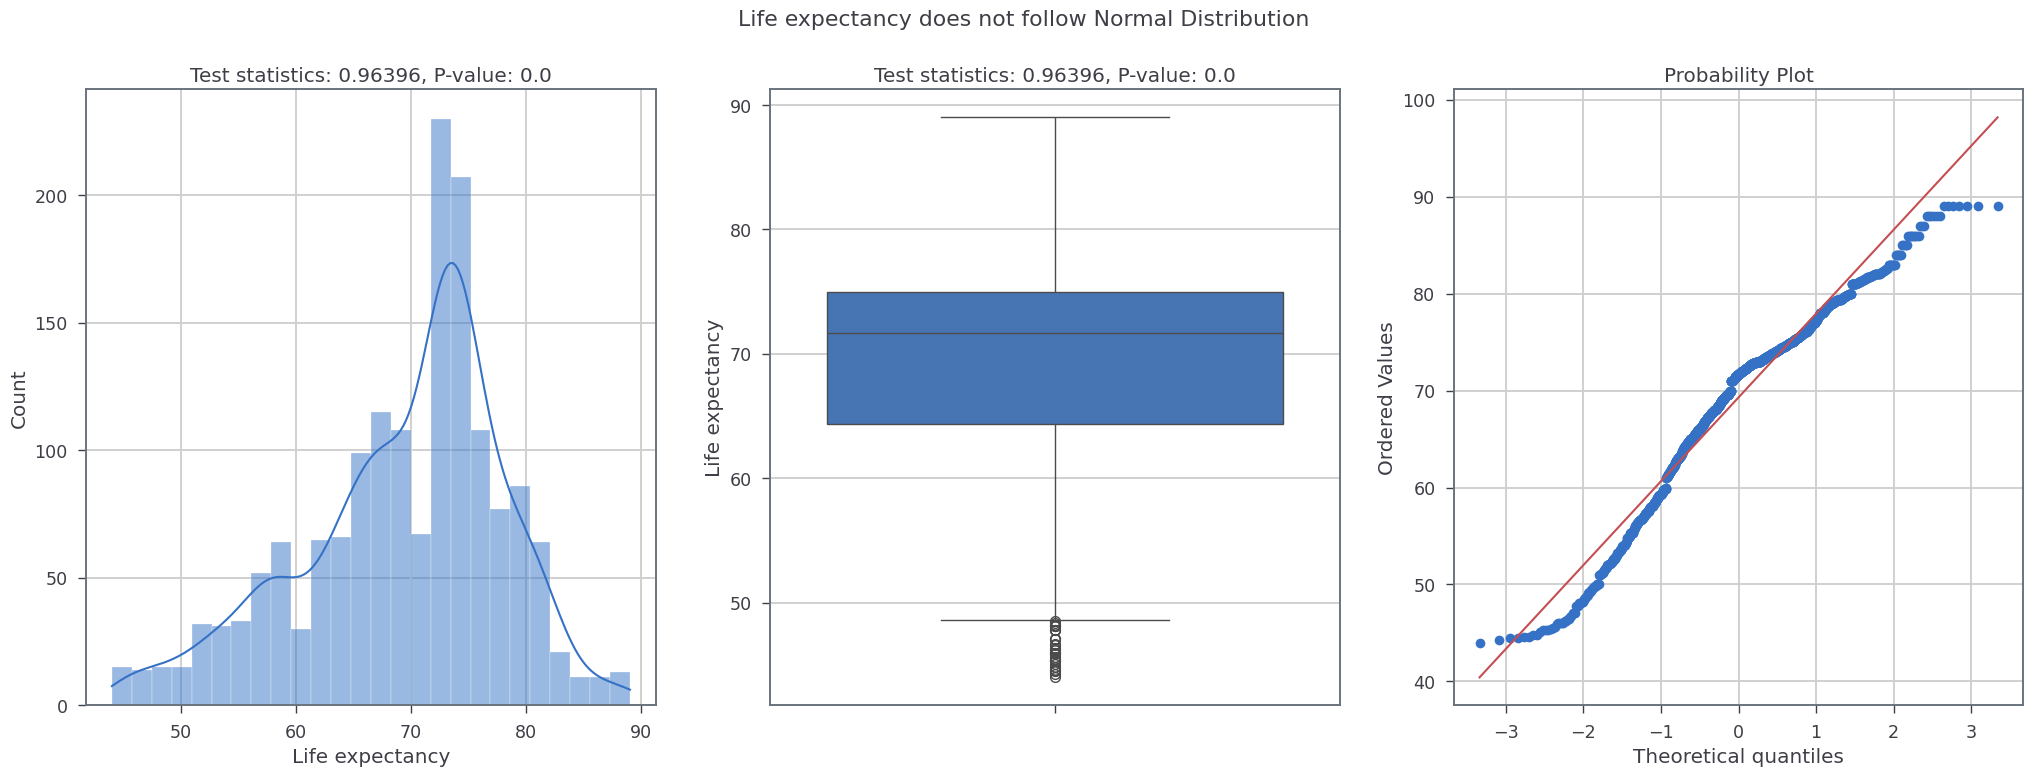

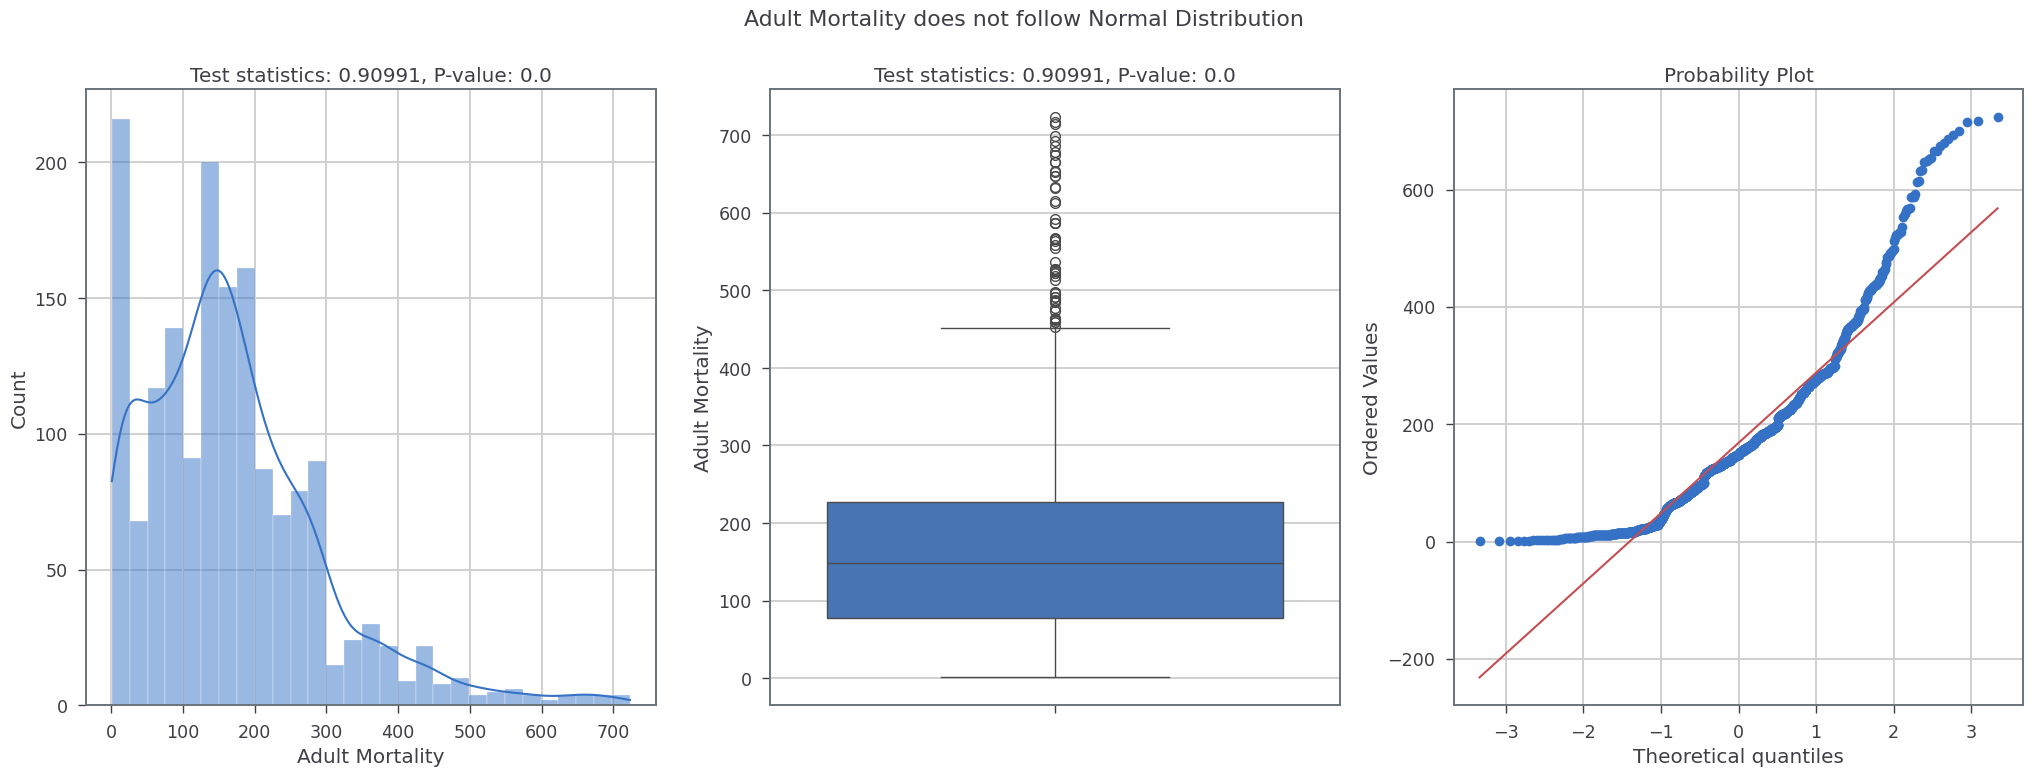

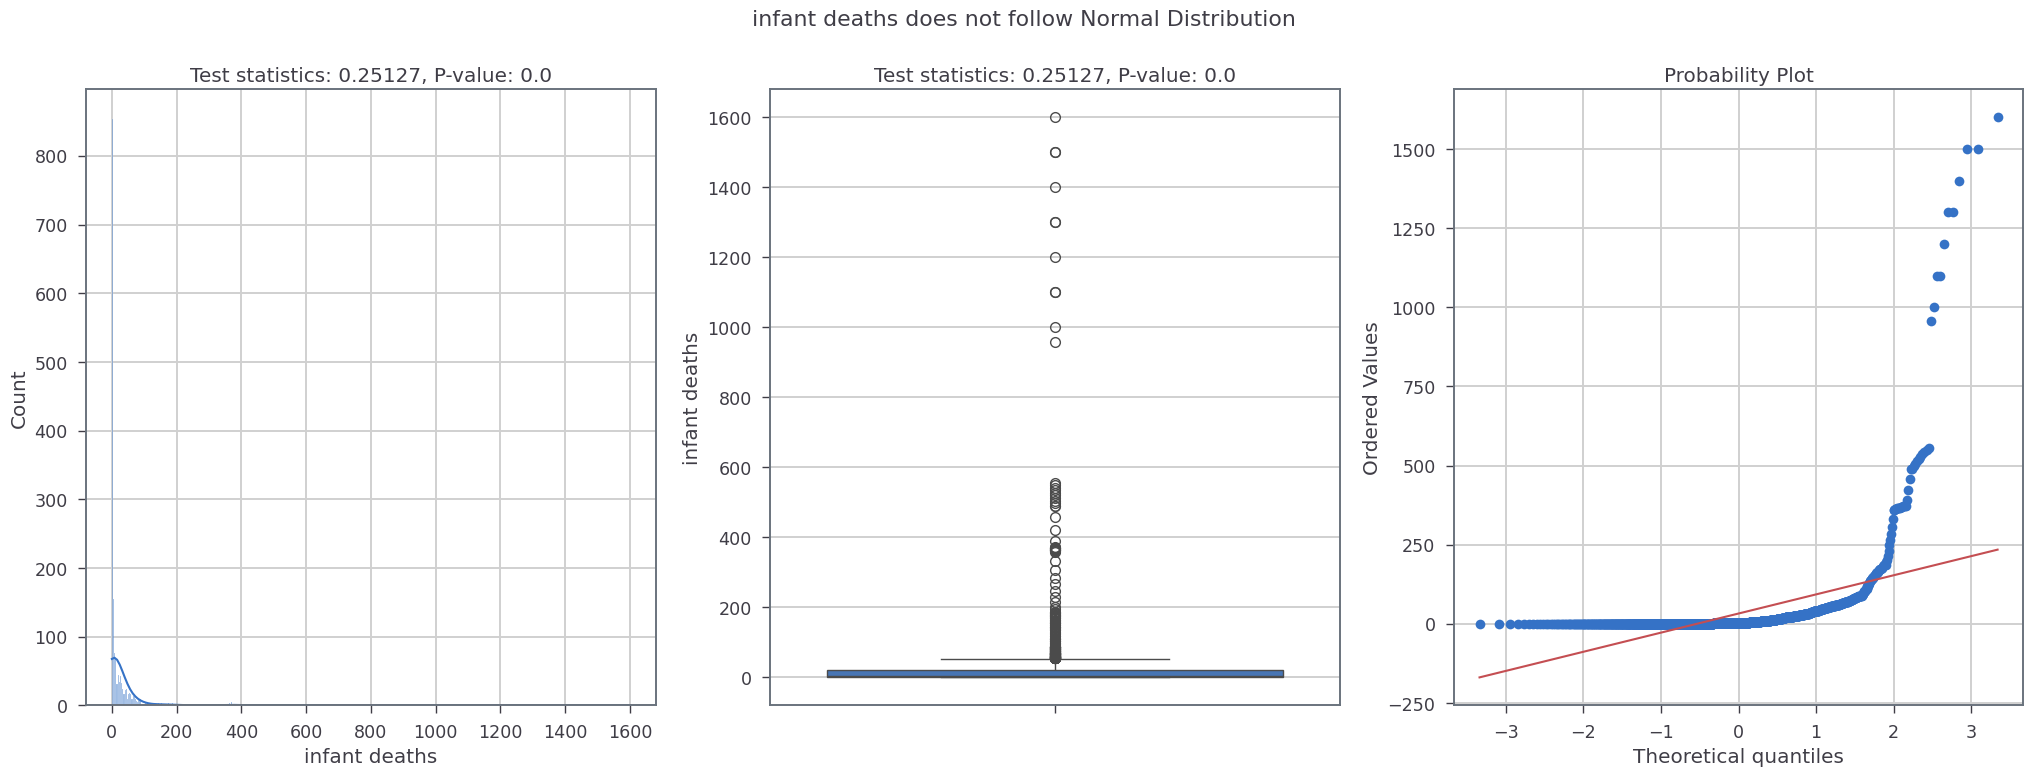

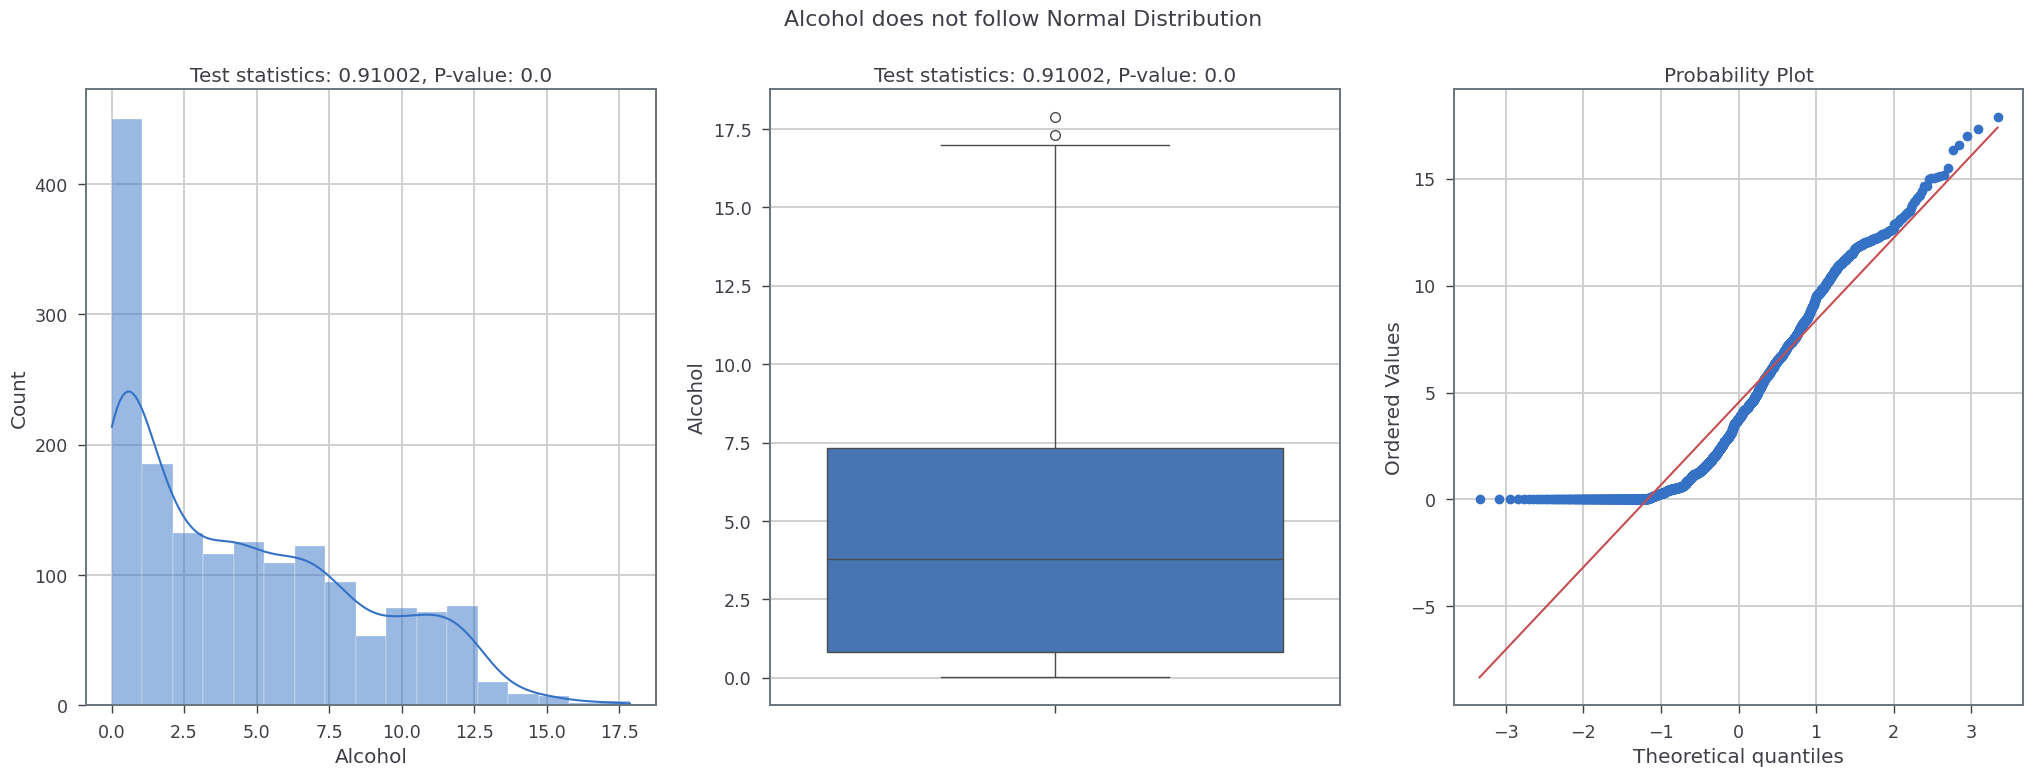

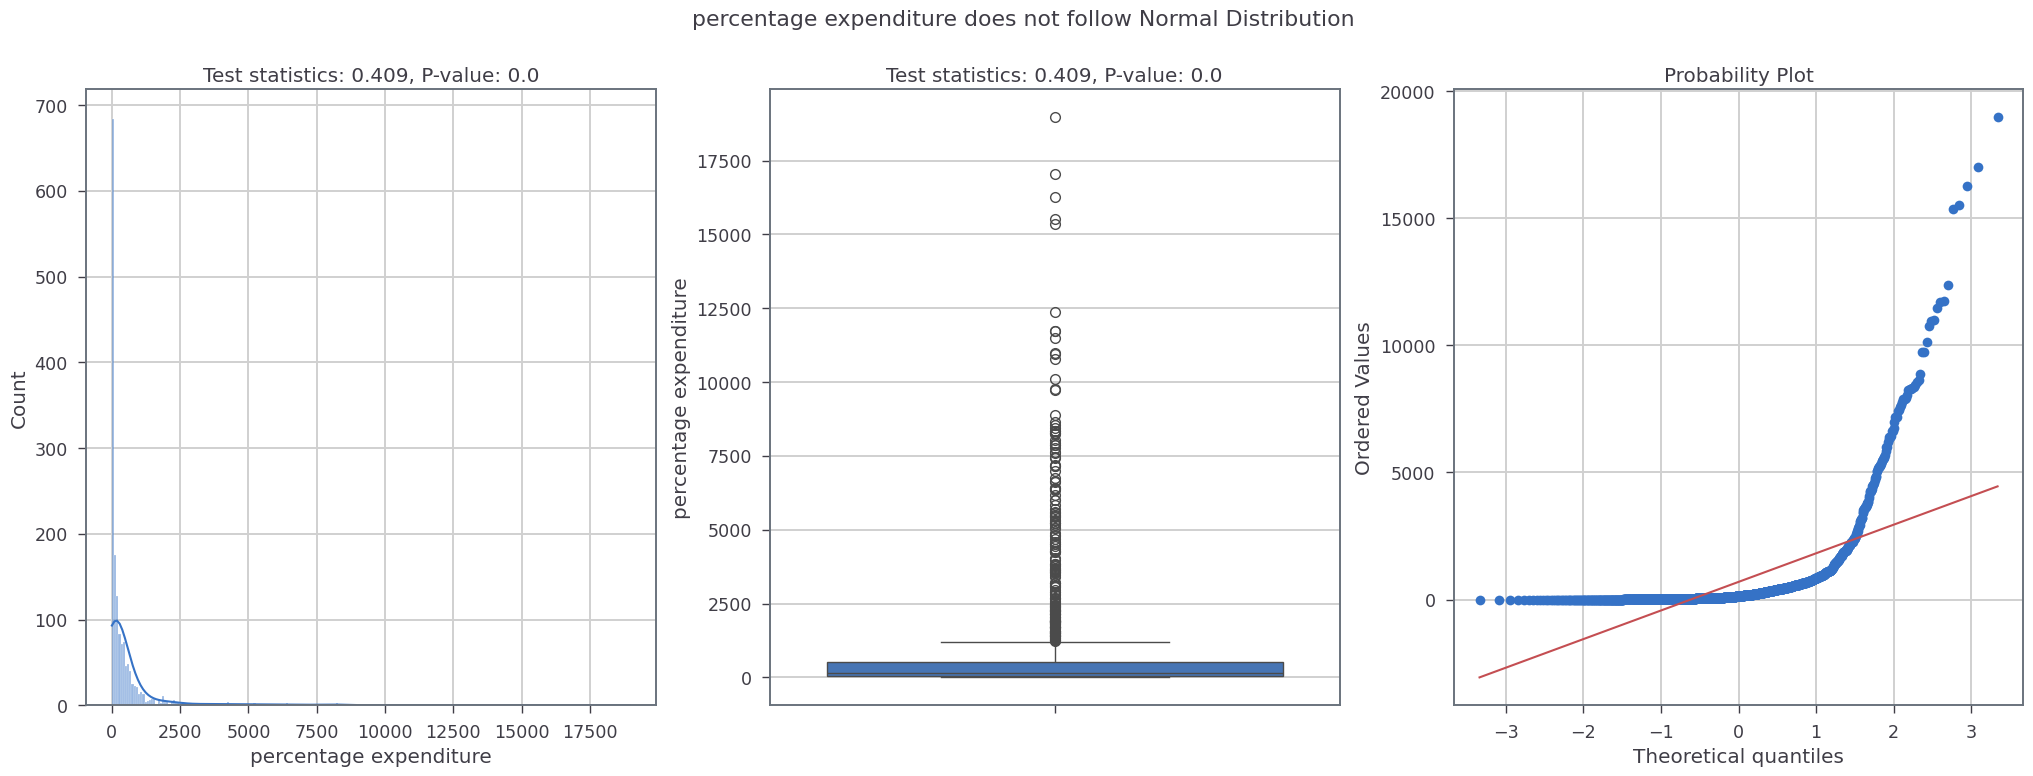

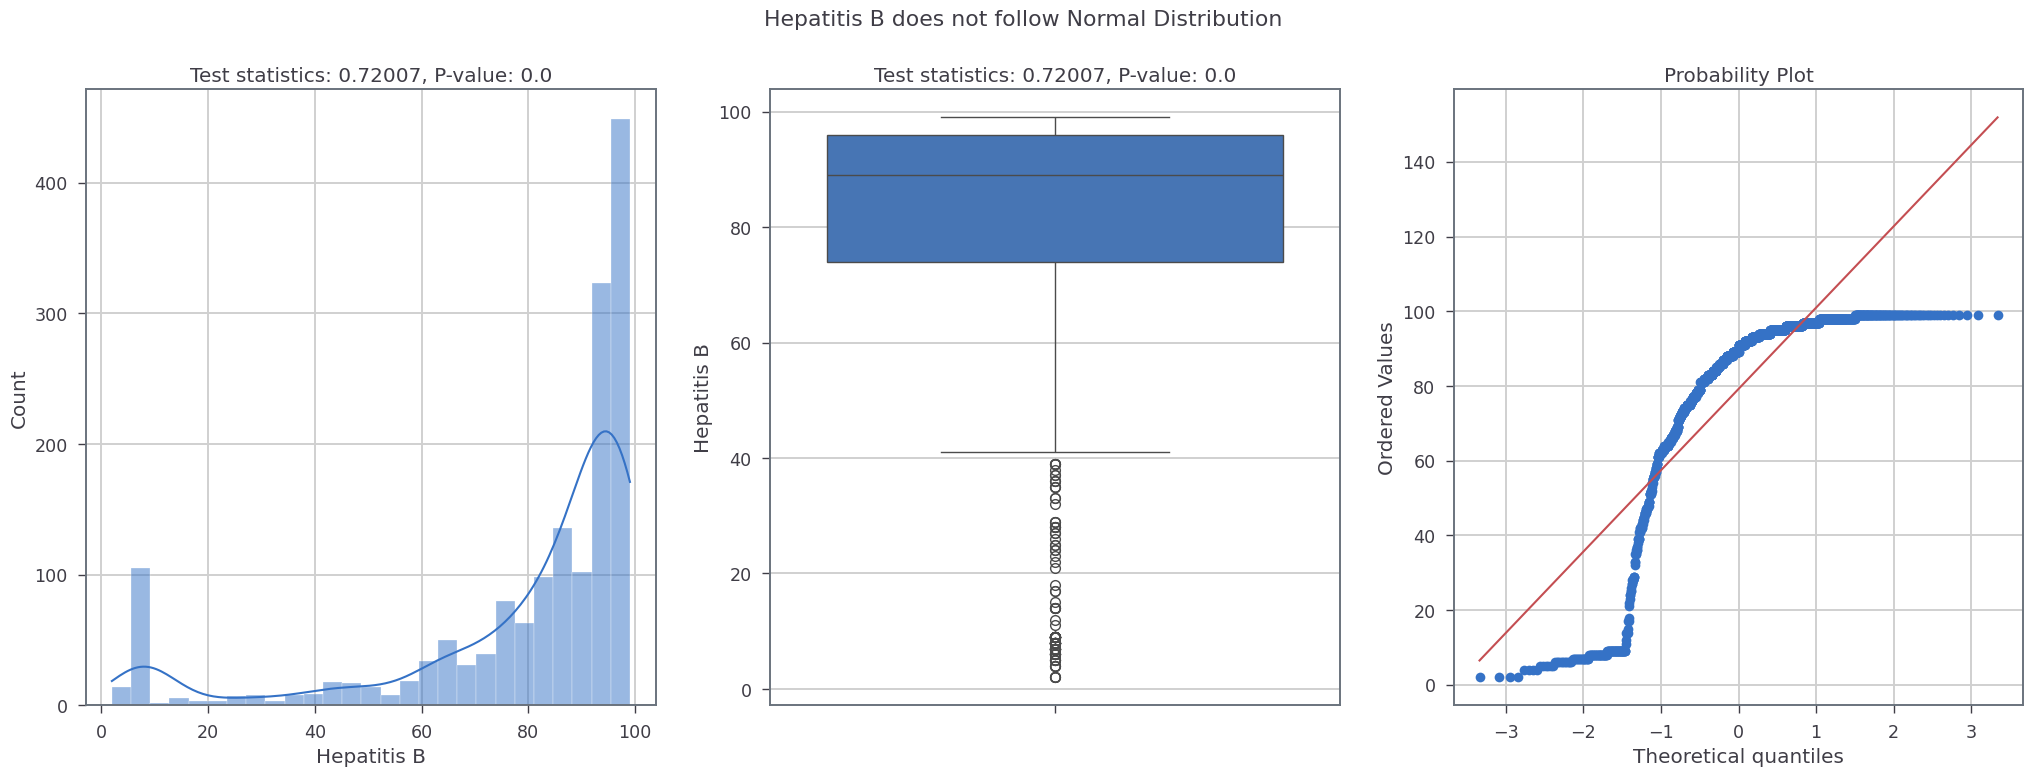

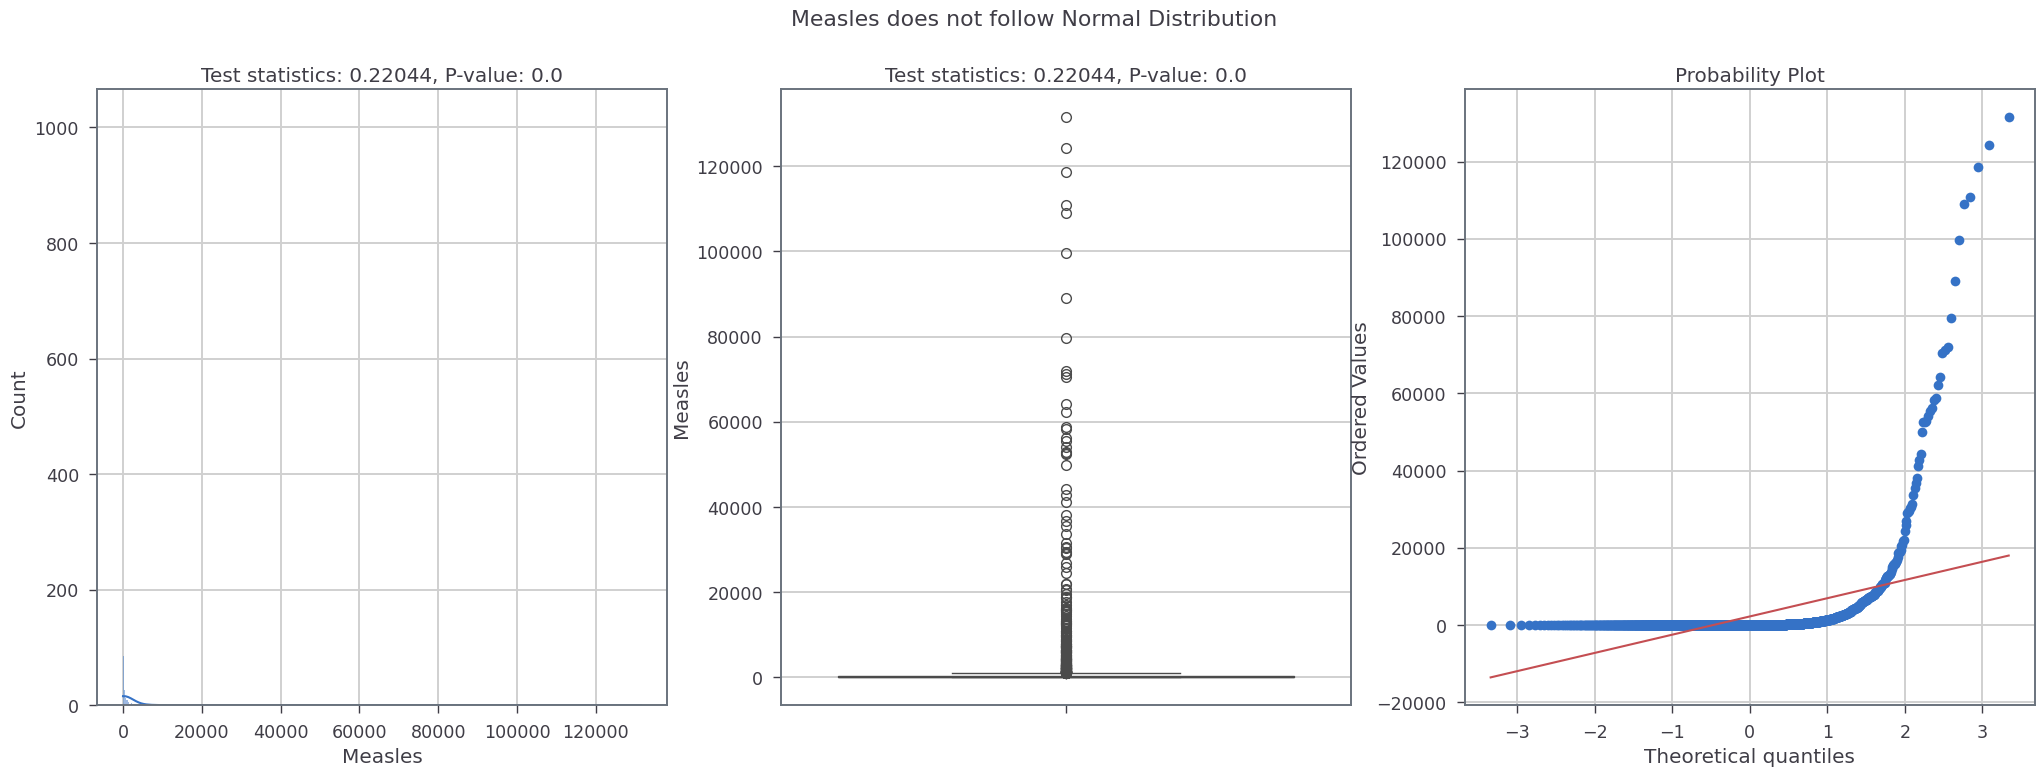

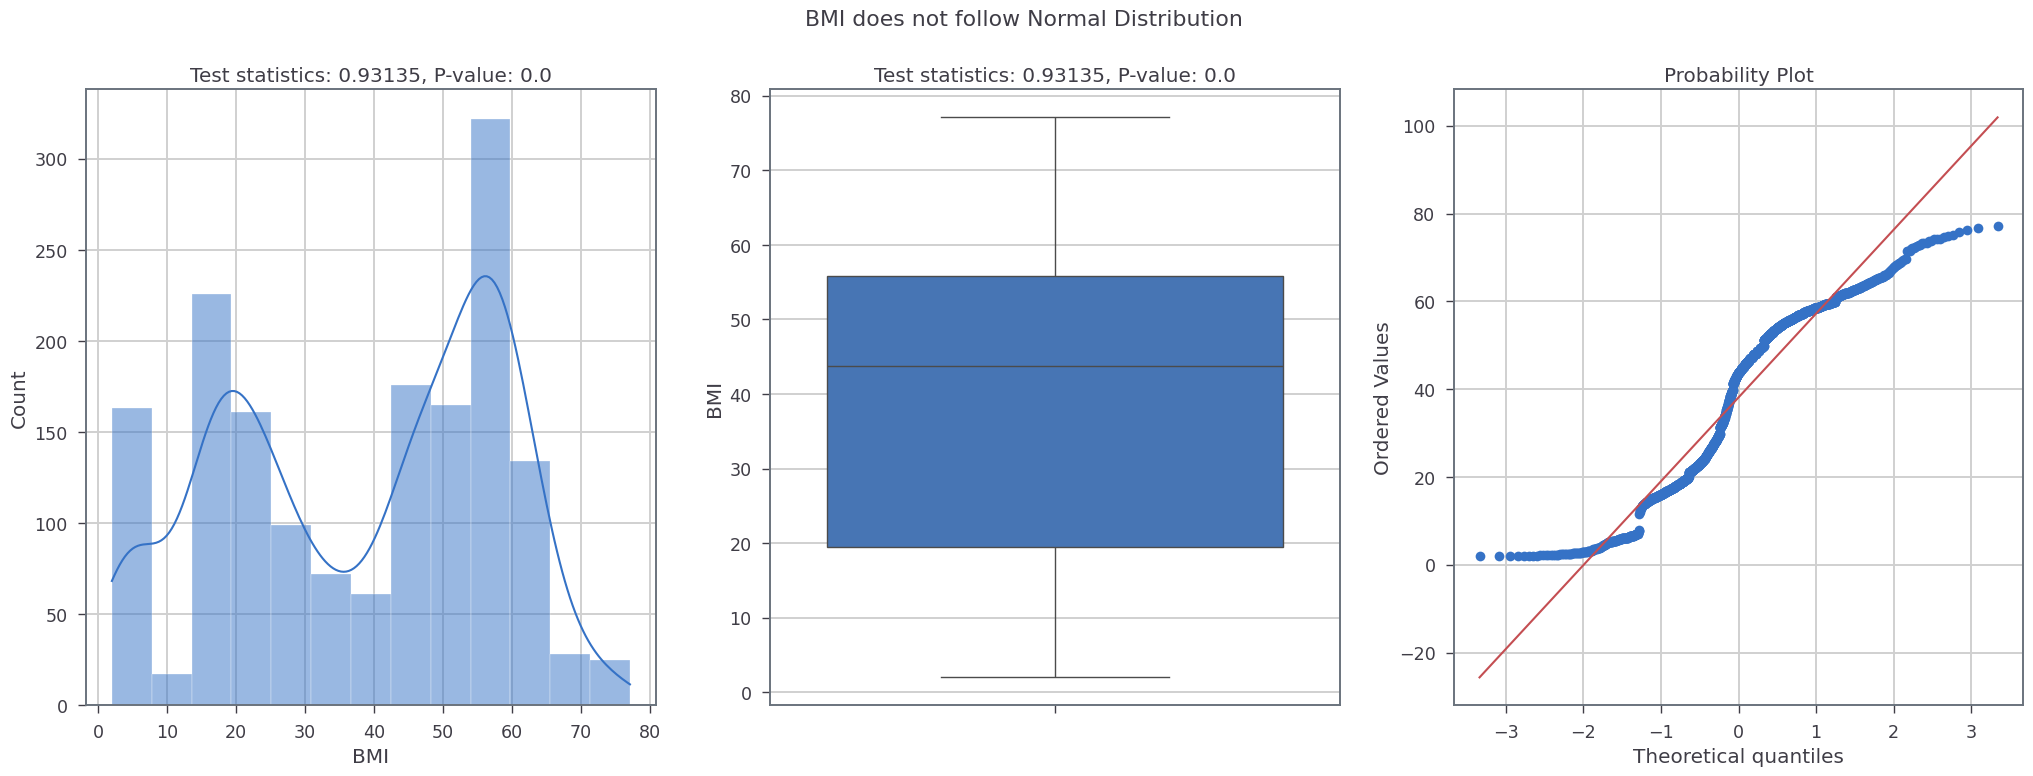

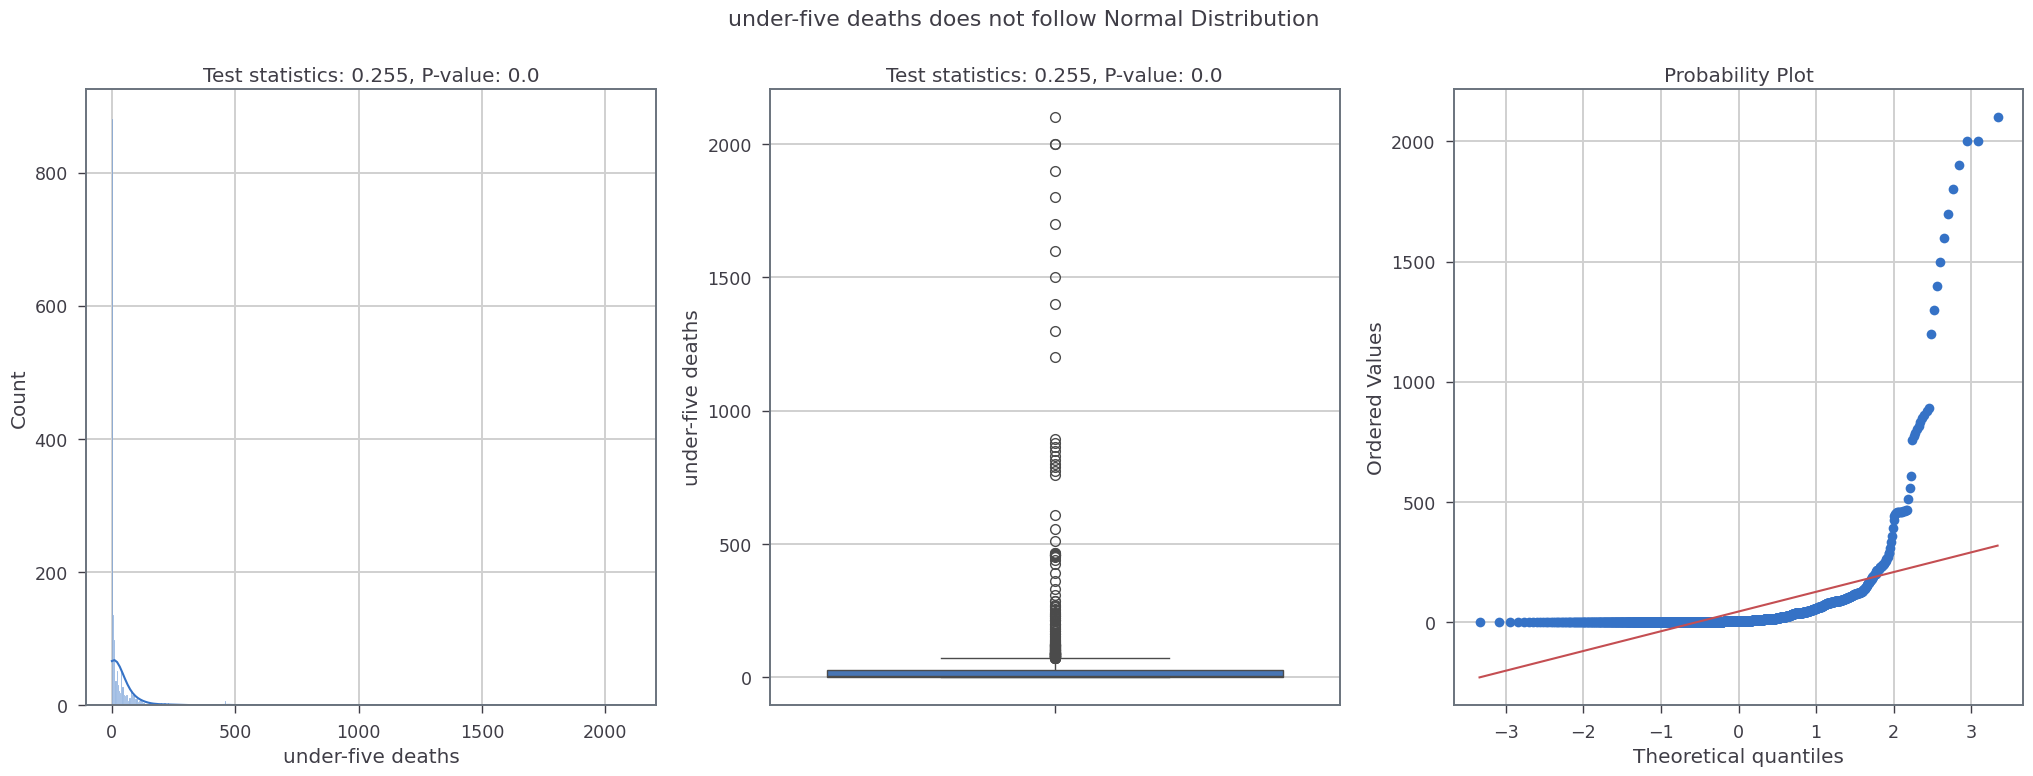

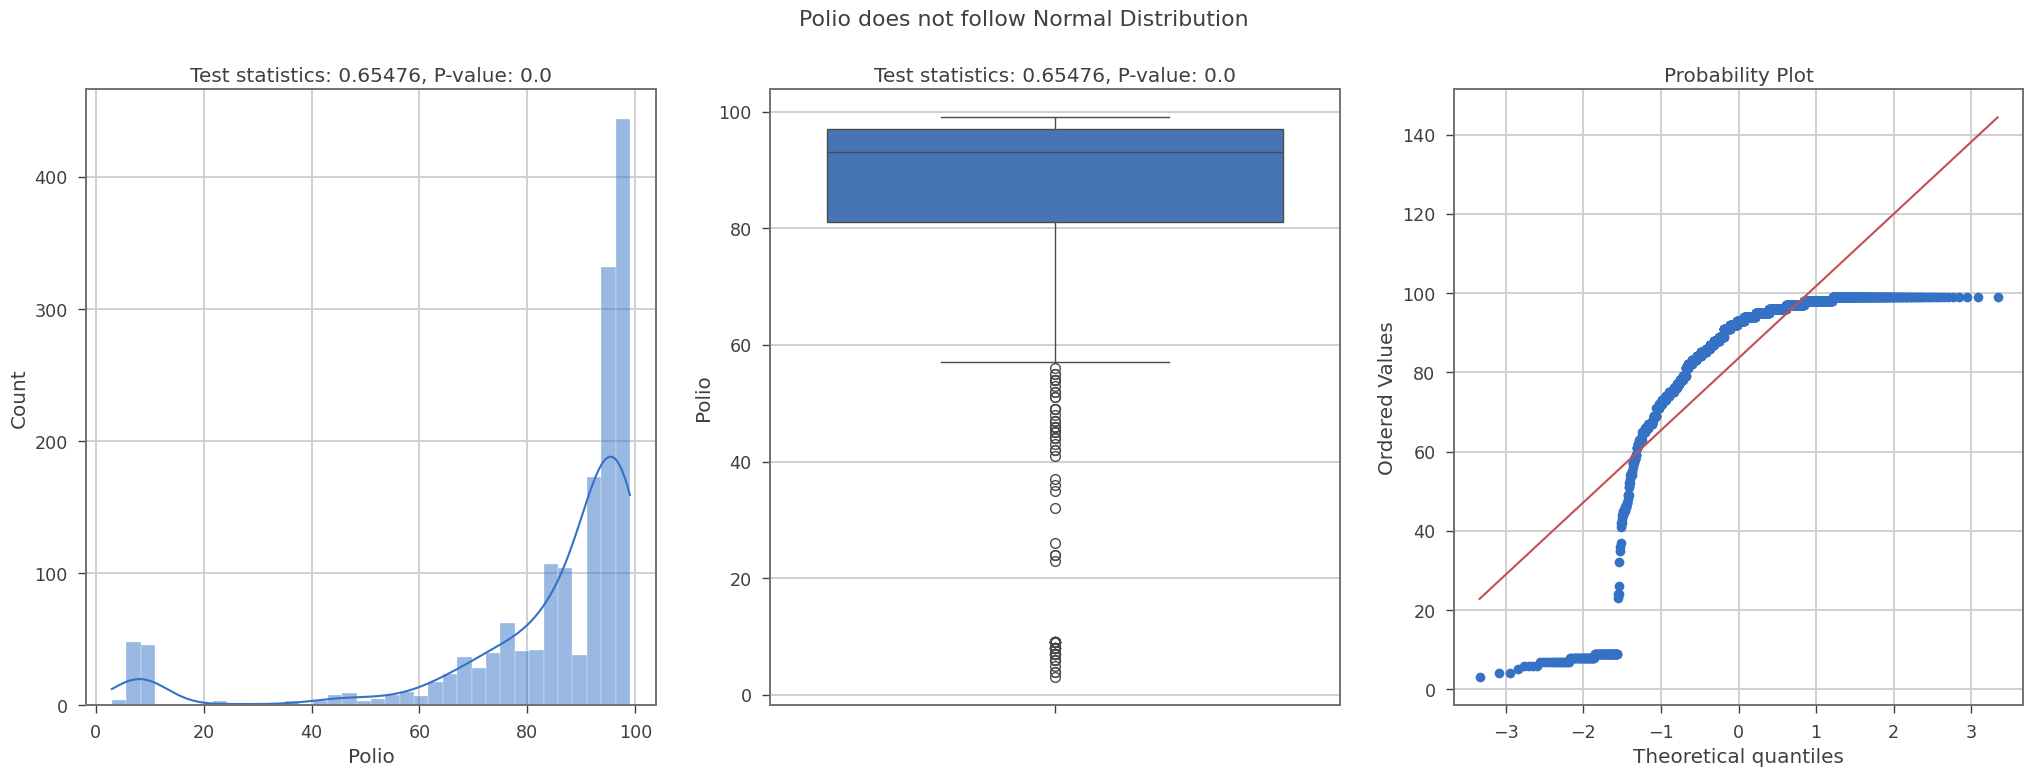

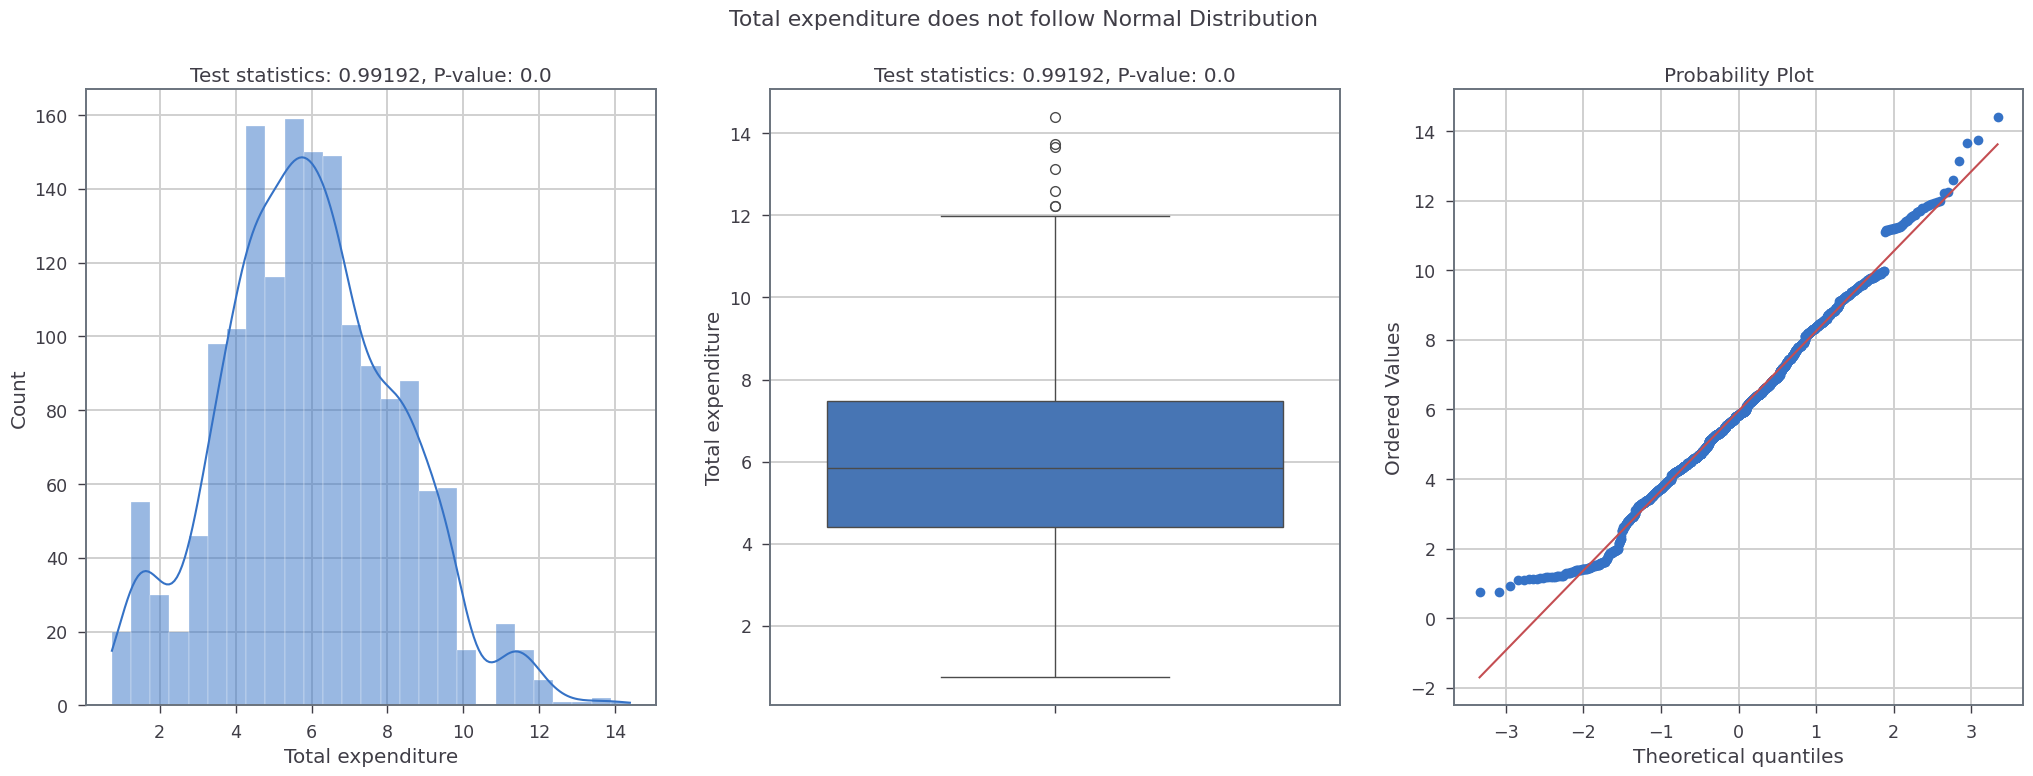

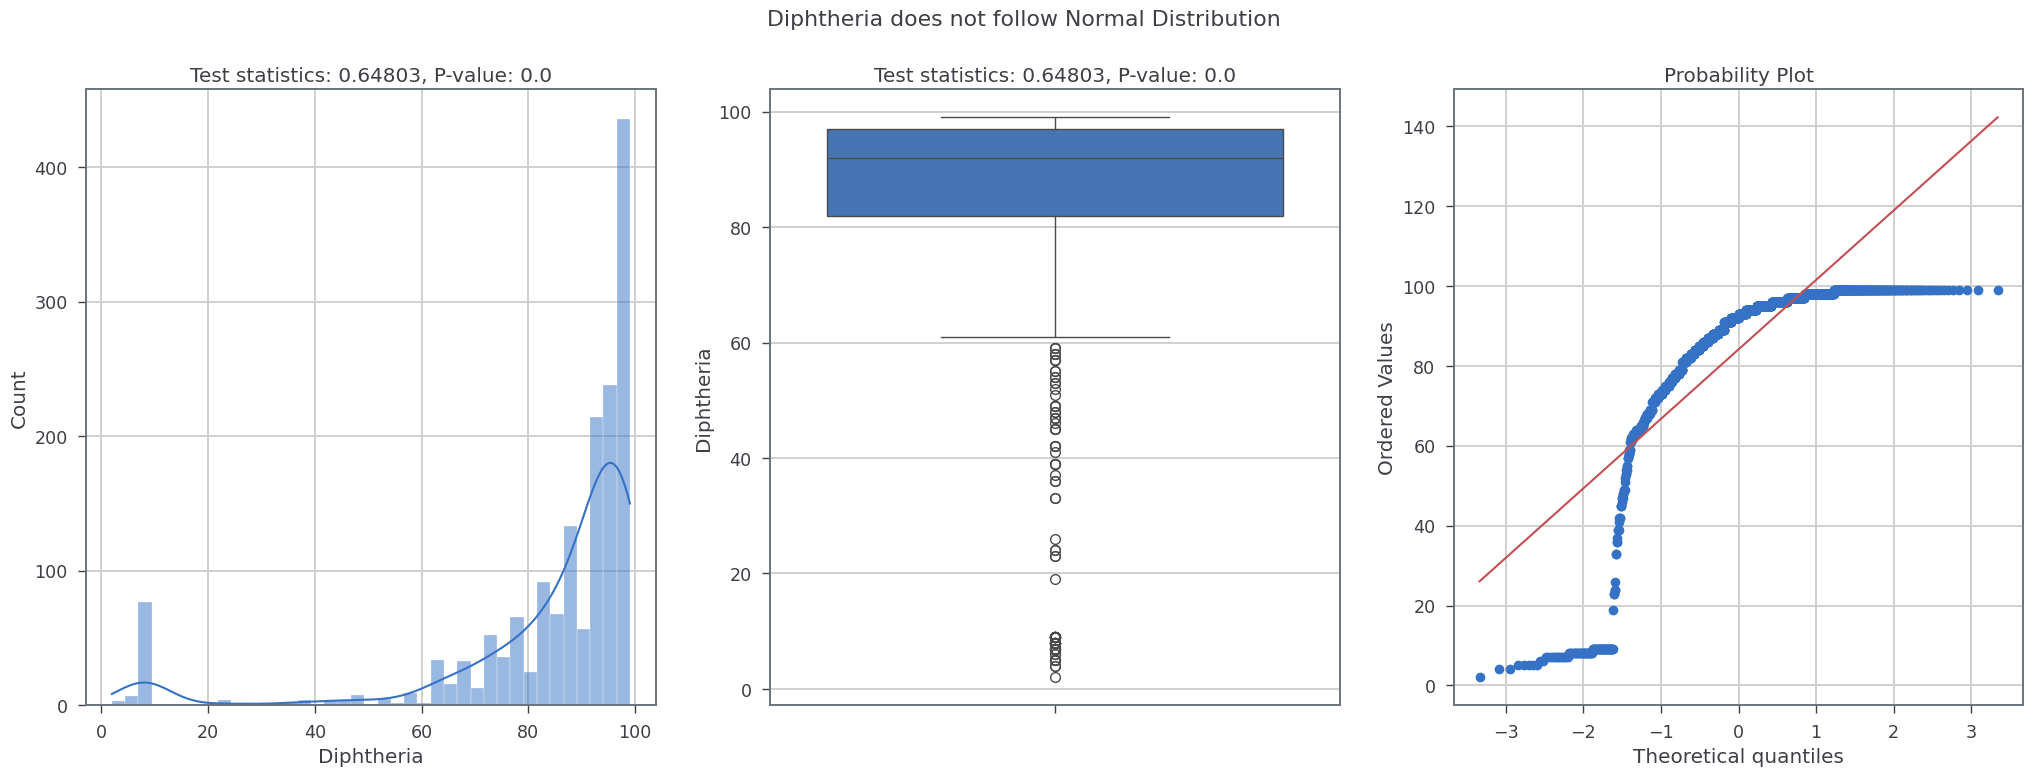

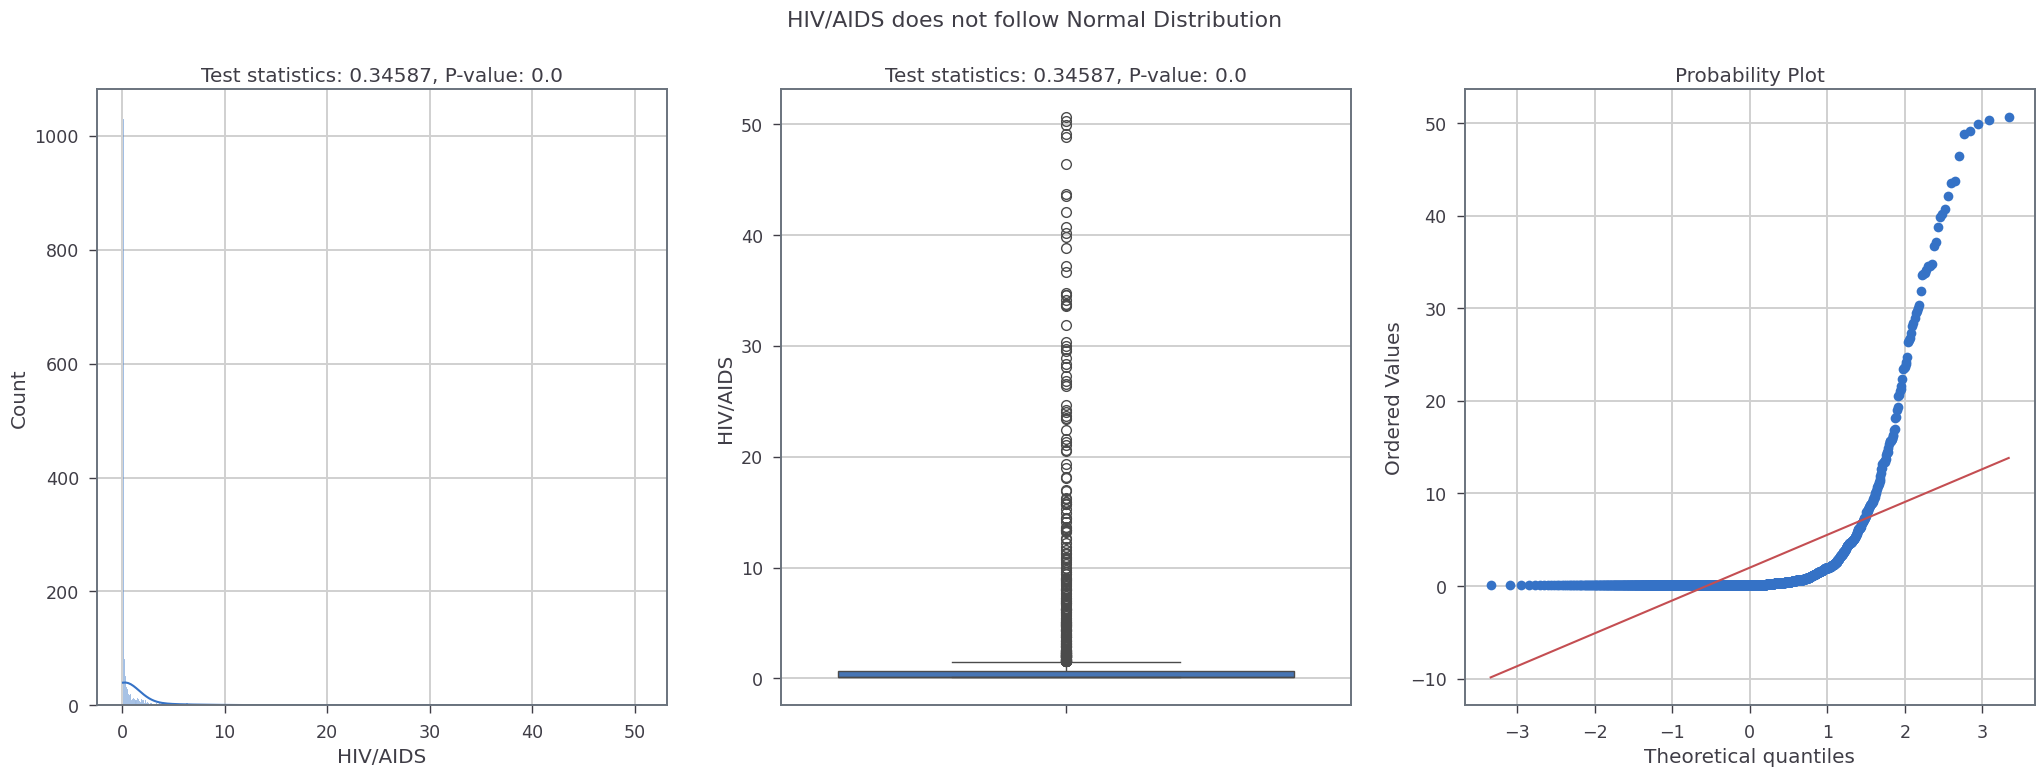

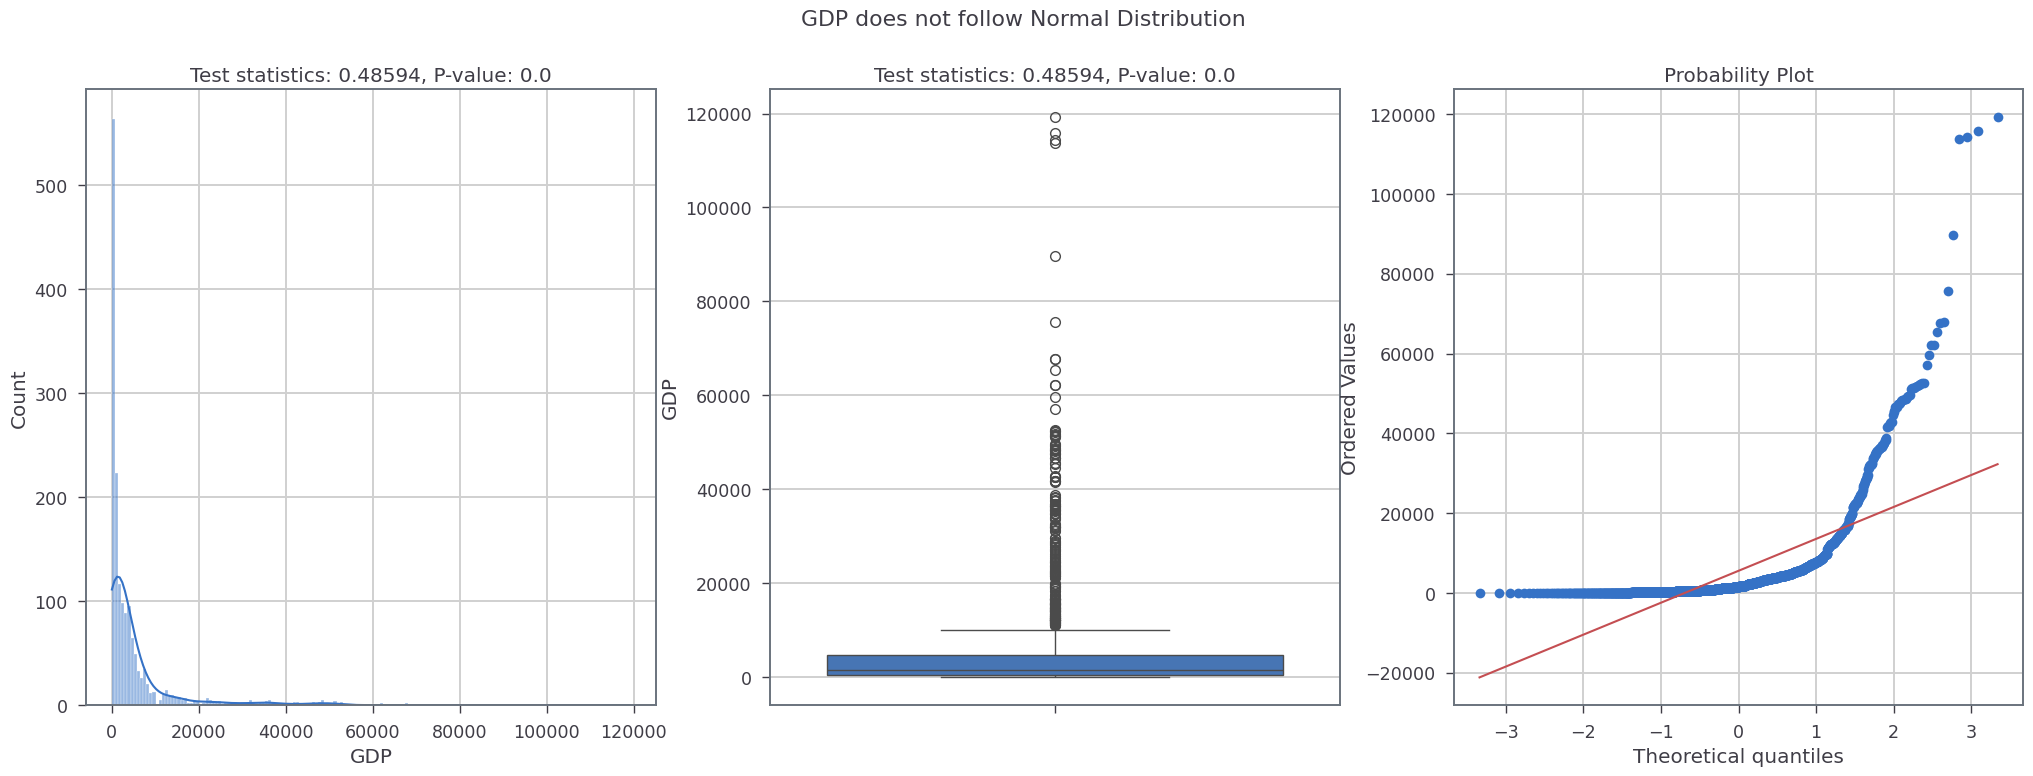

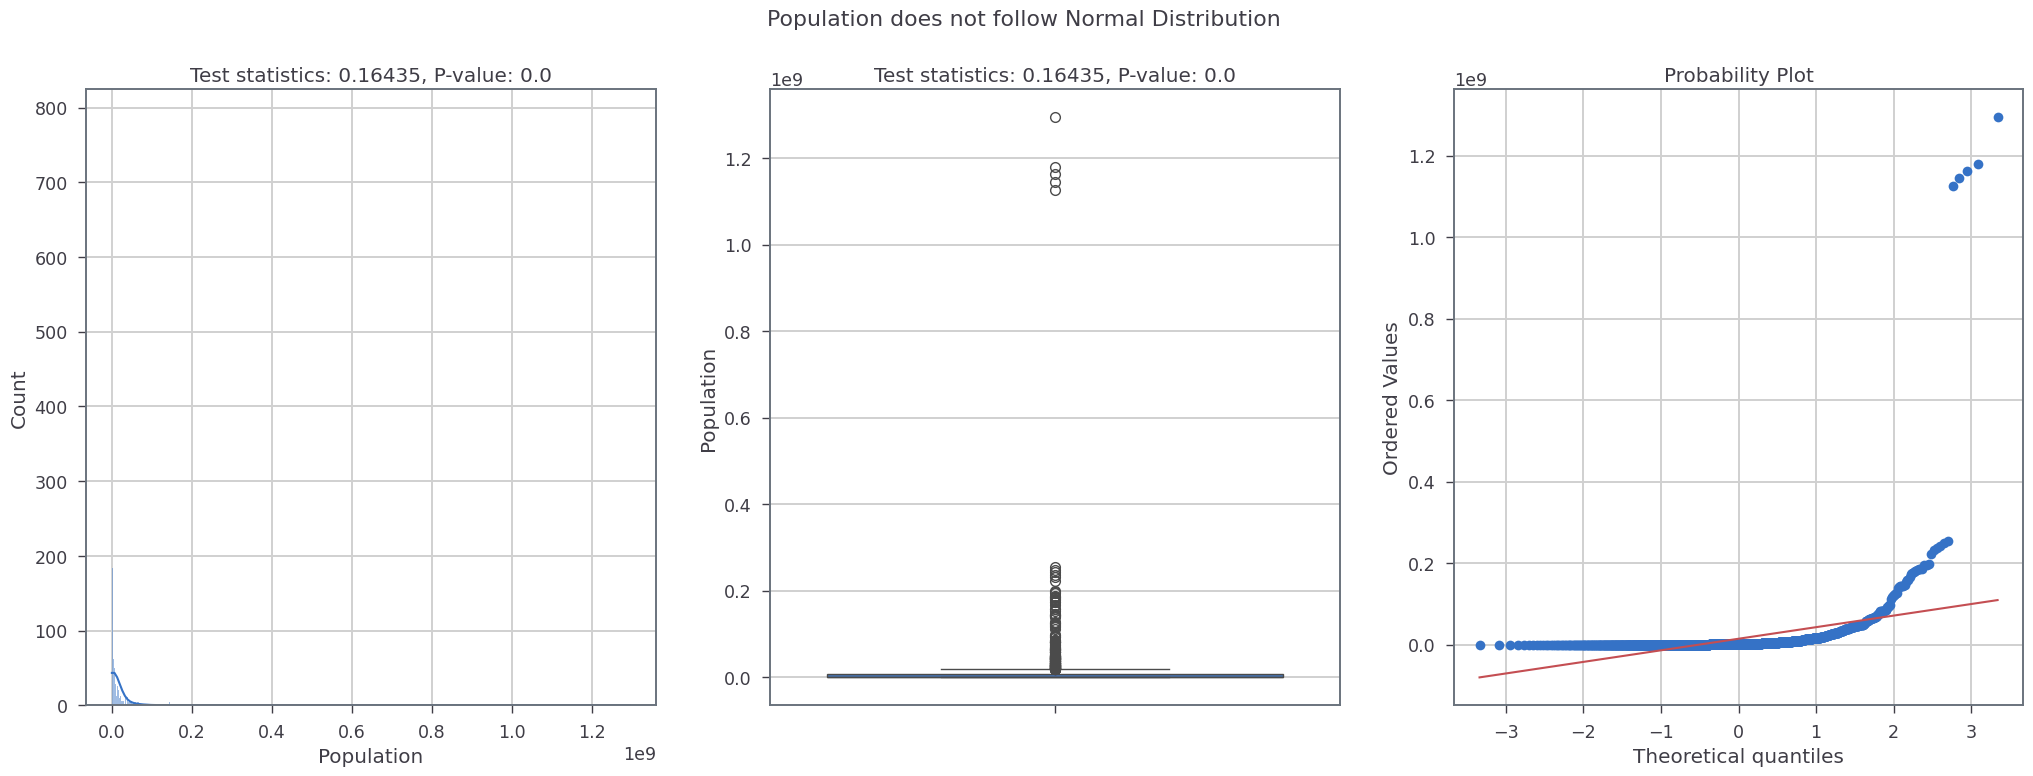

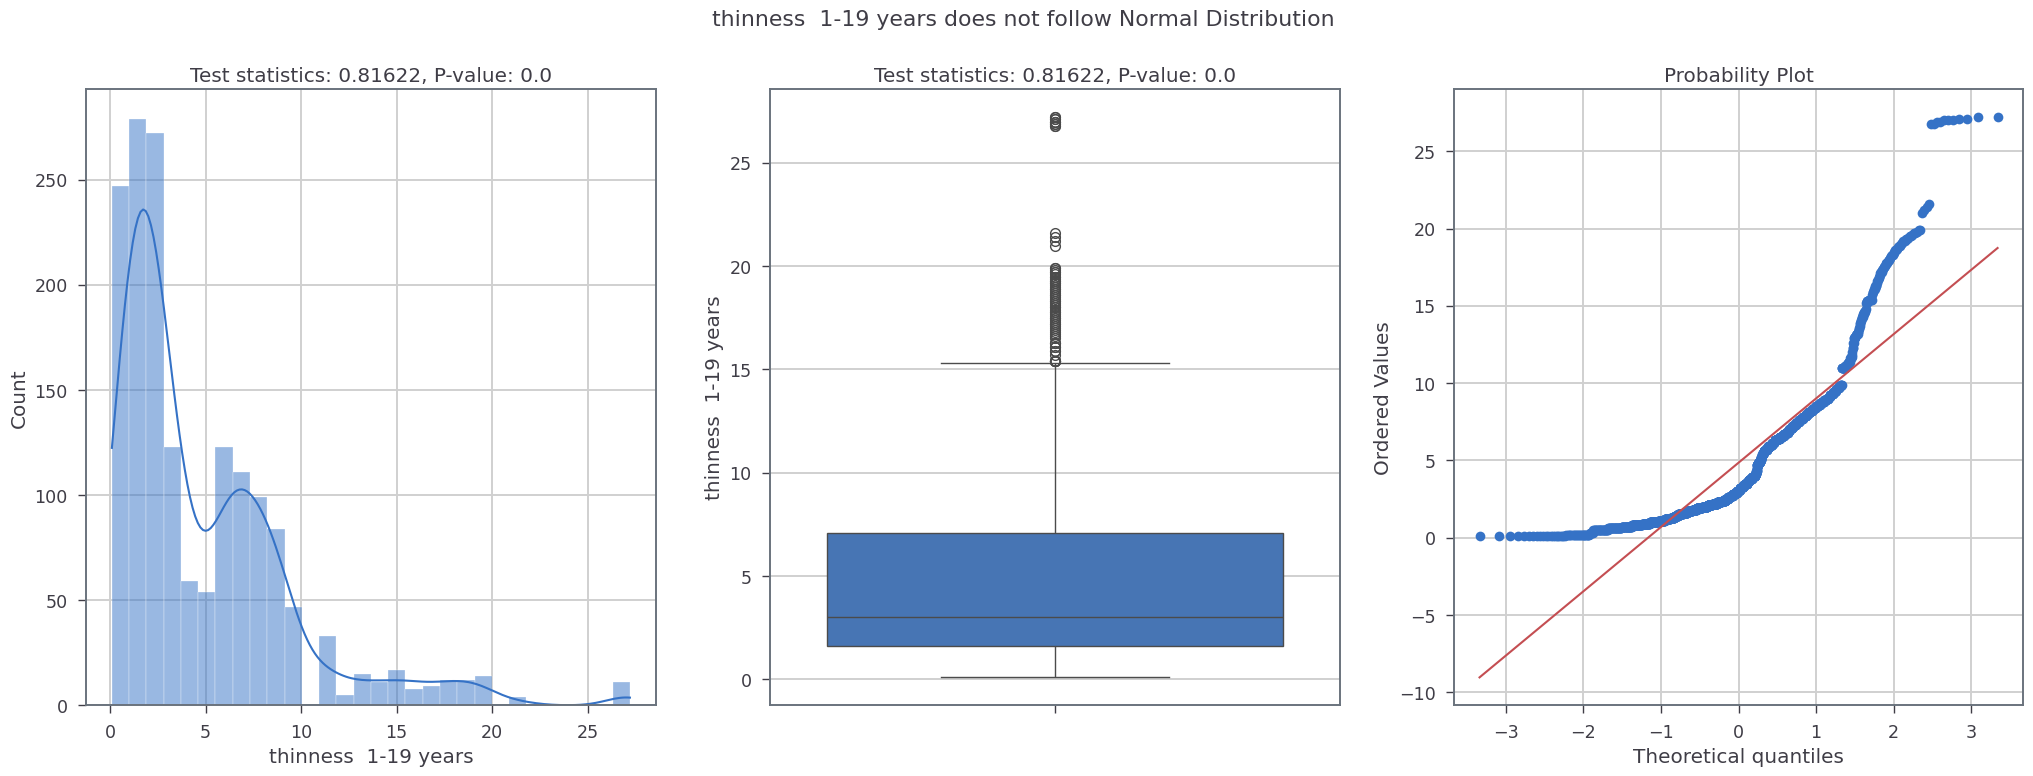

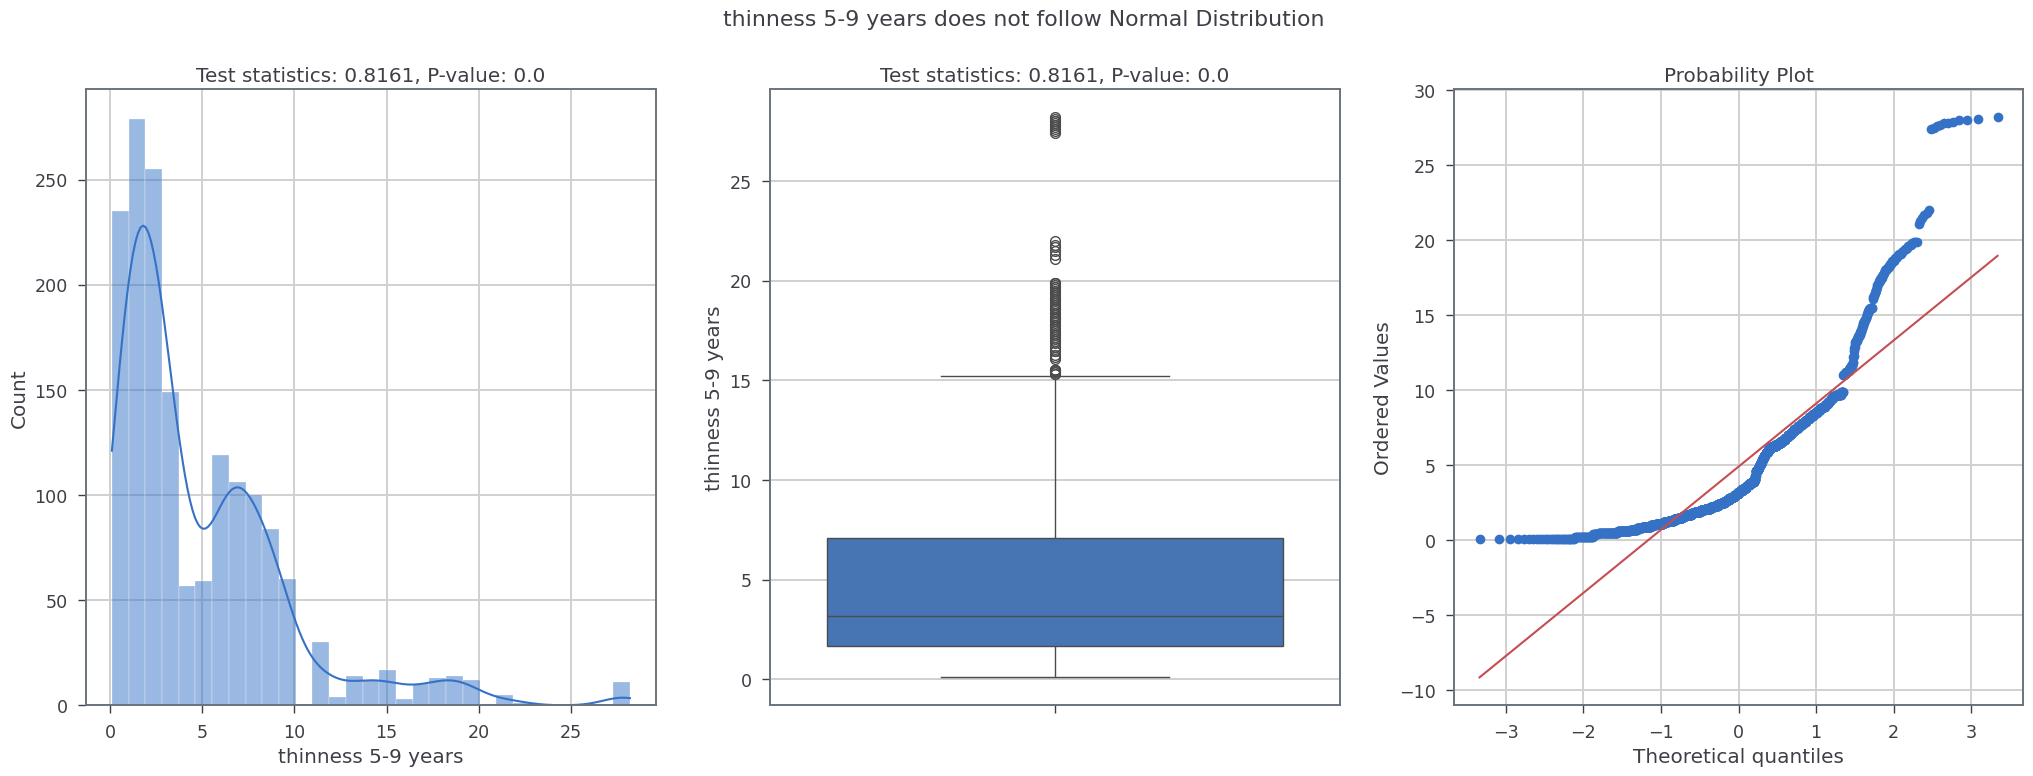

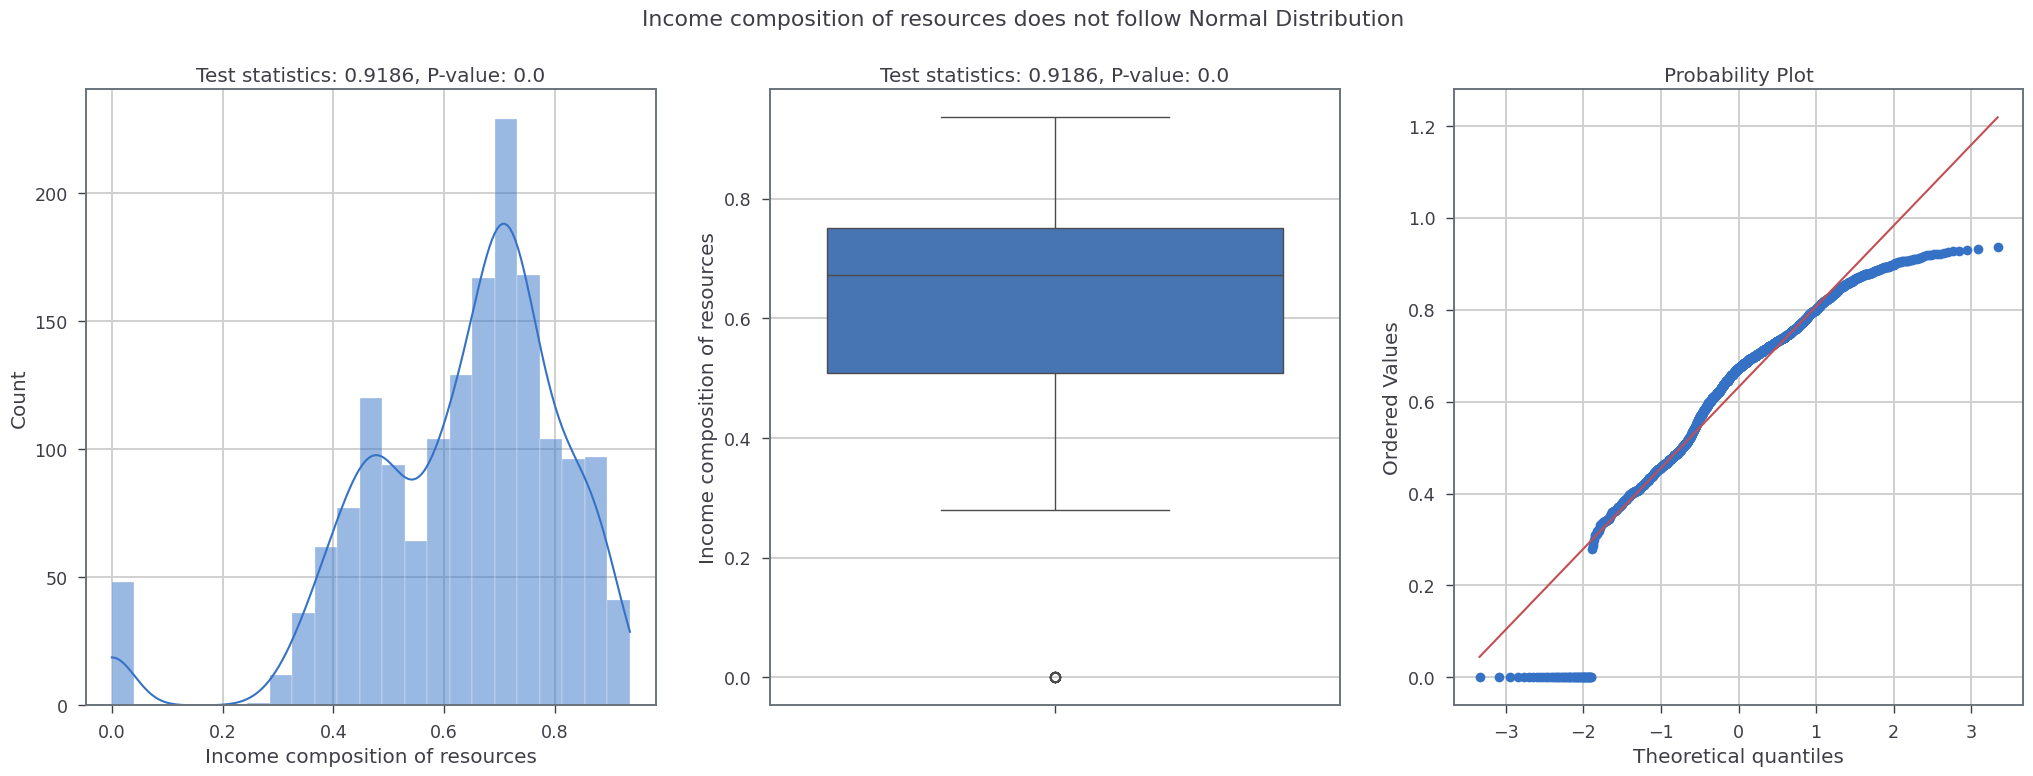

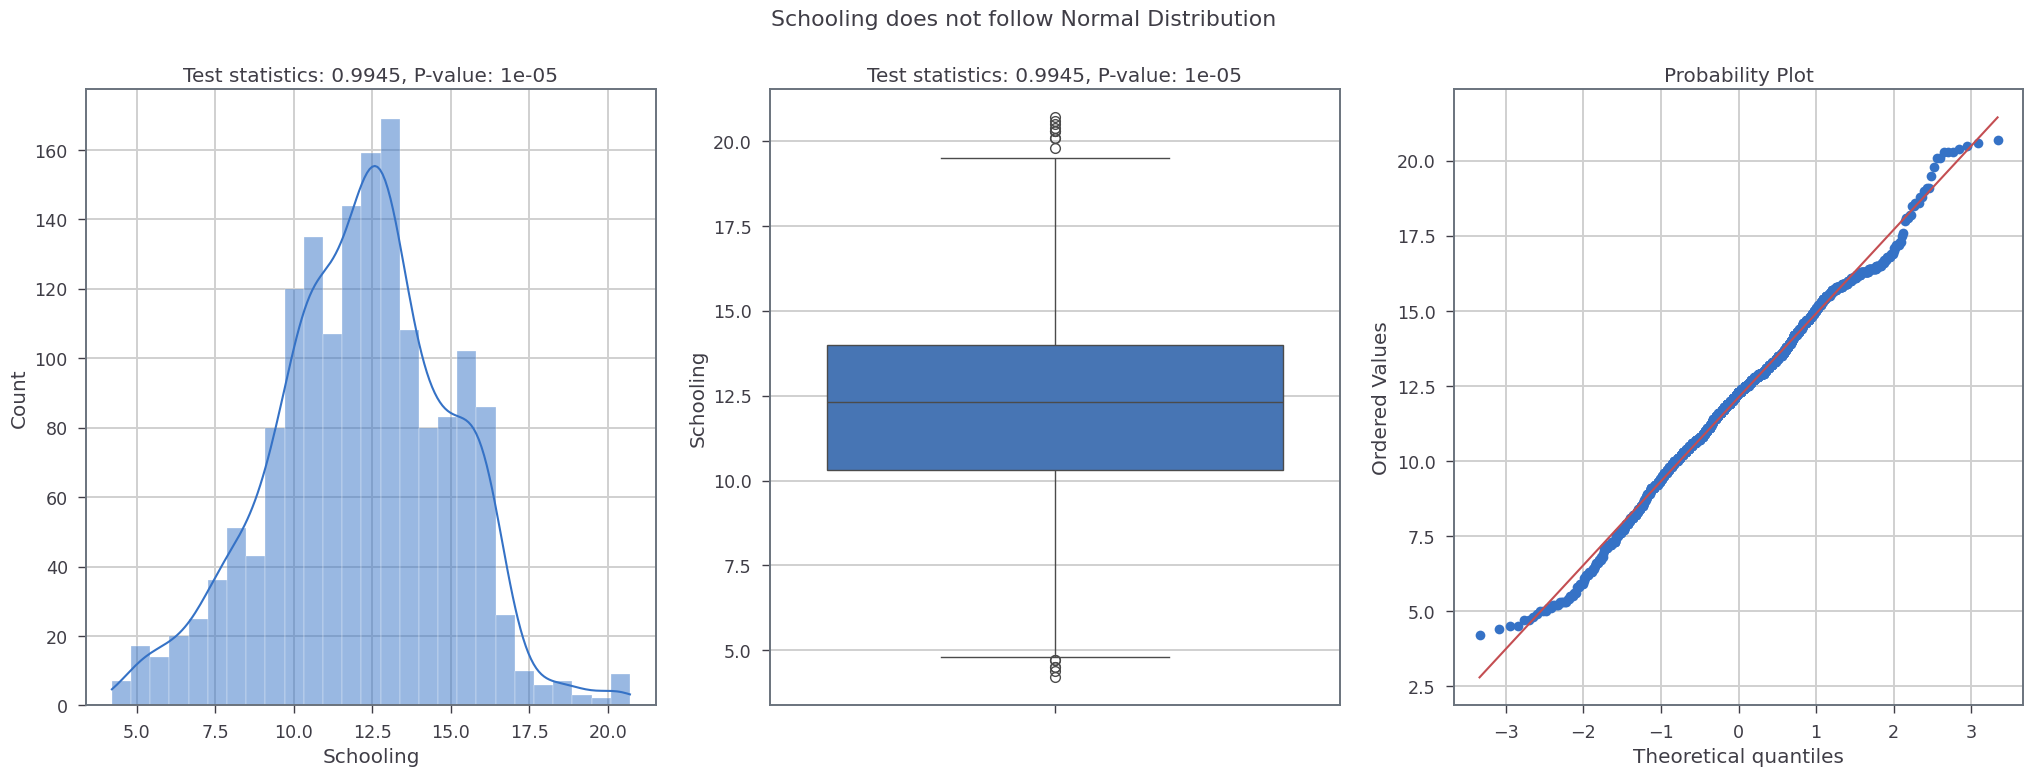

In [157]:
def plotNormalityTest(feature=None,new_data=None):
  fig,ax = plt.subplots(1,3,figsize=(25,8))
  new_data.dropna(inplace=True)
  statistics, p_value = shapiro(new_data[feature])
  ax[0].set_title(f'Test statistics: {np.round(statistics,5)}, P-value: {np.round(p_value,5)}')
  ax[1].set_title(f'Test statistics: {np.round(statistics,5)}, P-value: {np.round(p_value,5)}')
  if p_value <= 0.05:
      fig.suptitle(f'{feature} does not follow Normal Distribution')
  else:
      fig.suptitle(f'{feature} follows Normal Distribution')

  sns.histplot(new_data[feature], ax=ax[0], kde=True)
  sns.boxplot(new_data[feature], ax=ax[1])
  stats.probplot(new_data[feature], plot=ax[2])
  plt.show()
  print('\n\n')

for feature in numericalFeatures:
  plotNormalityTest(feature,data)

### D'Agostino's K^2 Test

- H0 (null hypothesis) :- The feature follows Normal Distribution
- H1 (alternative hypothesis) :- The feature not follows Normal Distribution

If P-value less than the 0.05 we have enough evidance to reject the null hypothesis and go with alternative hypothesis

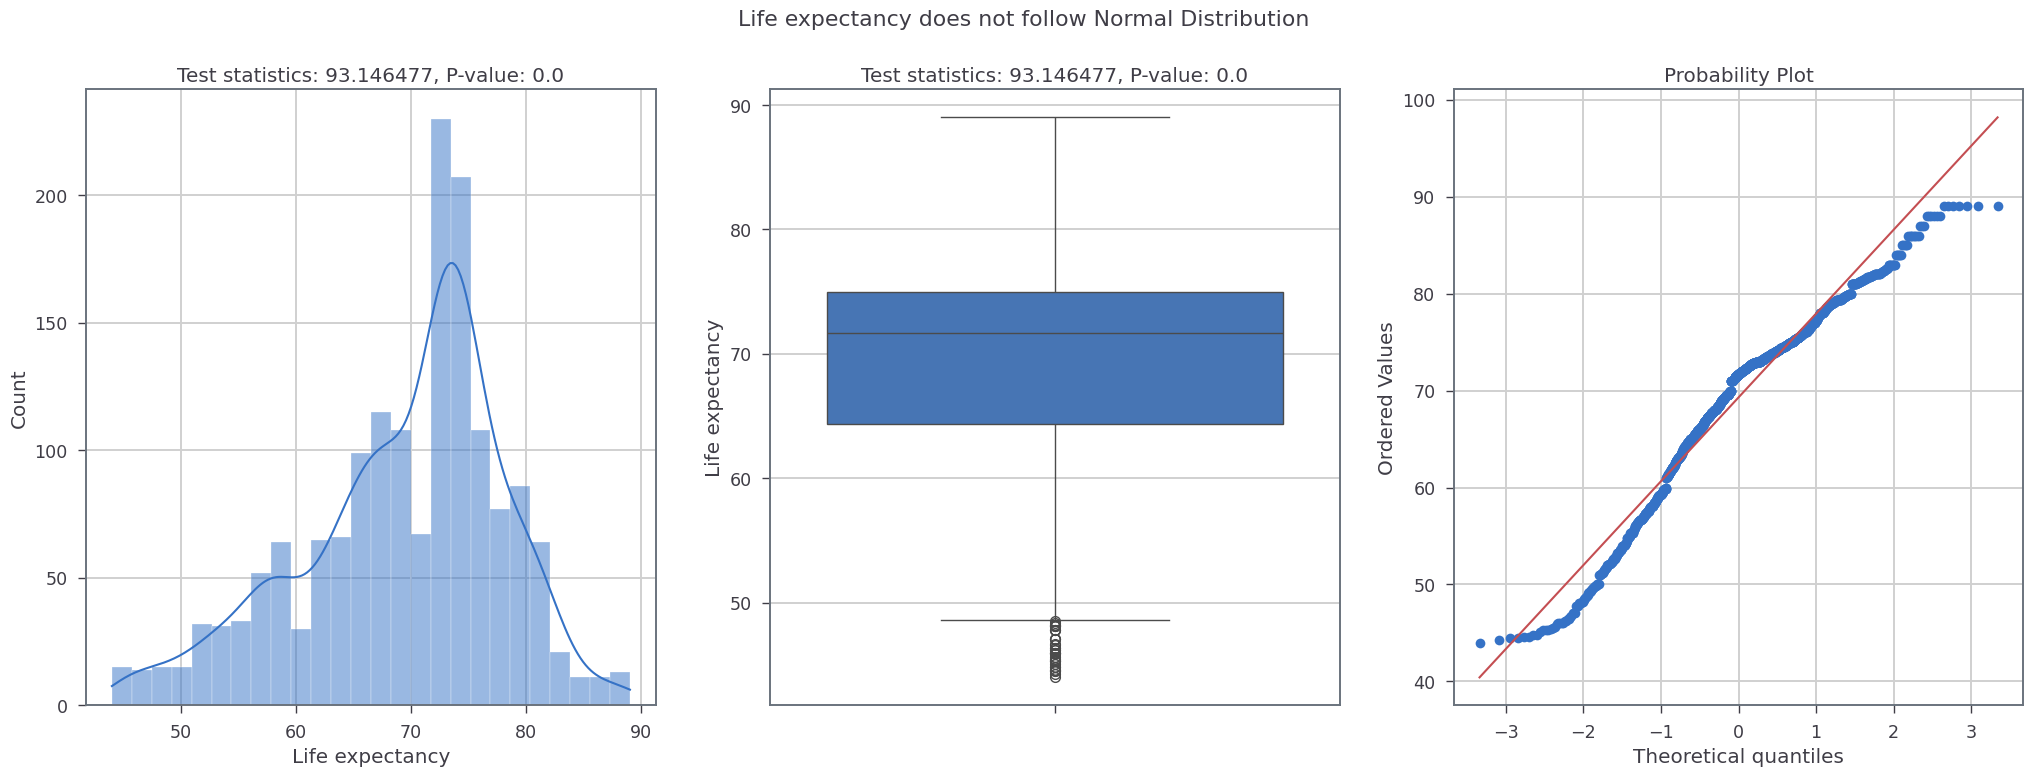

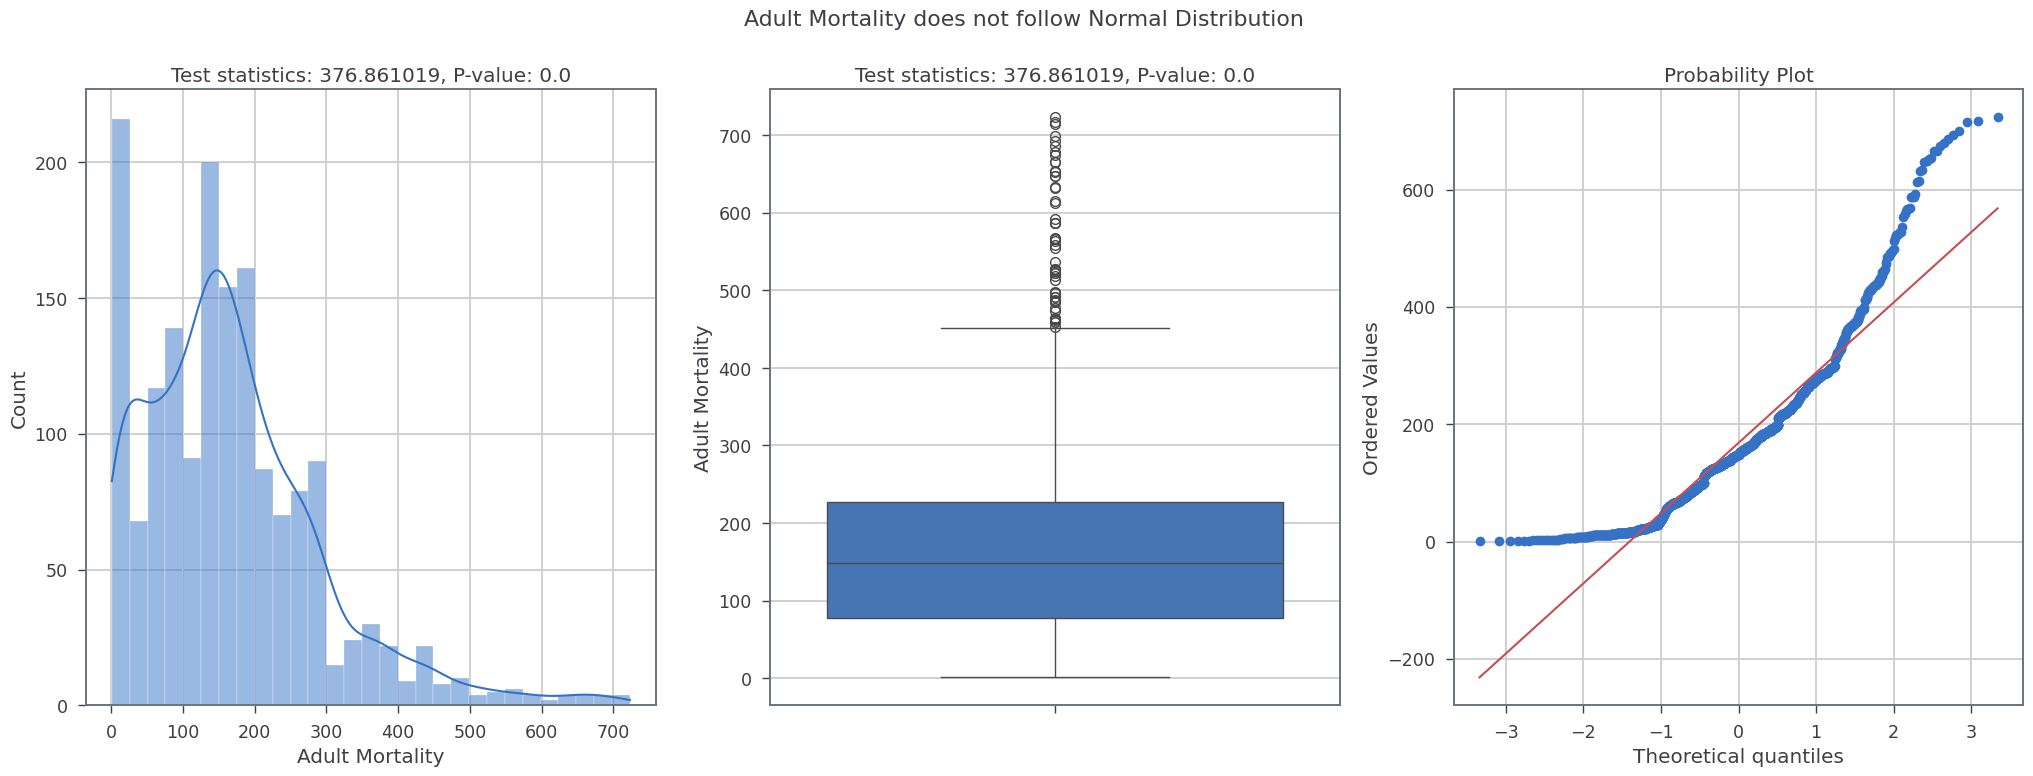

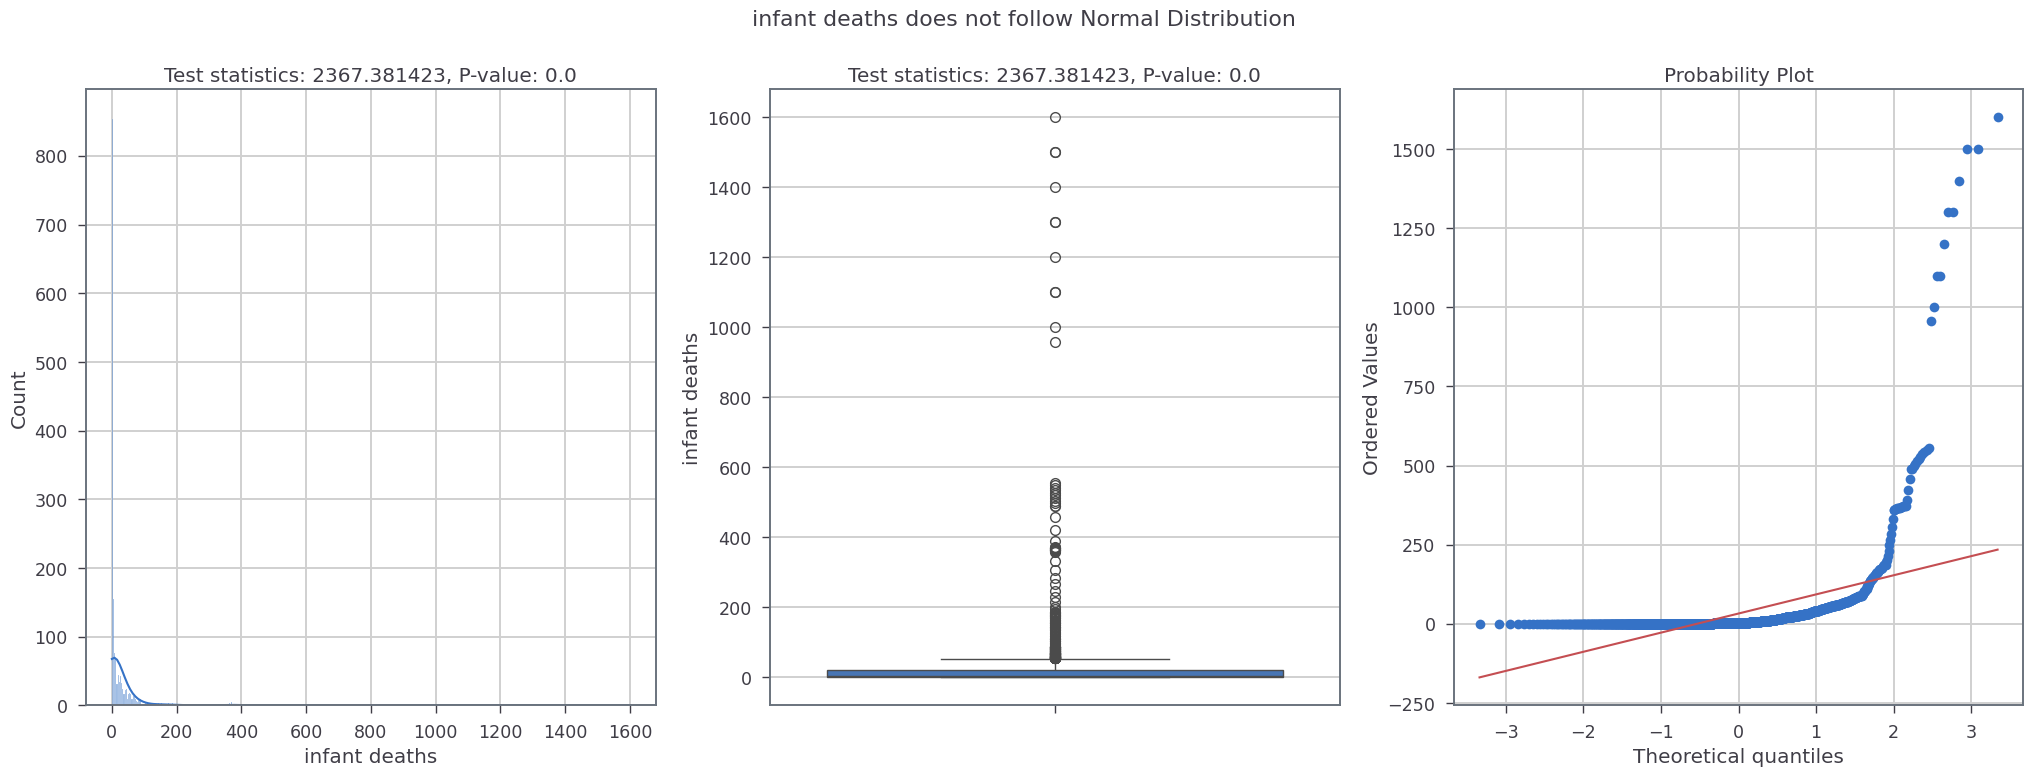

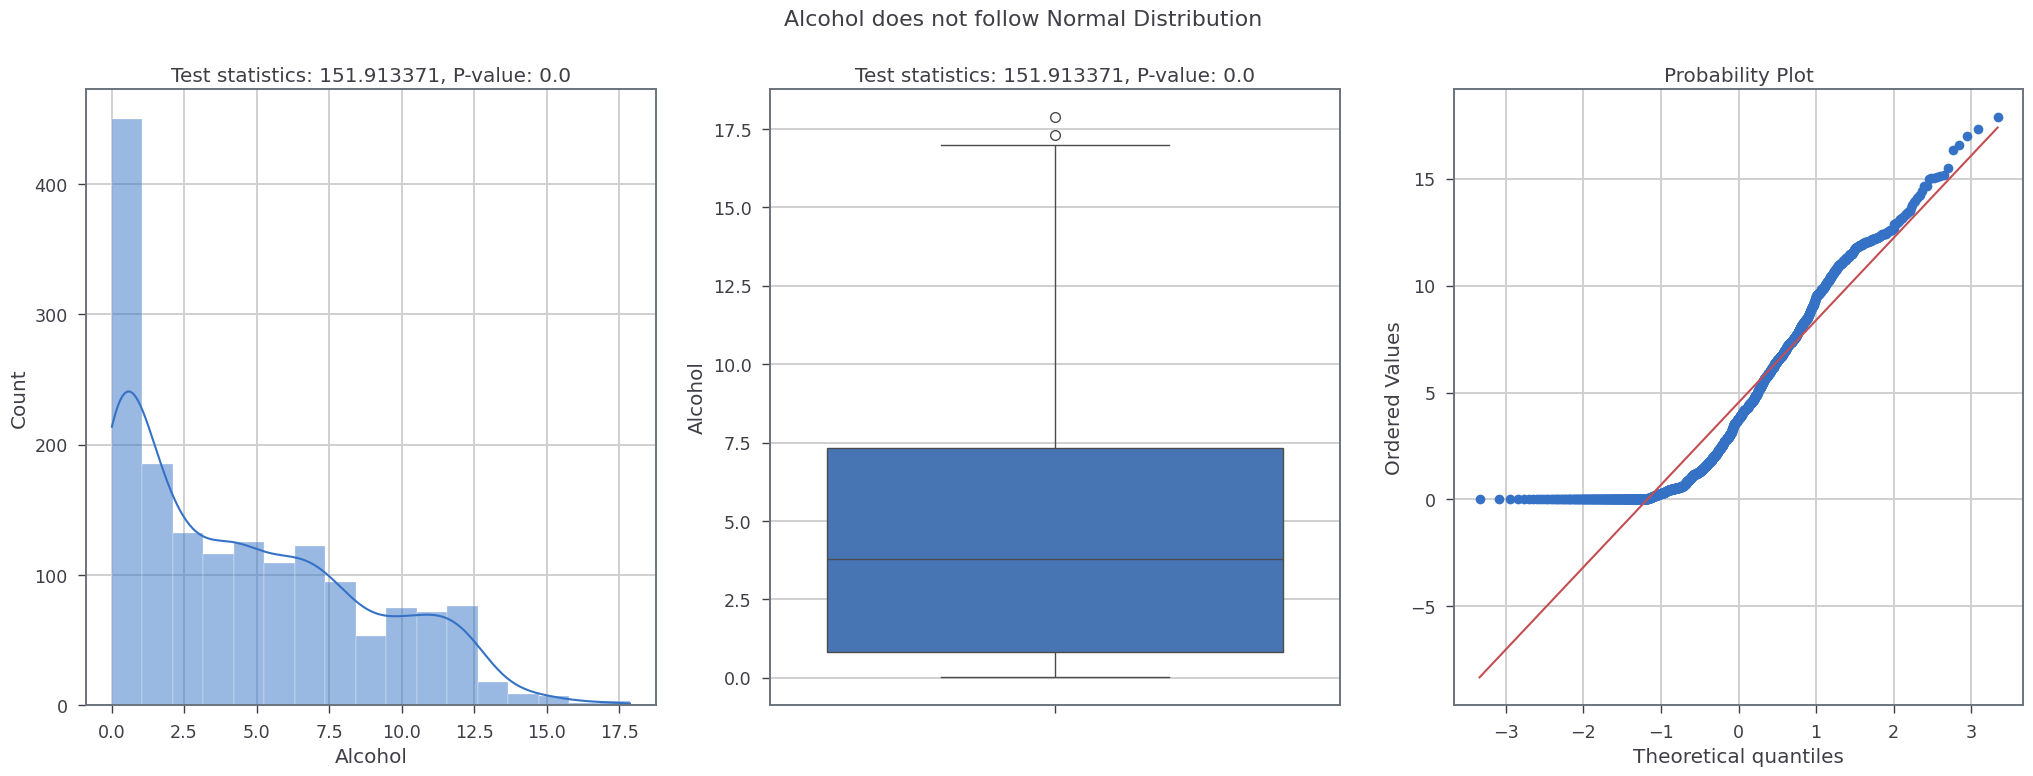

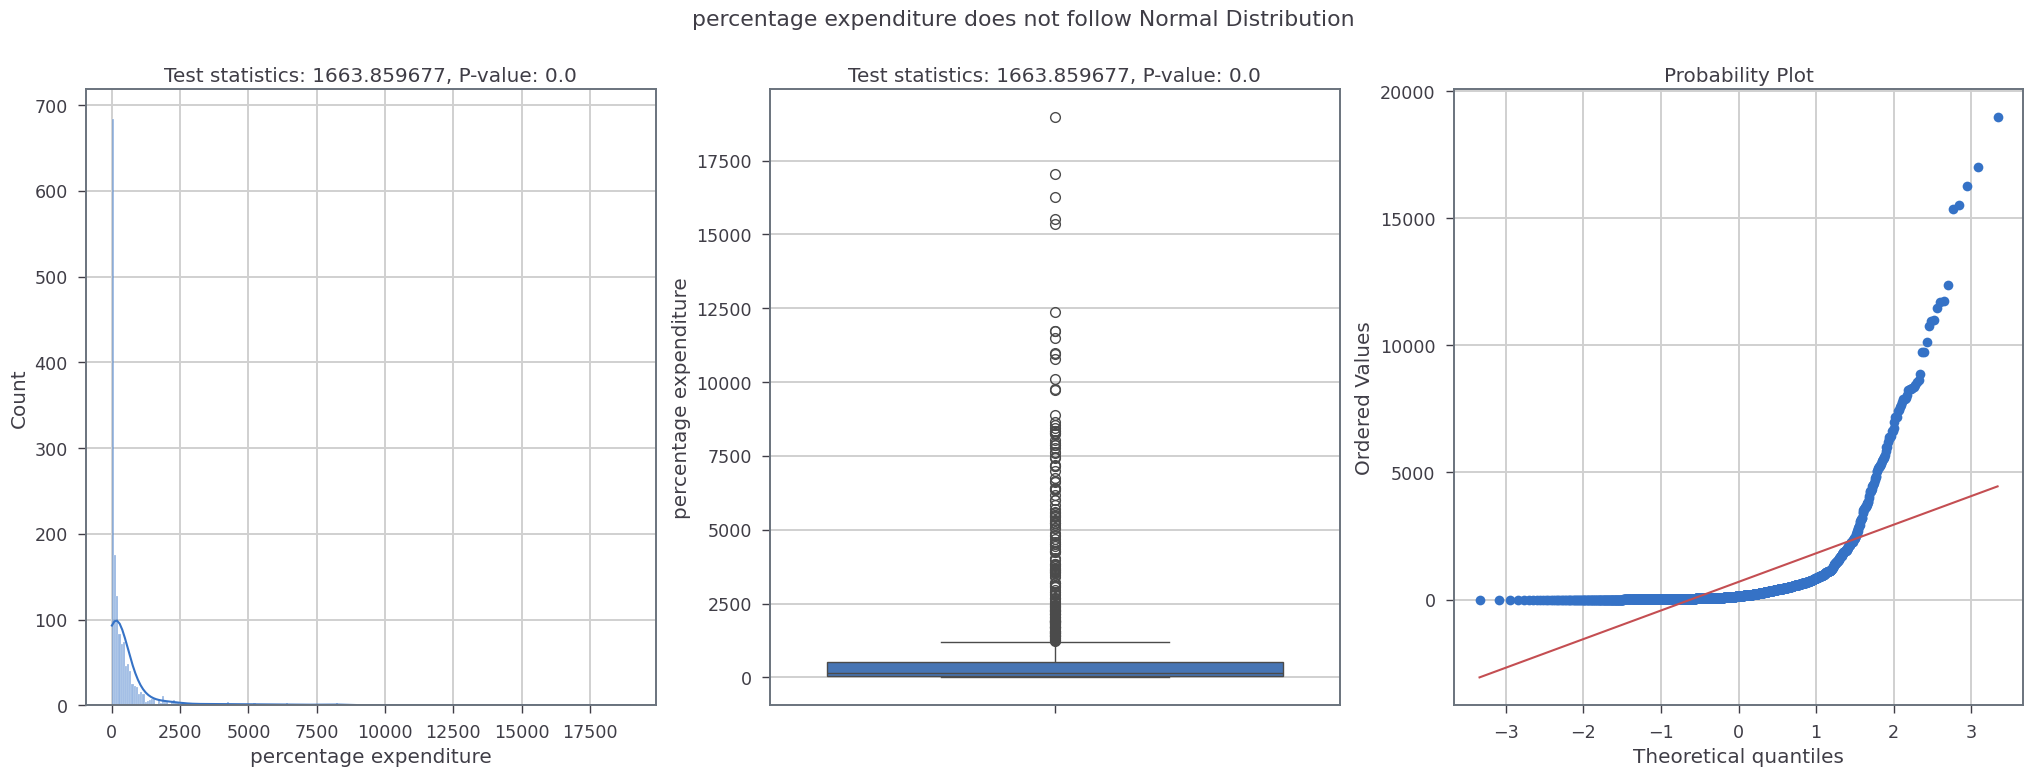

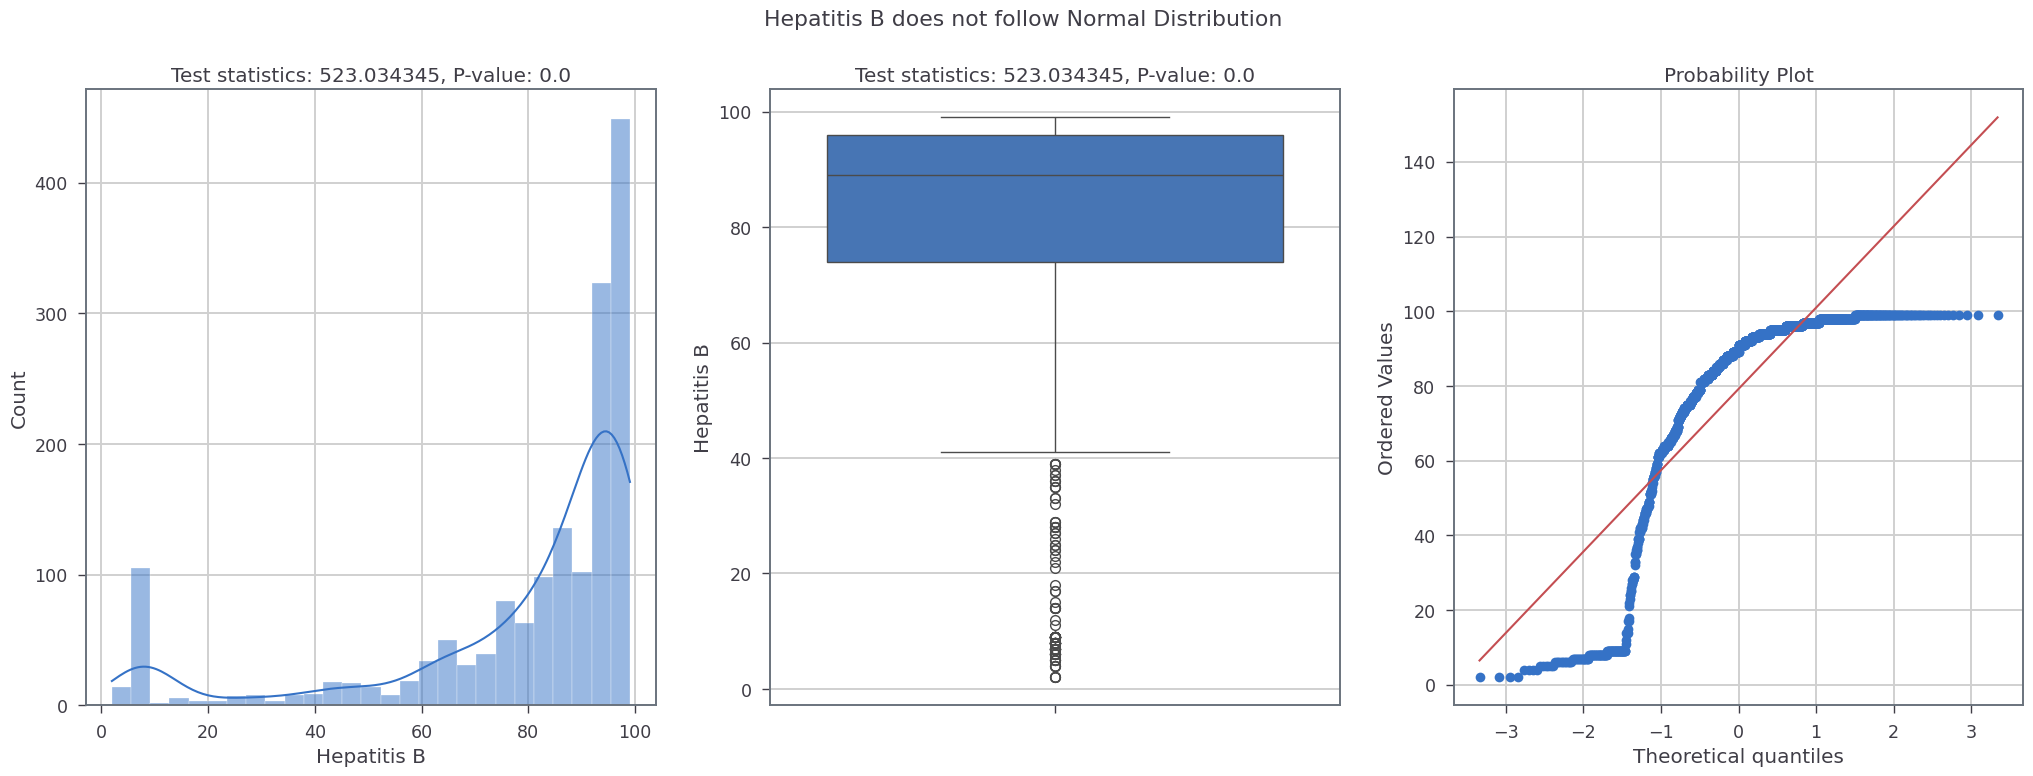

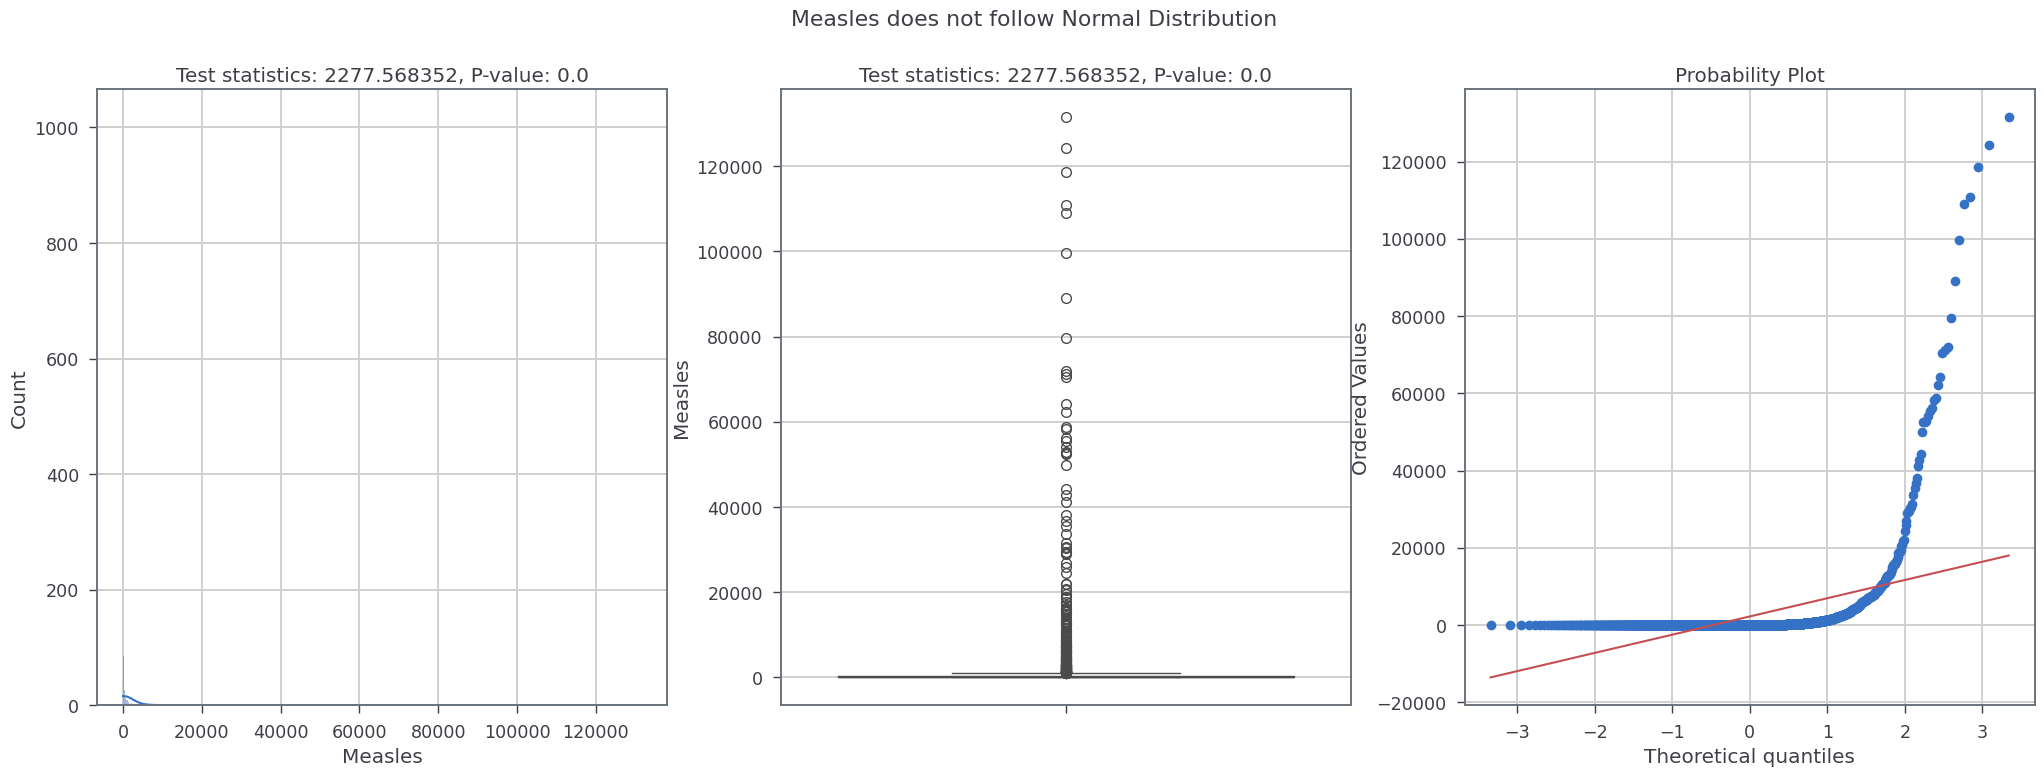

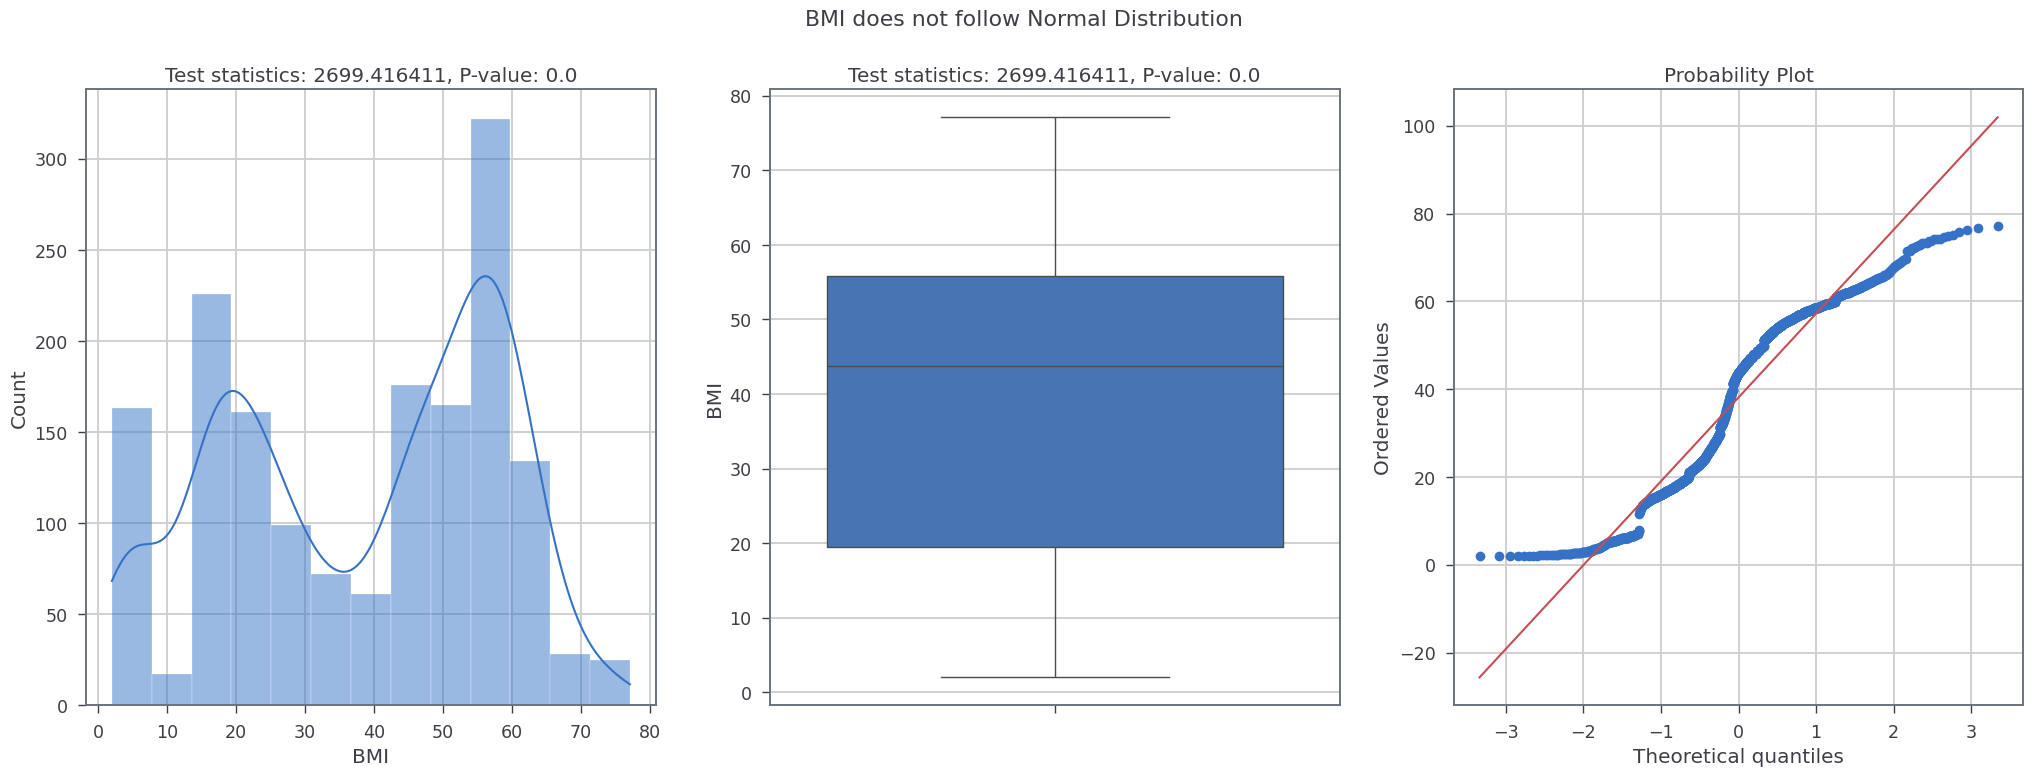

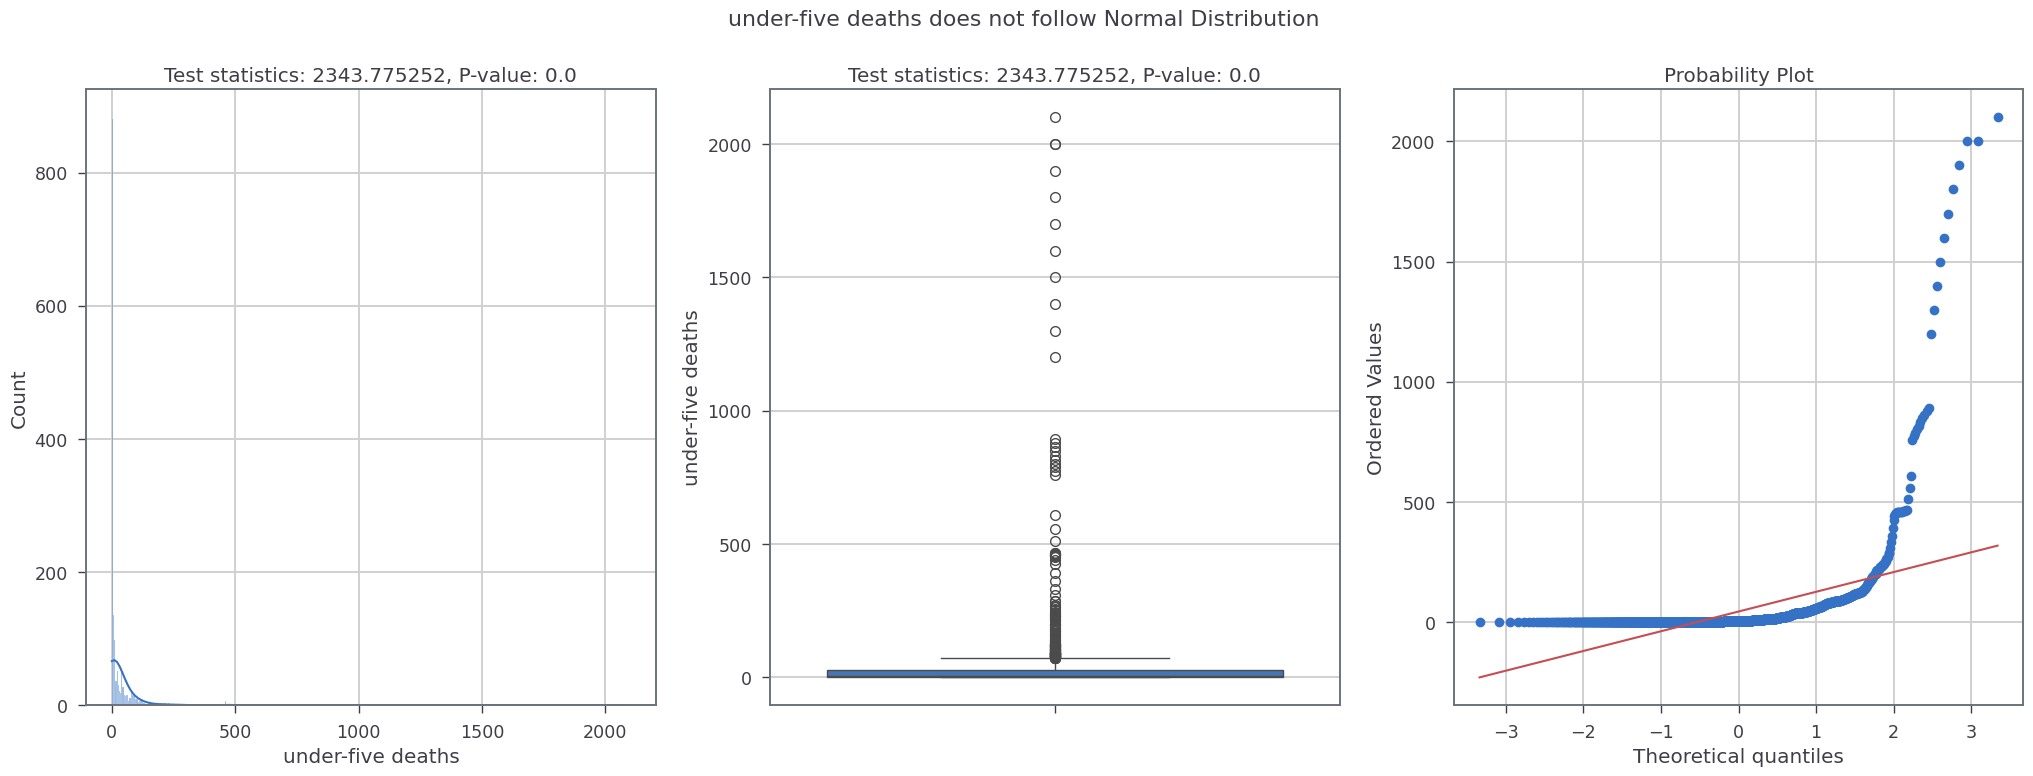

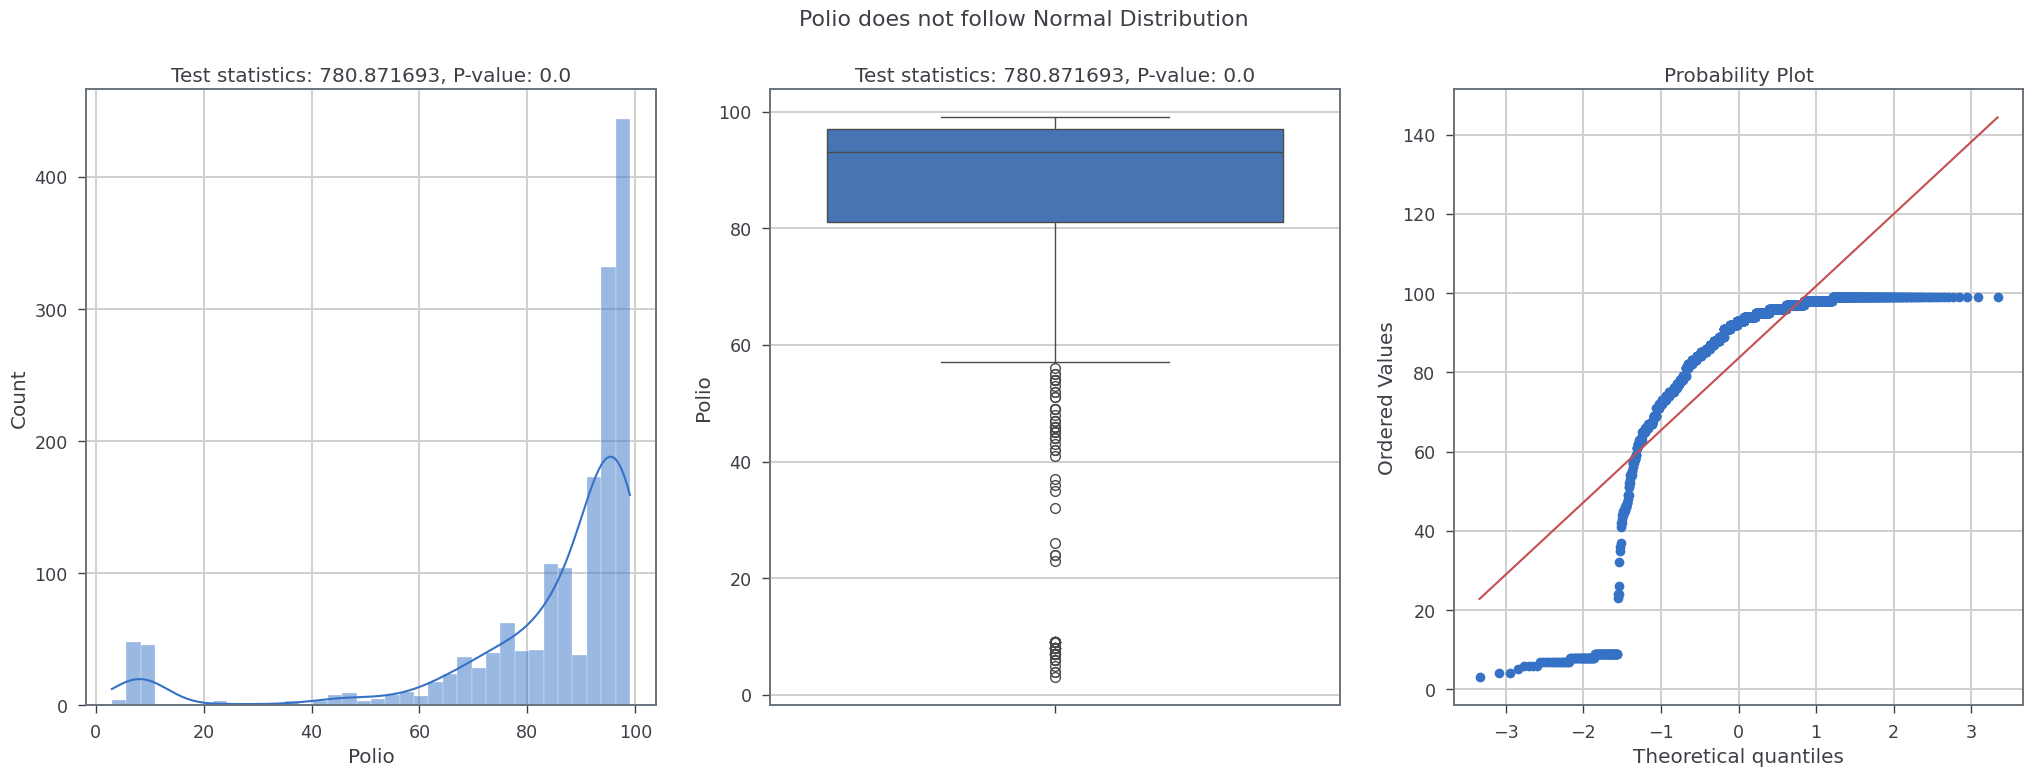

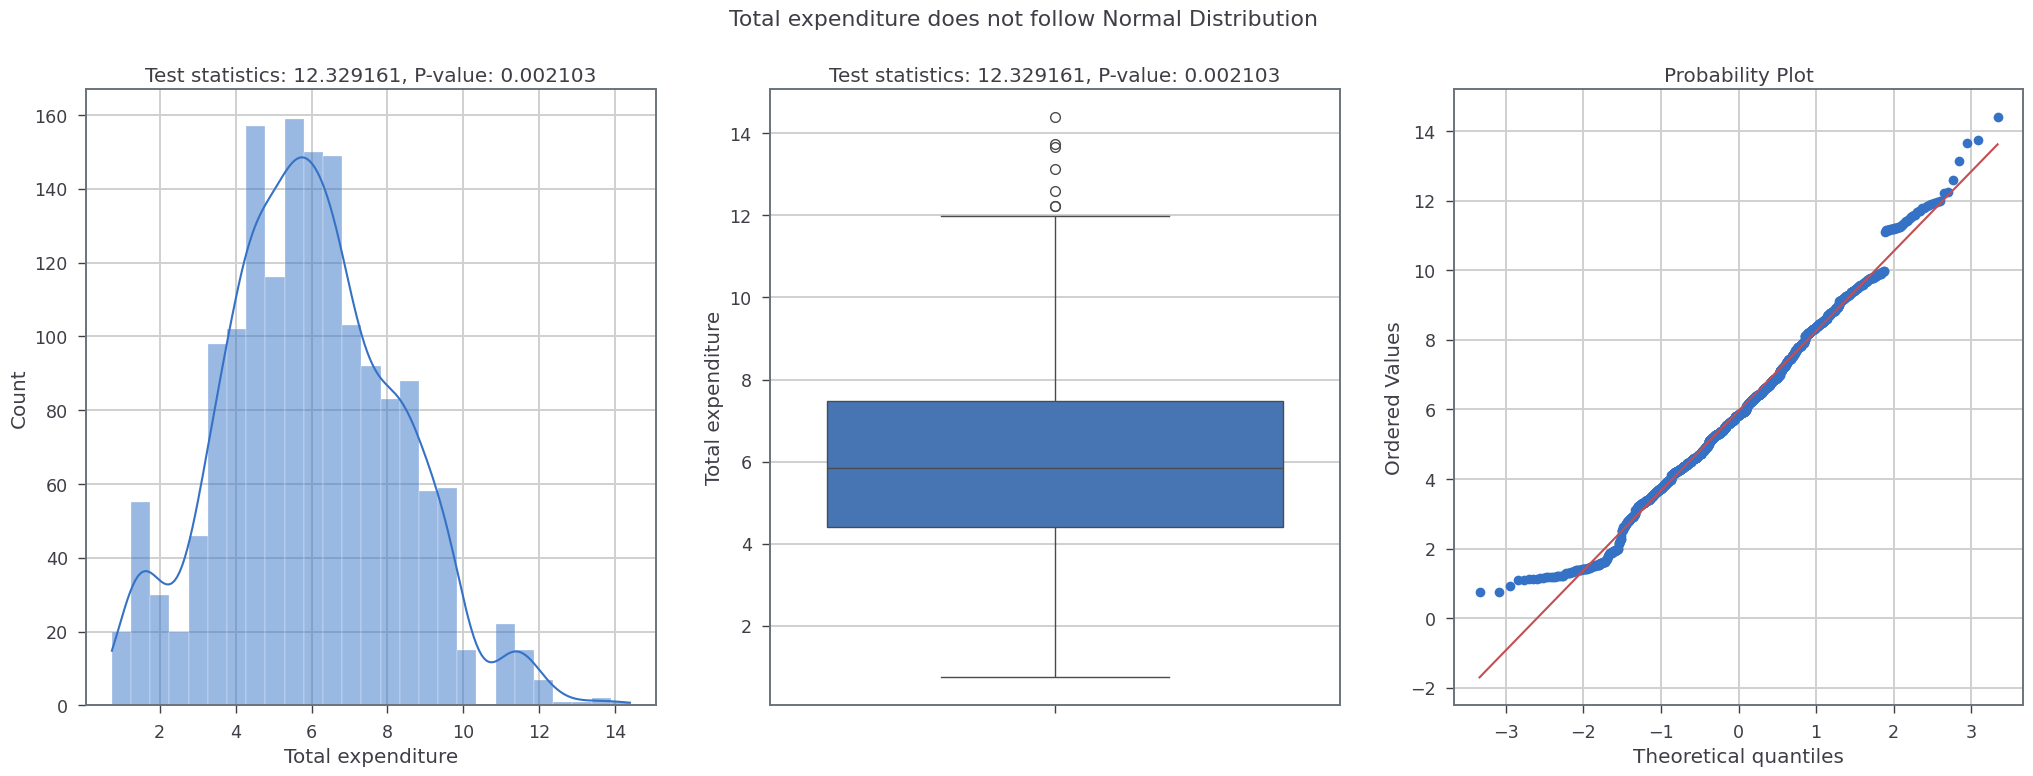

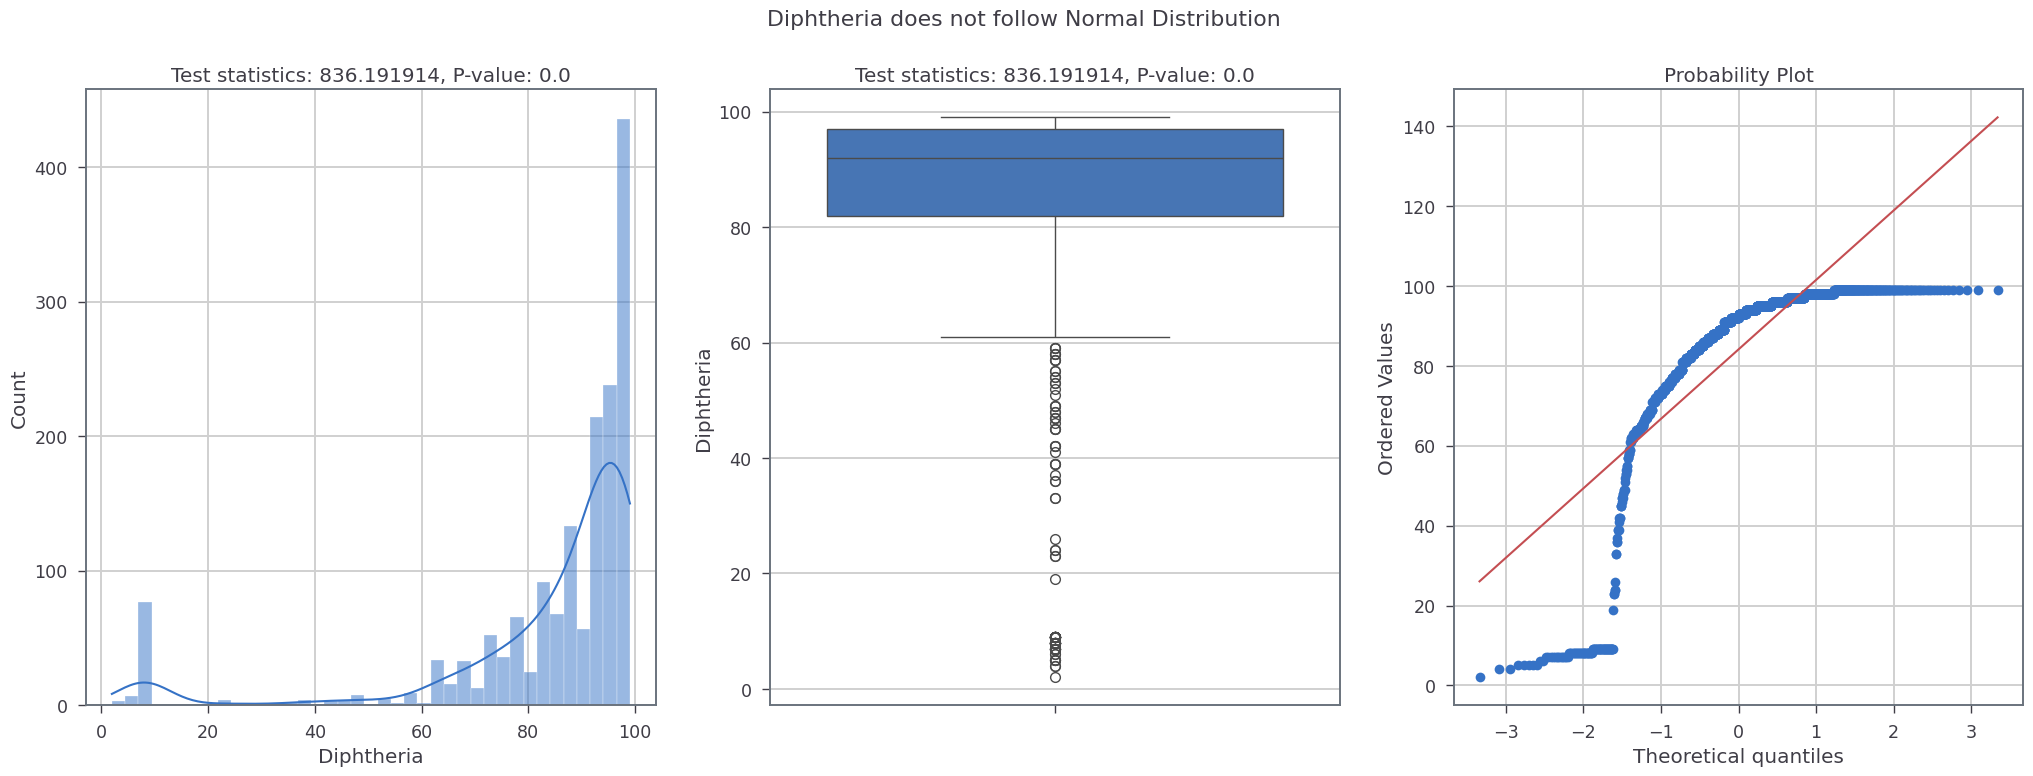

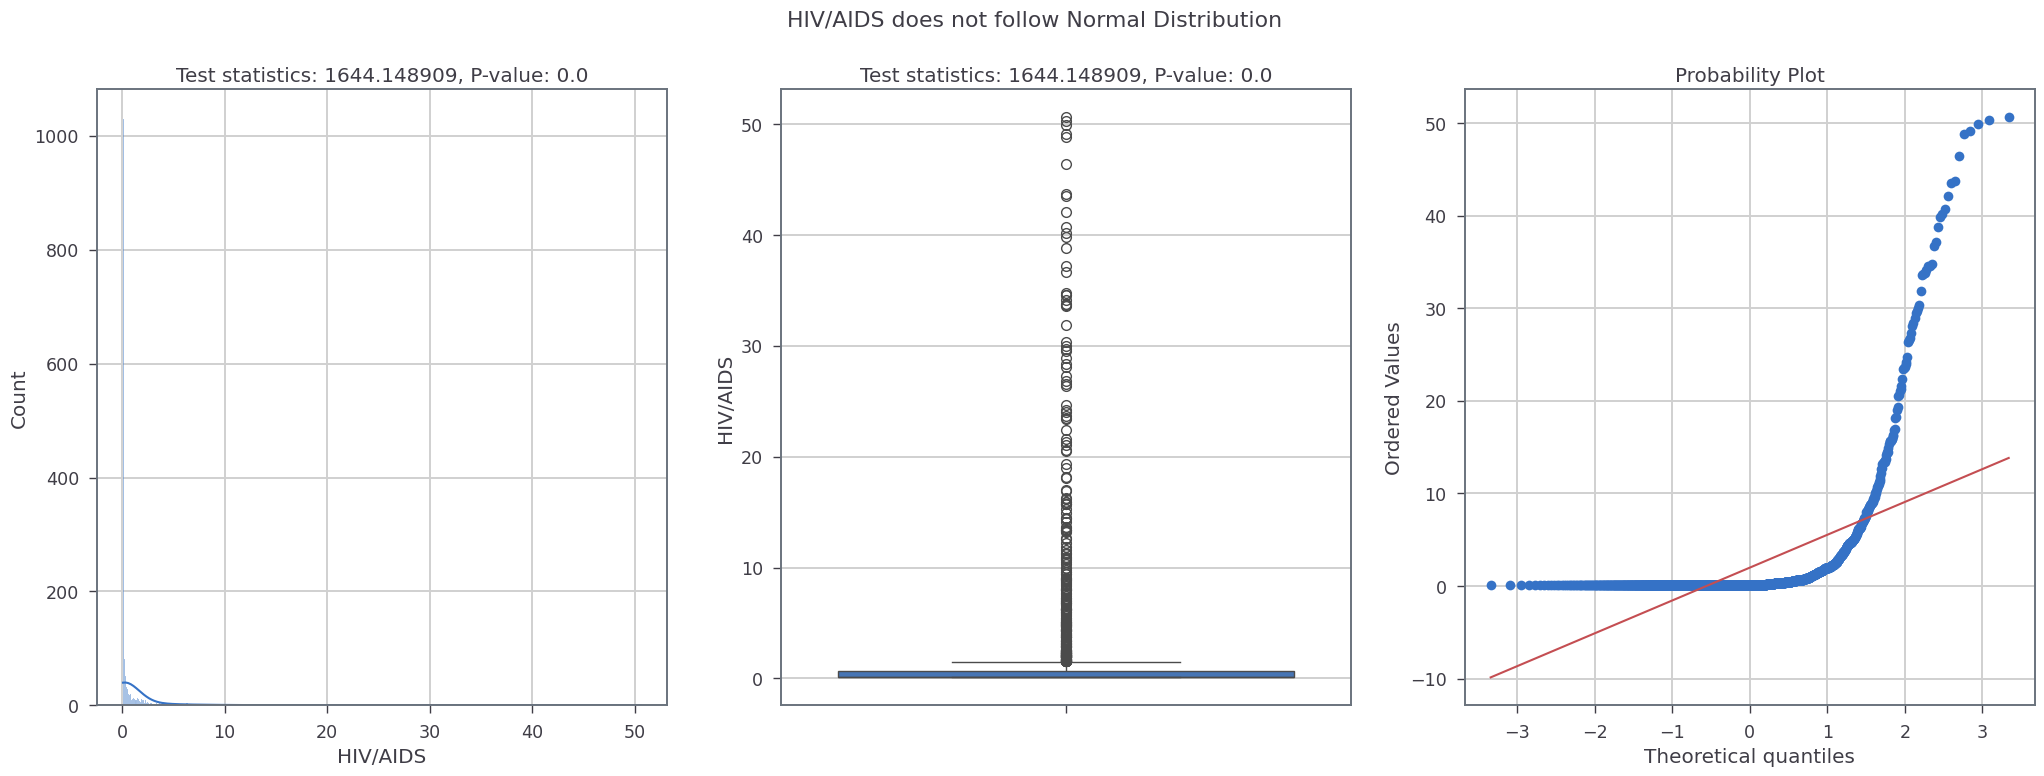

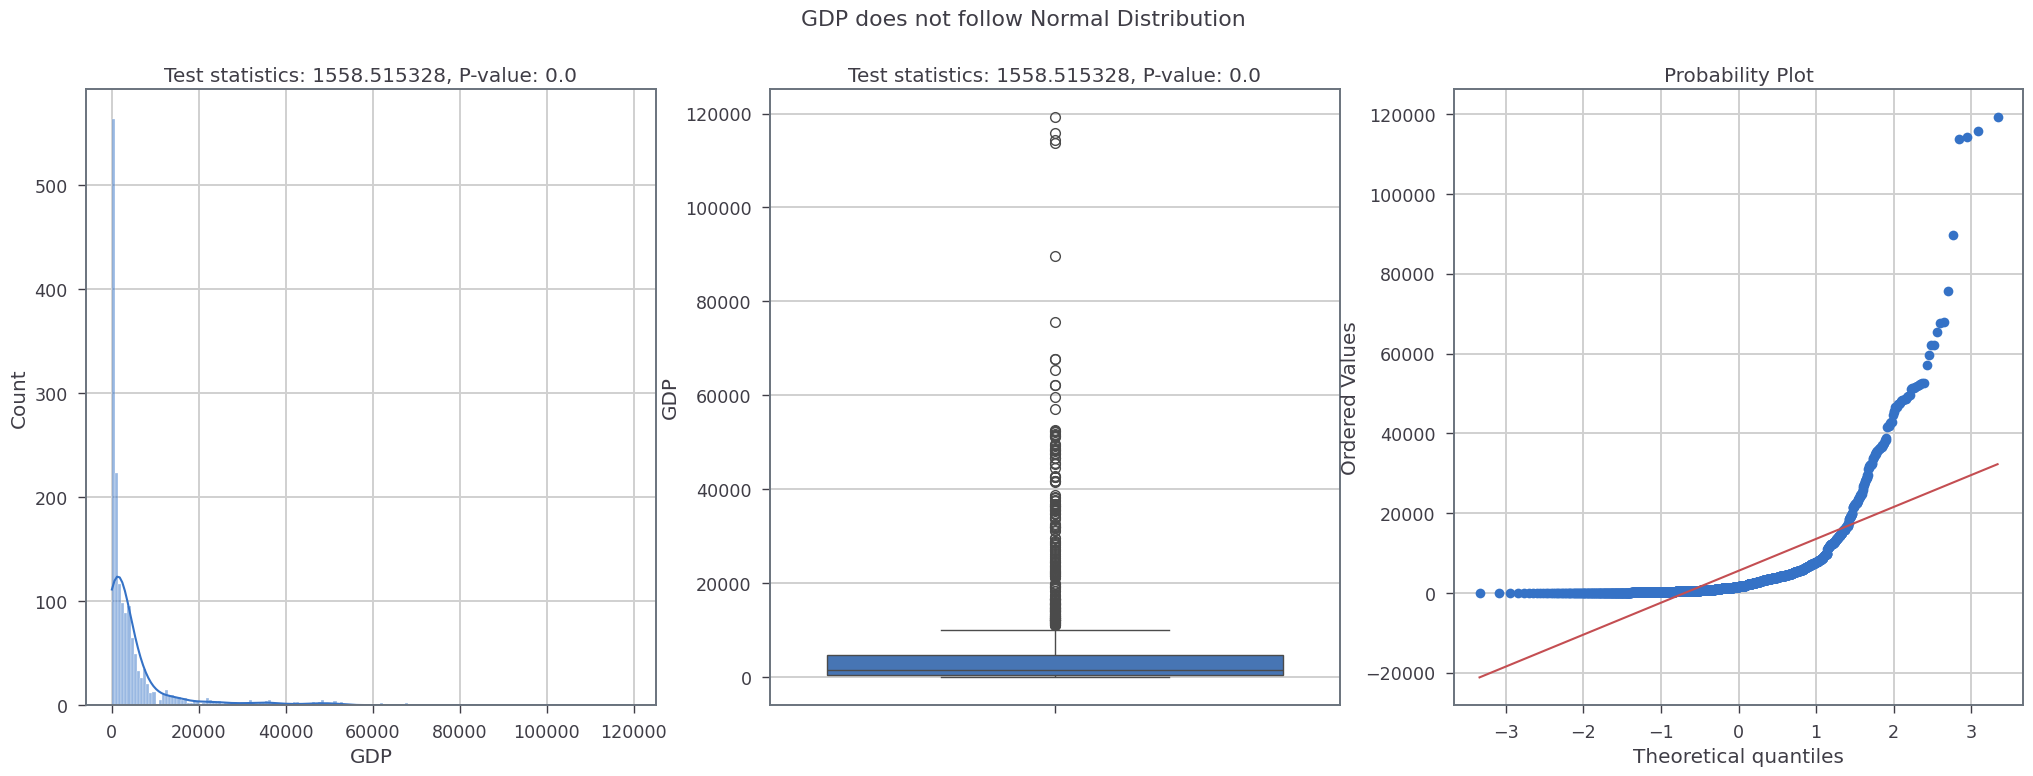

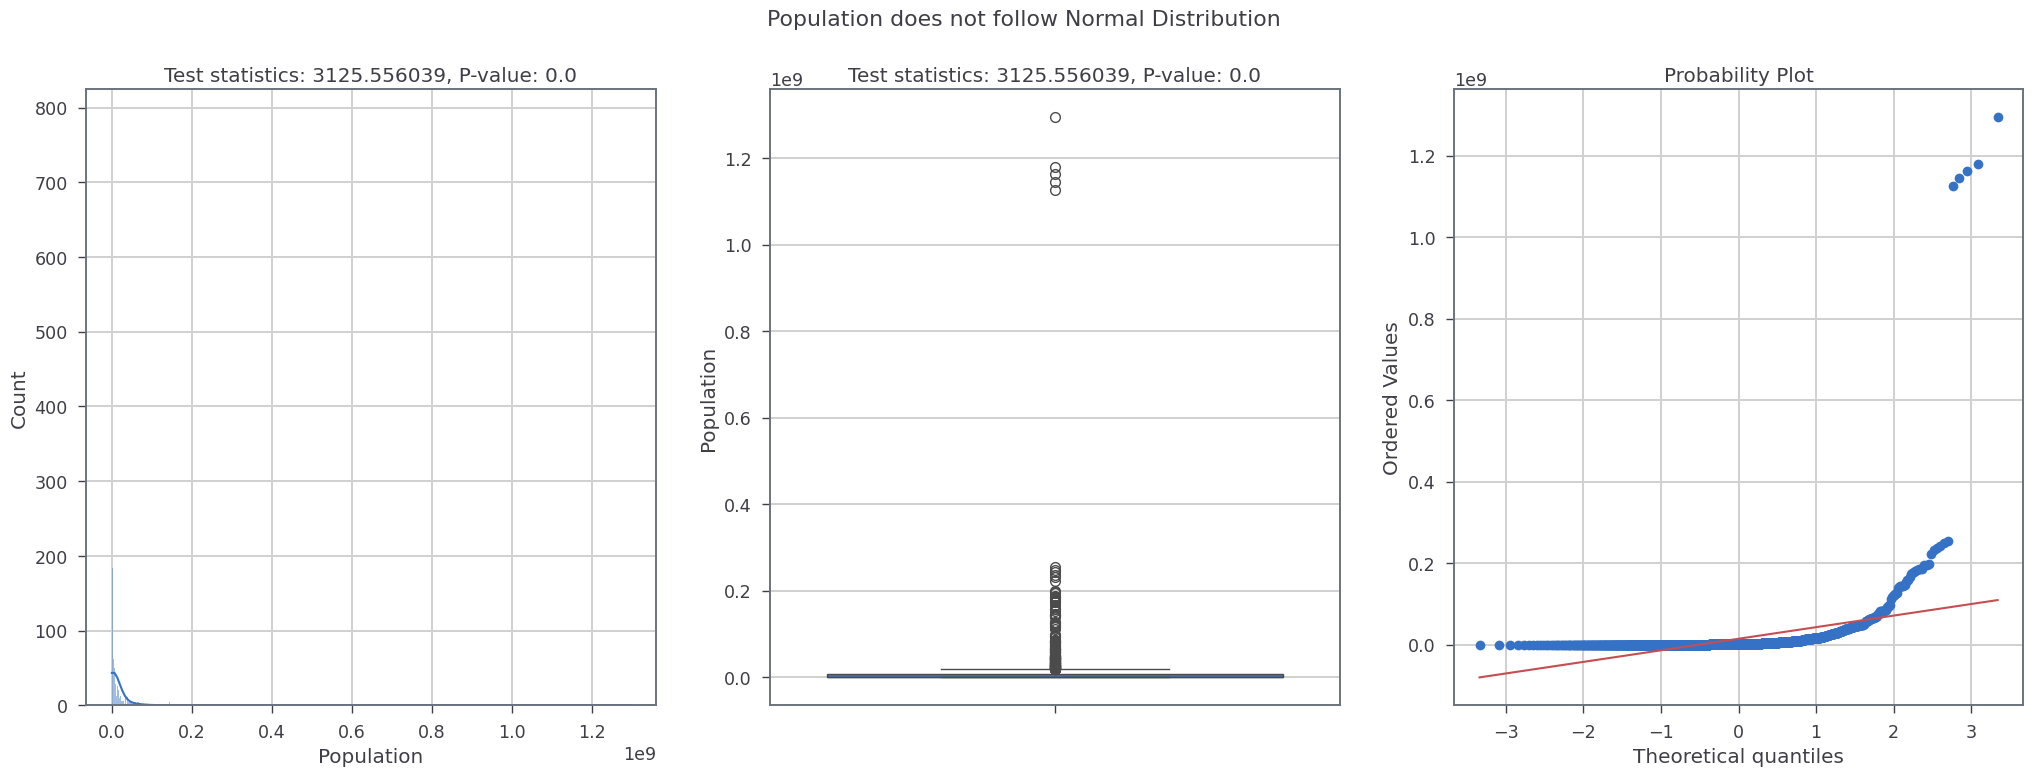

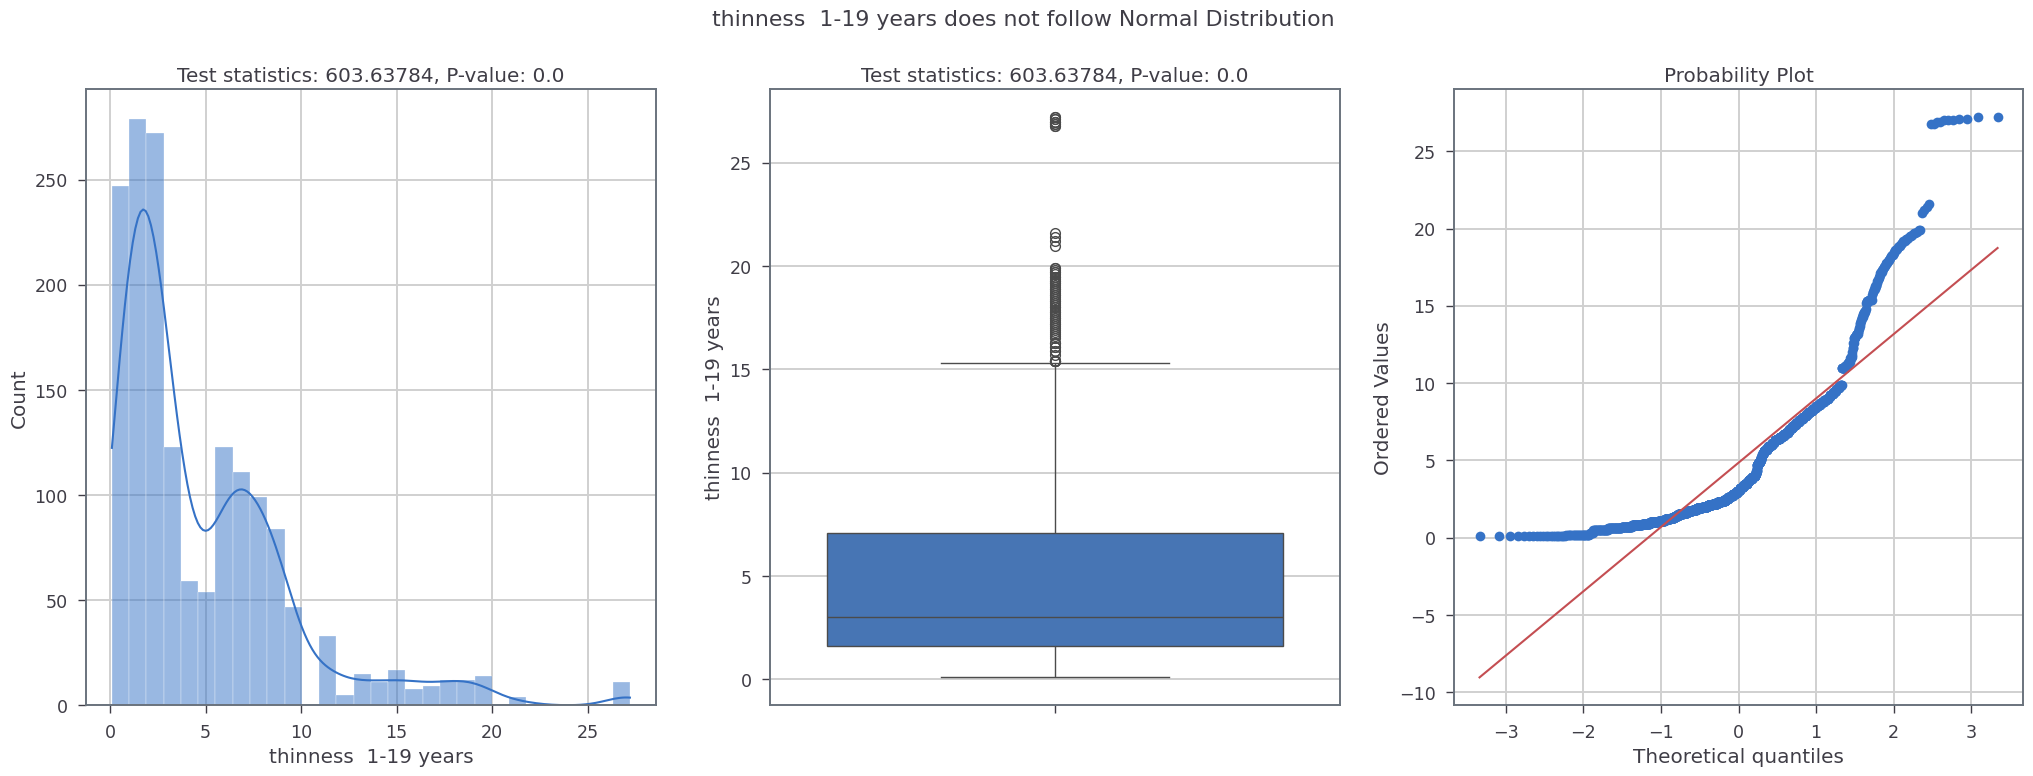

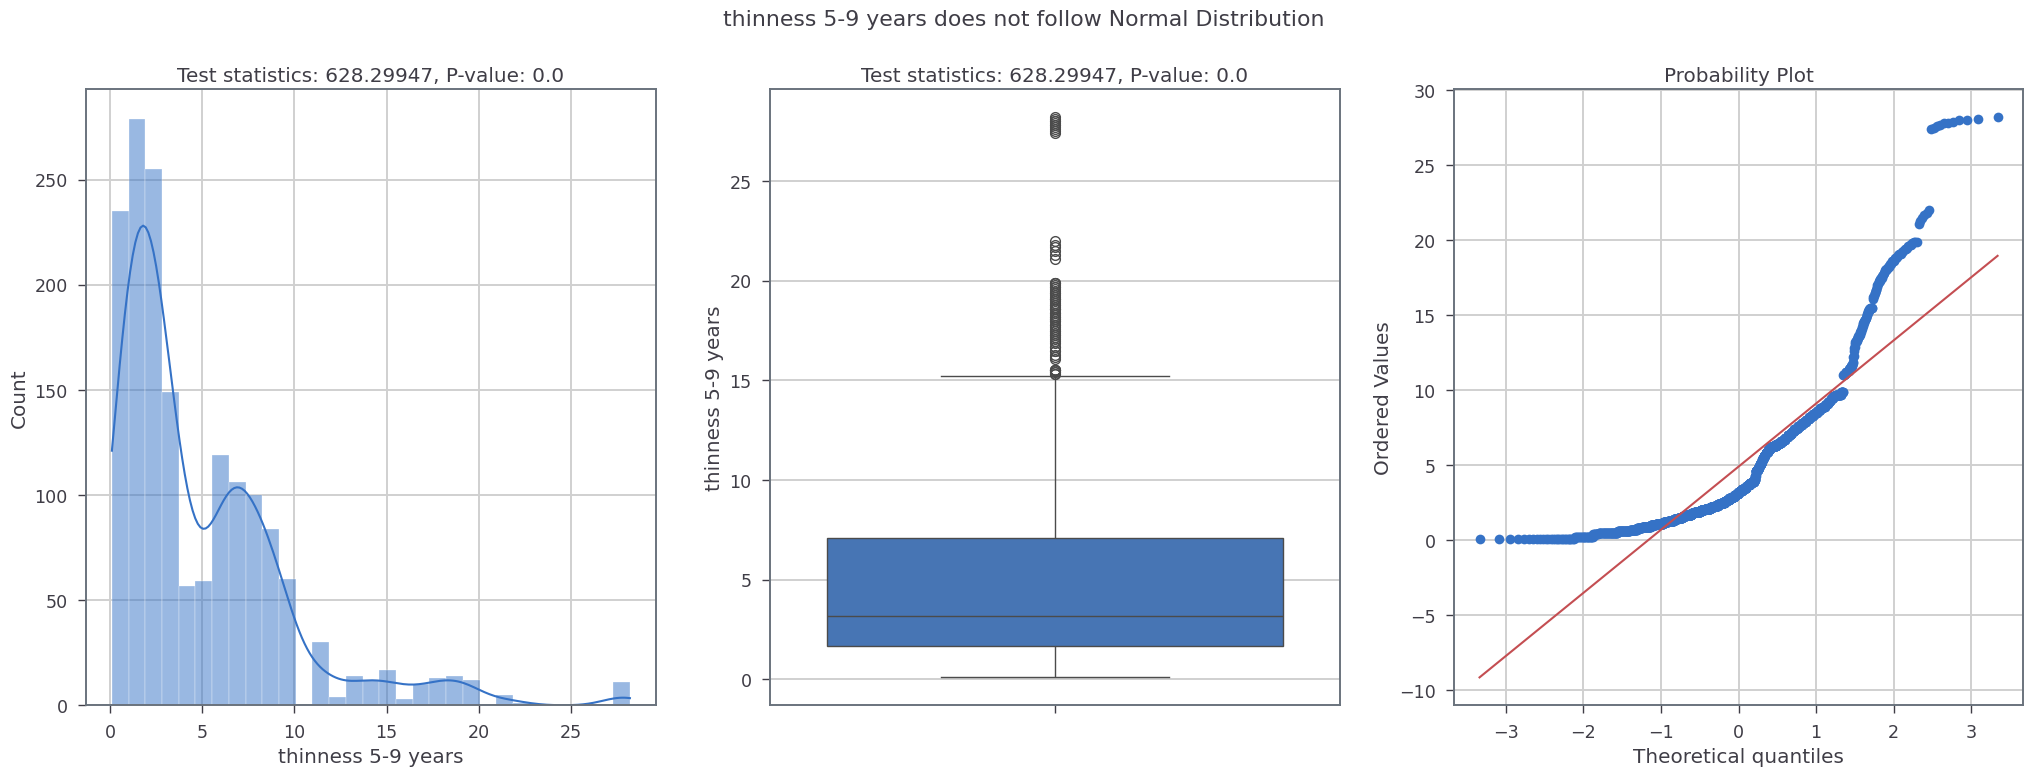

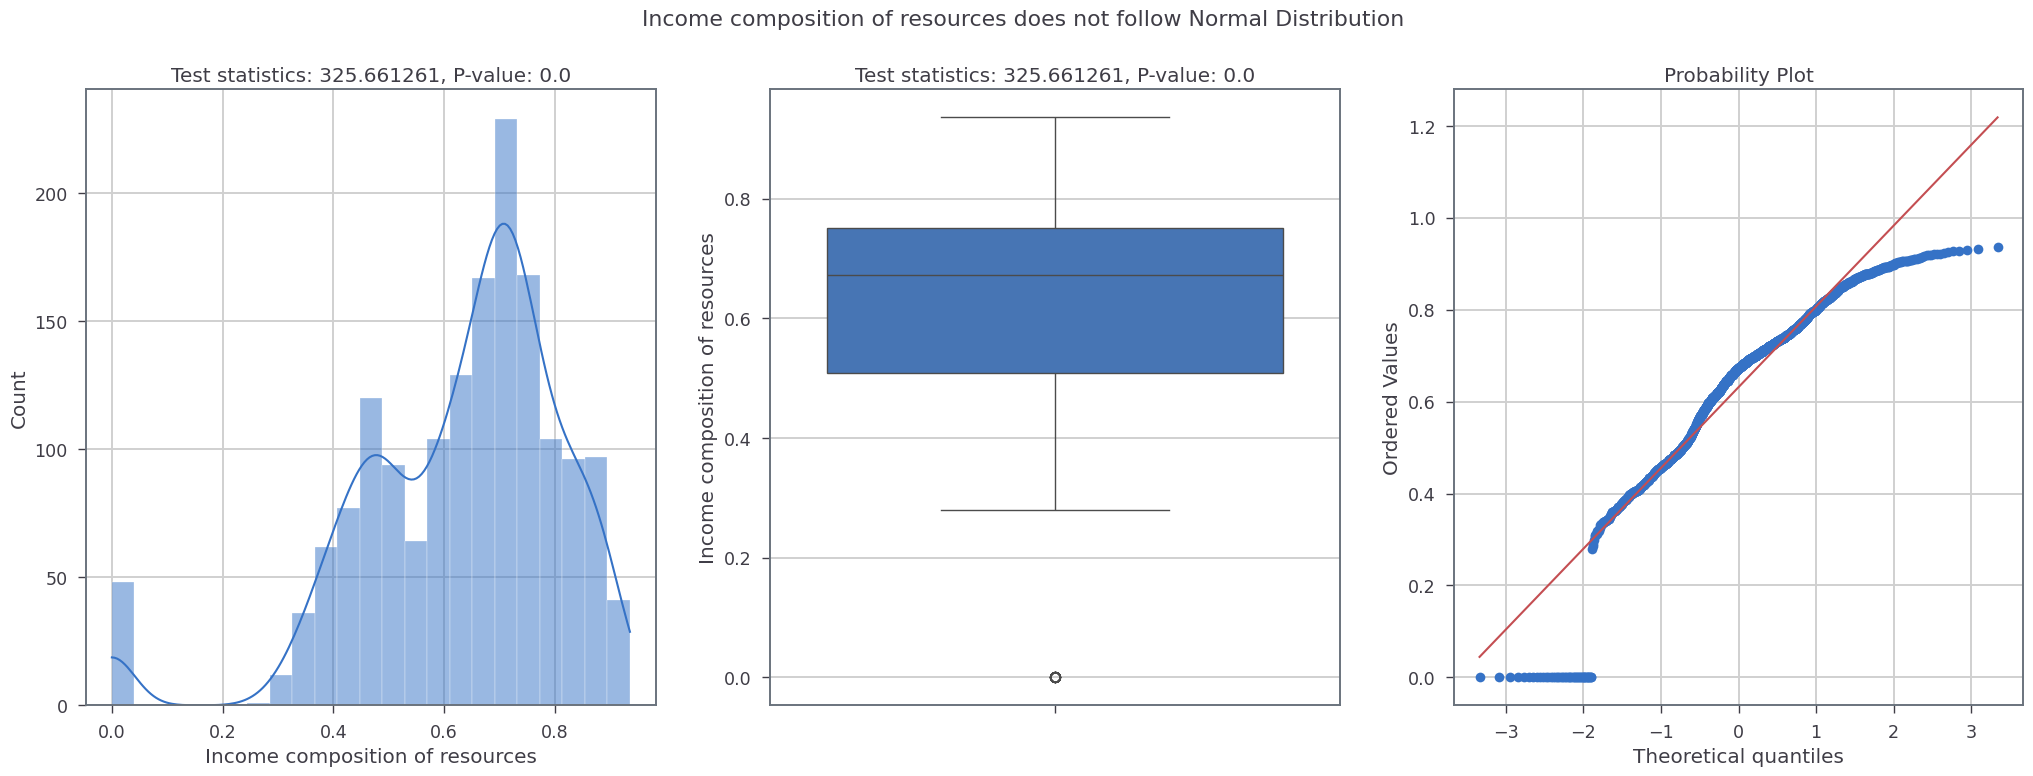

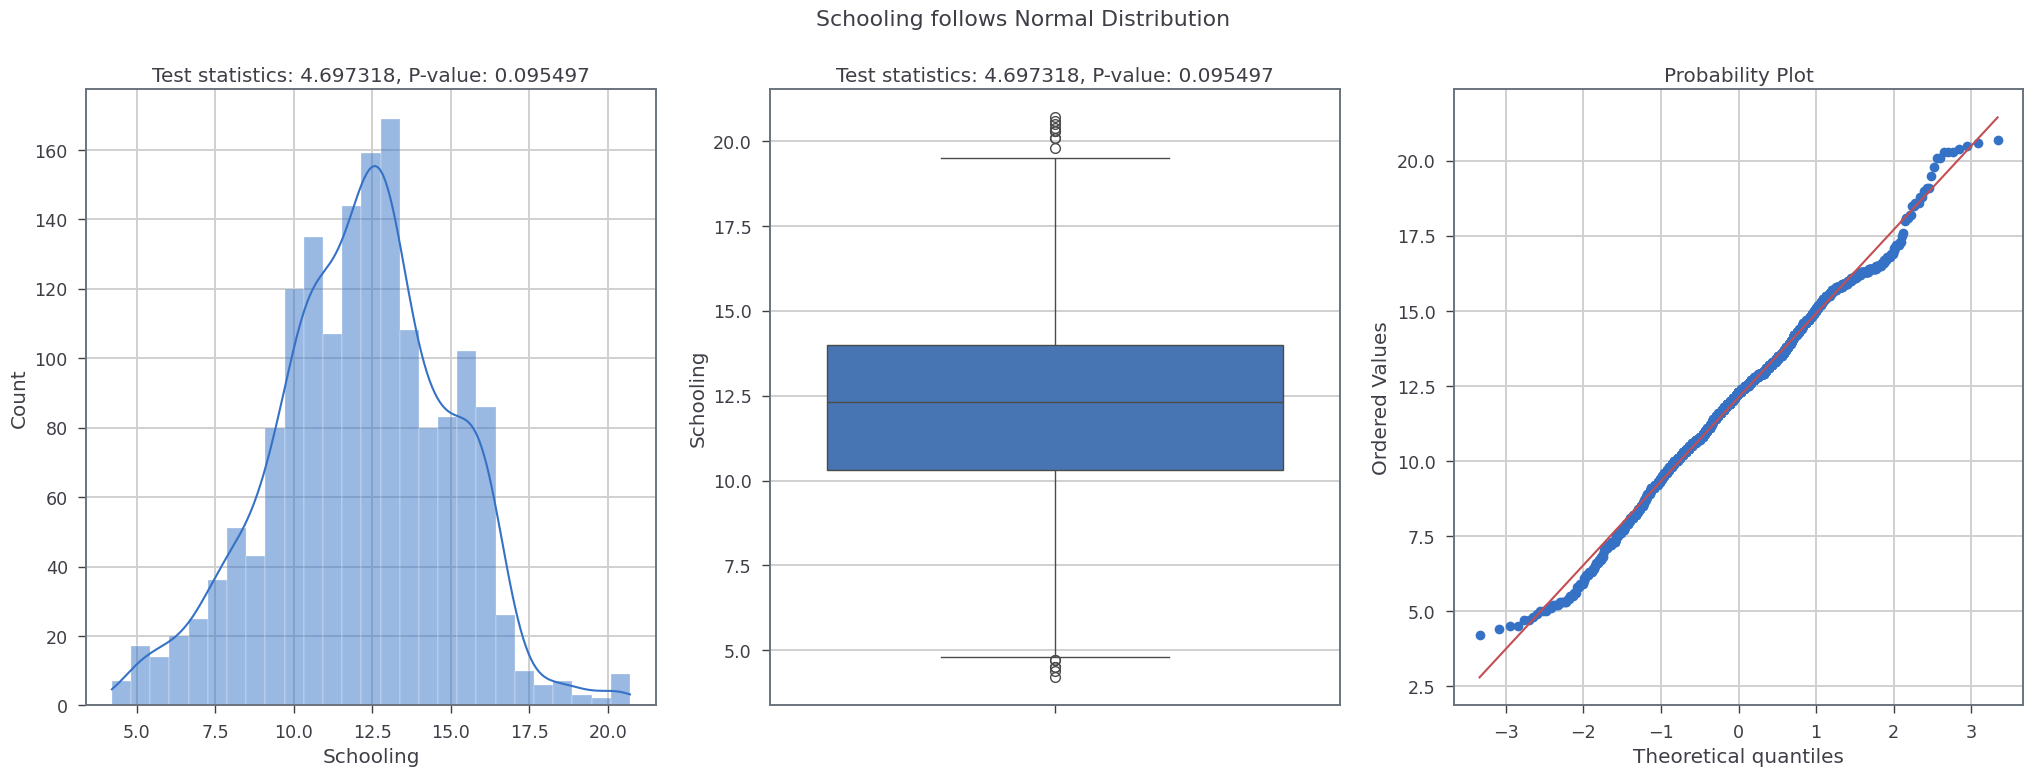

In [158]:

def plotNormalityTest(feature=None,new_data=None):

  fig,ax = plt.subplots(1,3,figsize=(25,8))
  new_data.dropna(inplace=True)
  statistics, p_value = normaltest(new_data[feature])
  ax[0].set_title(f'Test statistics: {np.round(statistics,6)}, P-value: {np.round(p_value,6)}')
  ax[1].set_title(f'Test statistics: {np.round(statistics,6)}, P-value: {np.round(p_value,6)}')
  if p_value <= 0.05:
      fig.suptitle(f'{feature} does not follow Normal Distribution')
  else:
      fig.suptitle(f'{feature} follows Normal Distribution')

  sns.histplot(new_data[feature], ax=ax[0], kde=True)
  sns.boxplot(new_data[feature], ax=ax[1])
  stats.probplot(new_data[feature], plot=ax[2])
  plt.show()
  print('\n\n')

for feature in numericalFeatures:
  plotNormalityTest(feature,data)

#### Observation
  - Skewed (Not following the normal Distribution)
  - Outliers


## Multi-variant Analysis

### Hypotheses for Pearson Correlation Coefficient

In hypothesis testing with Pearson's correlation coefficient \( r \), we typically consider the following hypotheses:

- **Null Hypothesis (\( H_0 \)):**
  The null hypothesis states that there is no significant linear relationship between the two variables being studied.
  \[ H_0: r = 0 \]

- **Alternative Hypothesis (\( H_1 \)):**
  The alternative hypothesis contradicts the null hypothesis and suggests that there is a significant linear relationship between the two variables.
  \[ H_1: r \neq 0 \]
  (Or depending on the research question, it could be one-tailed, either positive or negative.)

When conducting hypothesis testing using Pearson's correlation coefficient, we aim to determine whether the observed correlation coefficient is significantly different from zero. If the p-value associated with the correlation coefficient is smaller than a predetermined significance level (often denoted as \( \alpha \)), typically 0.05, then we reject the null hypothesis in favor of the alternative hypothesis, concluding that there is evidence of a significant linear relationship between the variables. Otherwise, if the p-value is greater than \( \alpha \), we fail to reject the null hypothesis, suggesting insufficient evidence to claim a significant linear relationship.


In [159]:
def pearsonrTestPlot(feature,target,new_data):
  new_data = new_data.dropna()
  fig, ax = plt.subplots(1, 2, figsize=(20, 5))
  pearsonr_statistics,pearsonr_p_value = pearsonr(new_data[feature], new_data[target])
  spearmanr_statistics,spearmanr_p_value = spearmanr(new_data[feature], new_data[target])
  if pearsonr_p_value < 0.05 and spearmanr_p_value < 0.05:
    fig.suptitle(f"""{feature} and {target} are probabily dependent
    pearsonr p-value : {np.round(pearsonr_p_value,5)} & pearsonr corr : {np.round(pearsonr_statistics,5)}
    spearmanr p-value : {np.round(spearmanr_p_value,5)} & spearmanr corr : {np.round(spearmanr_statistics,5)}
                 """,fontsize=10)
  else:
    fig.suptitle(f"""{feature} and {target} are probabily dependent
    pearsonr p-value : {np.round(pearsonr_p_value,5)} & pearsonr corr : {np.round(pearsonr_statistics,5)}
    spearmanr p-value : {np.round(spearmanr_p_value,5)} & spearmanr corr : {np.round(spearmanr_statistics,5)}
                 """,fontsize=10)

  # Plot a scatter plot in the first subplot (ax[0])
  ax[0].scatter(new_data[feature], new_data[target])
  ax[0].set_xlabel(f'{feature}')
  ax[0].set_ylabel(f'{target}')

  # Using Seaborn to create a regression plot in the second subplot (ax[1])
  sns.regplot(data=new_data, x=new_data[feature], y=new_data[target], ax=ax[1])
  ax[1].set_xlabel(f'{feature}')
  ax[1].set_ylabel(f'{target}')

  plt.show()
  print('\n\n')

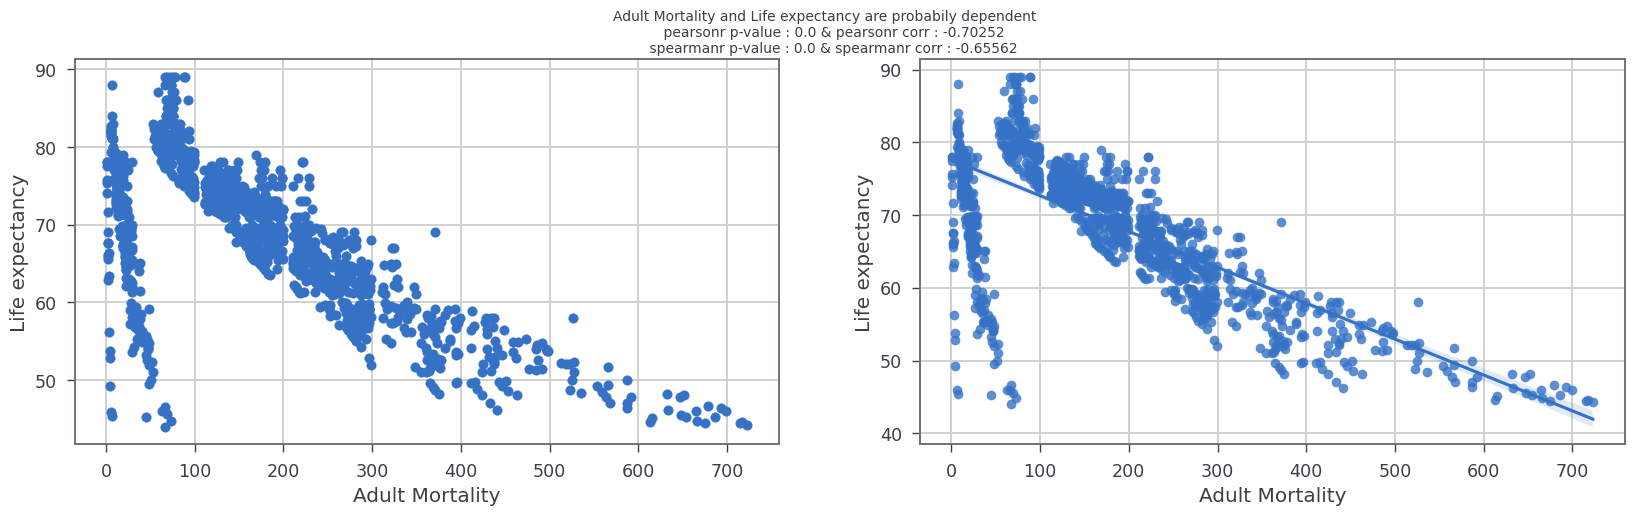

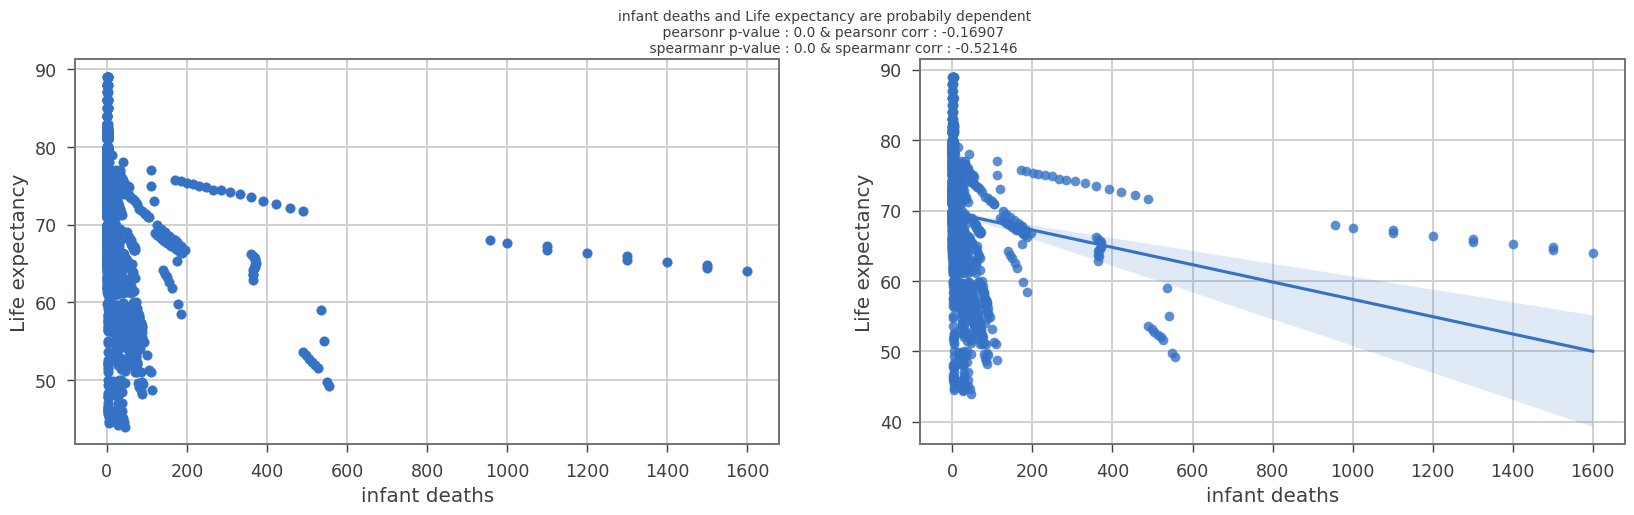

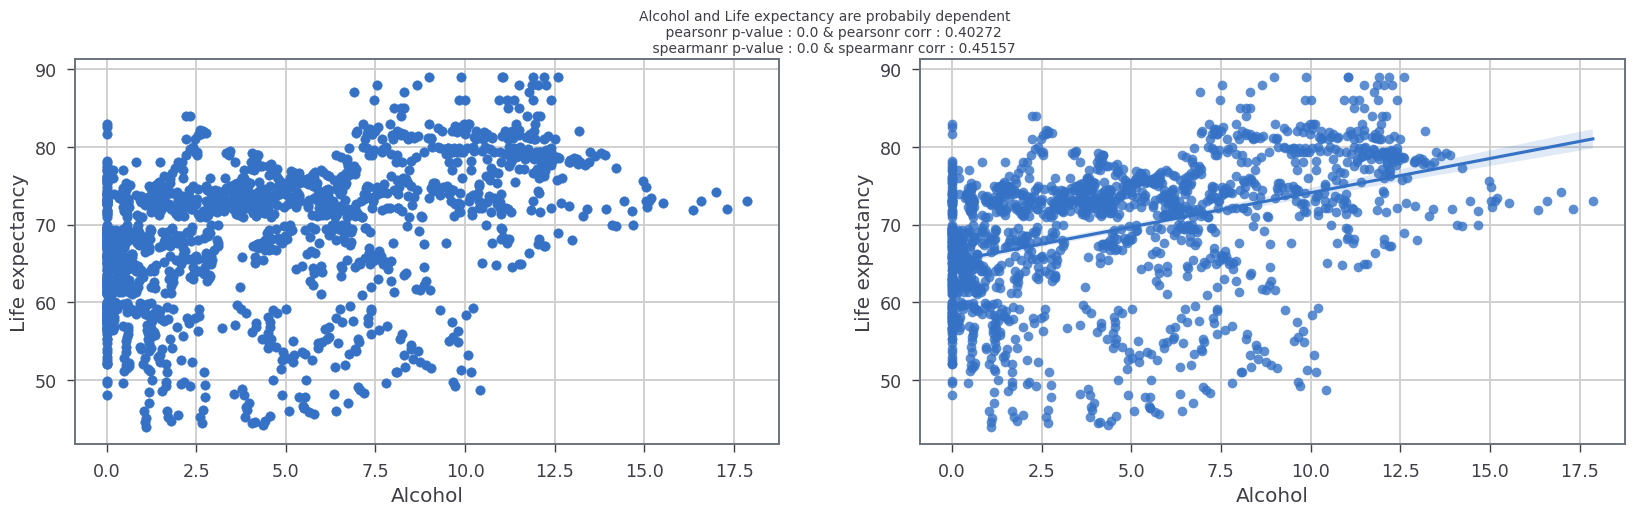

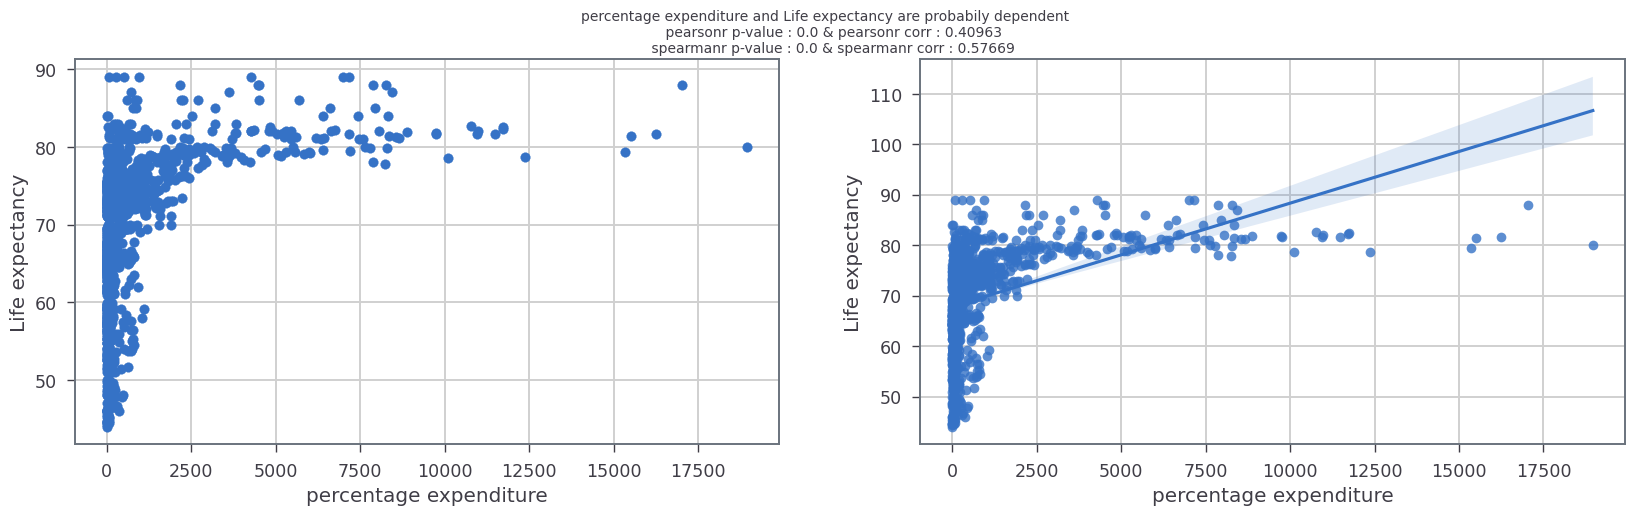

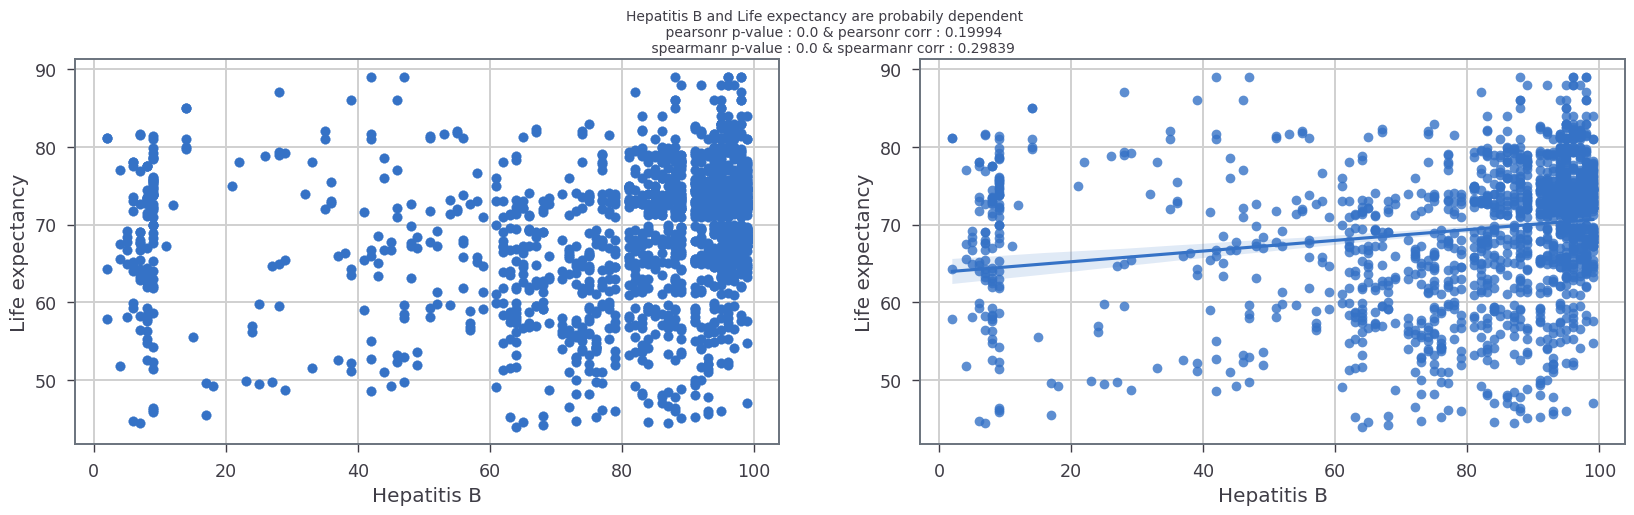

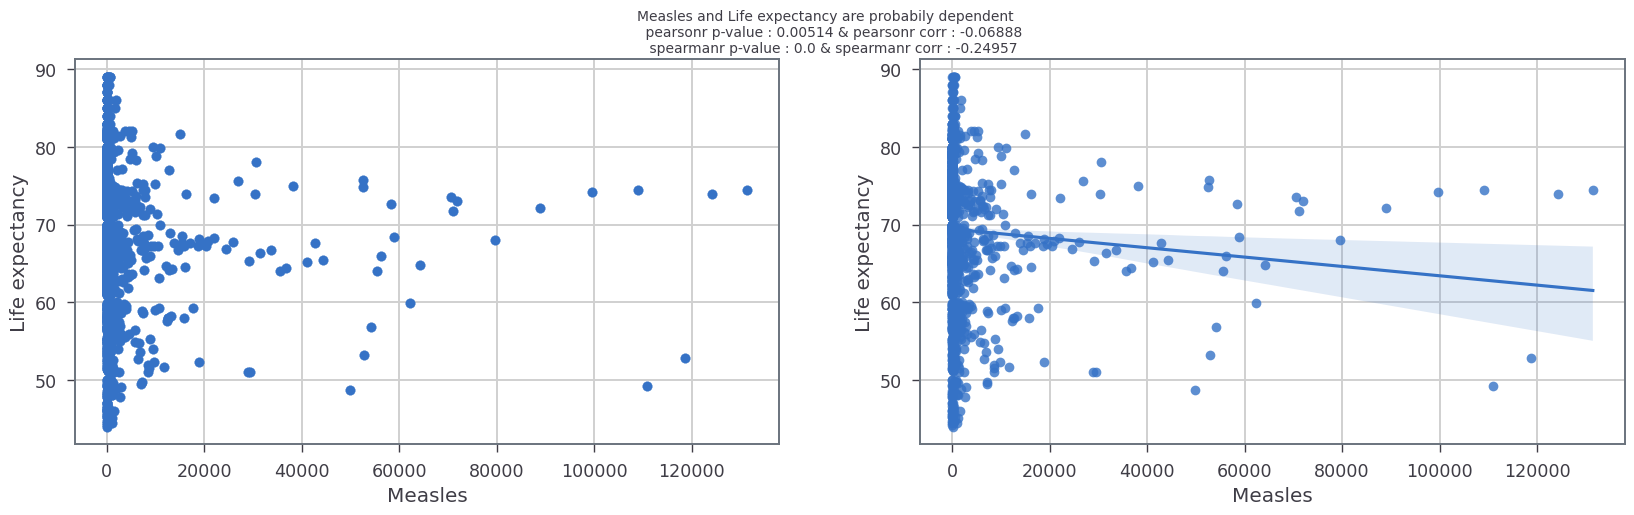

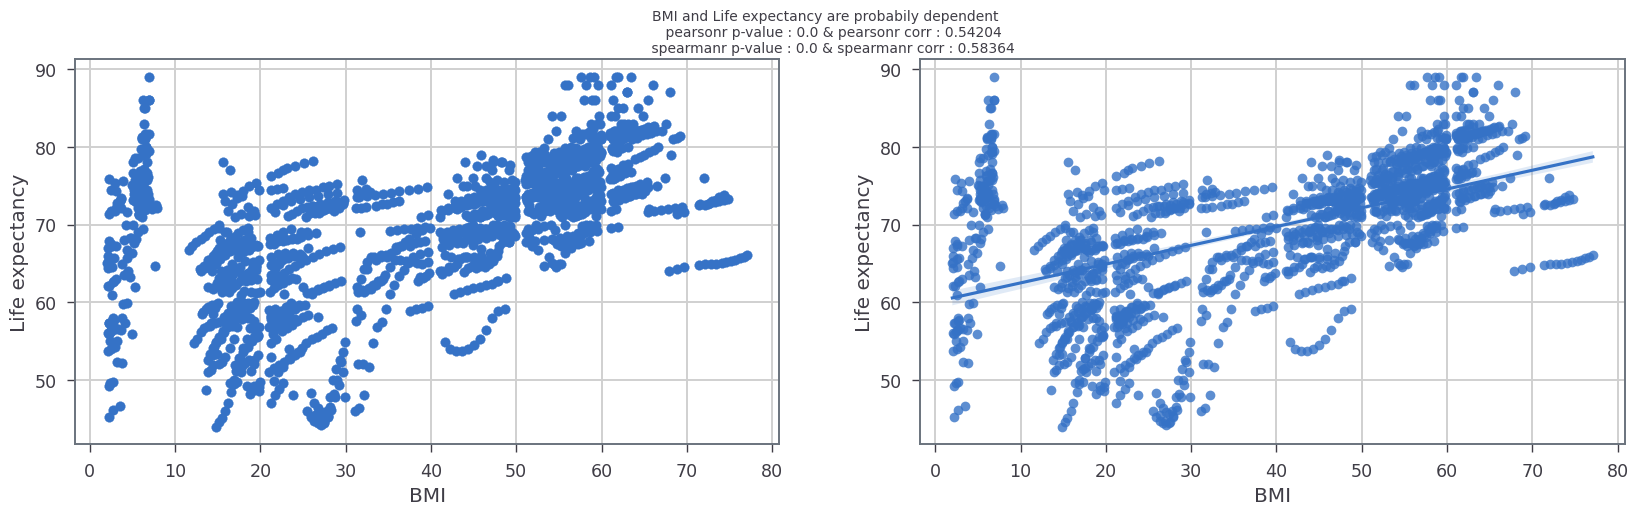

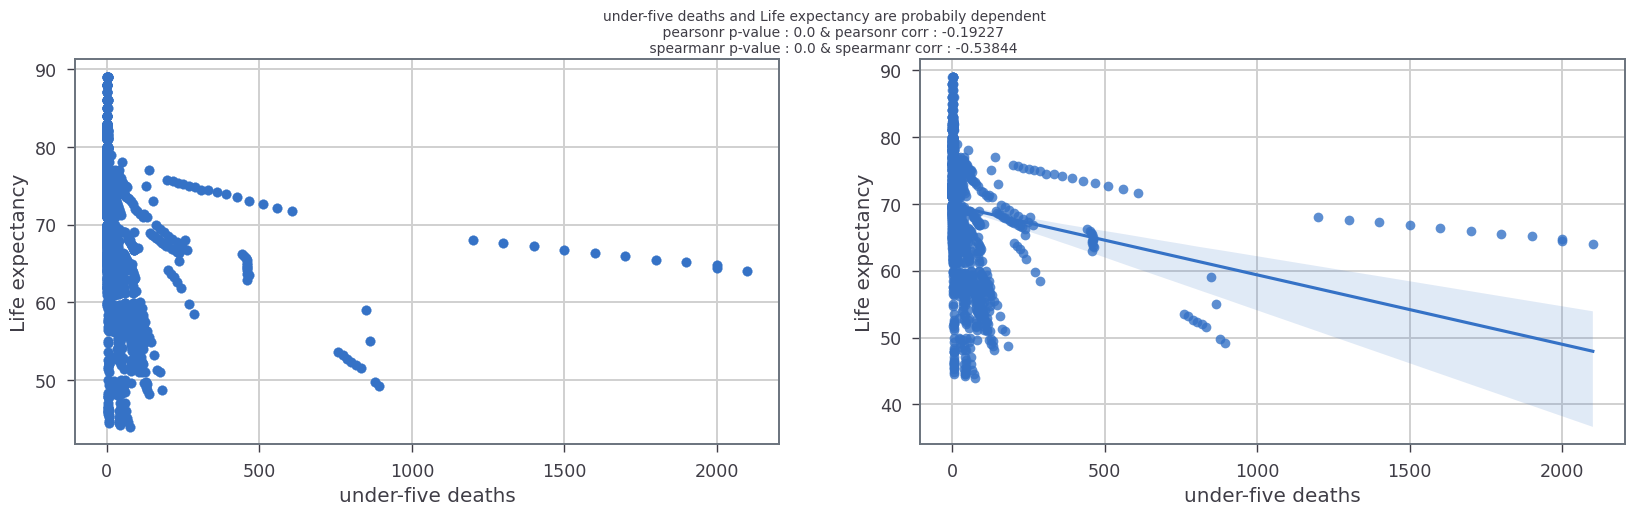

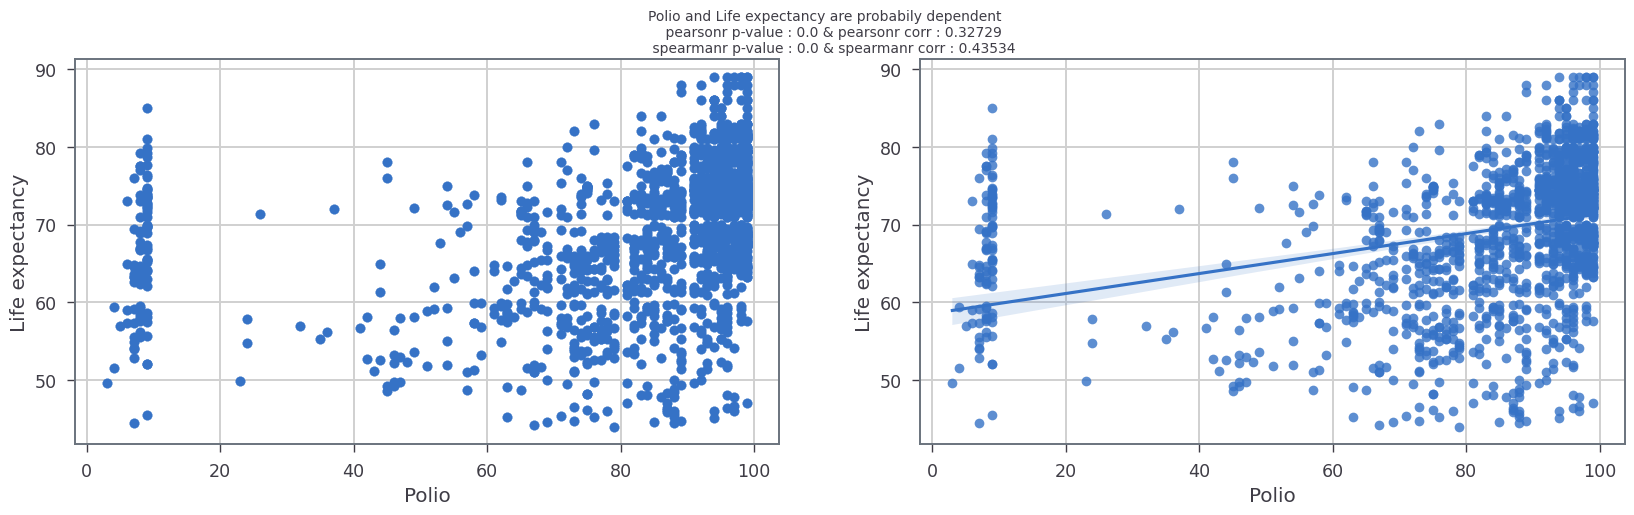

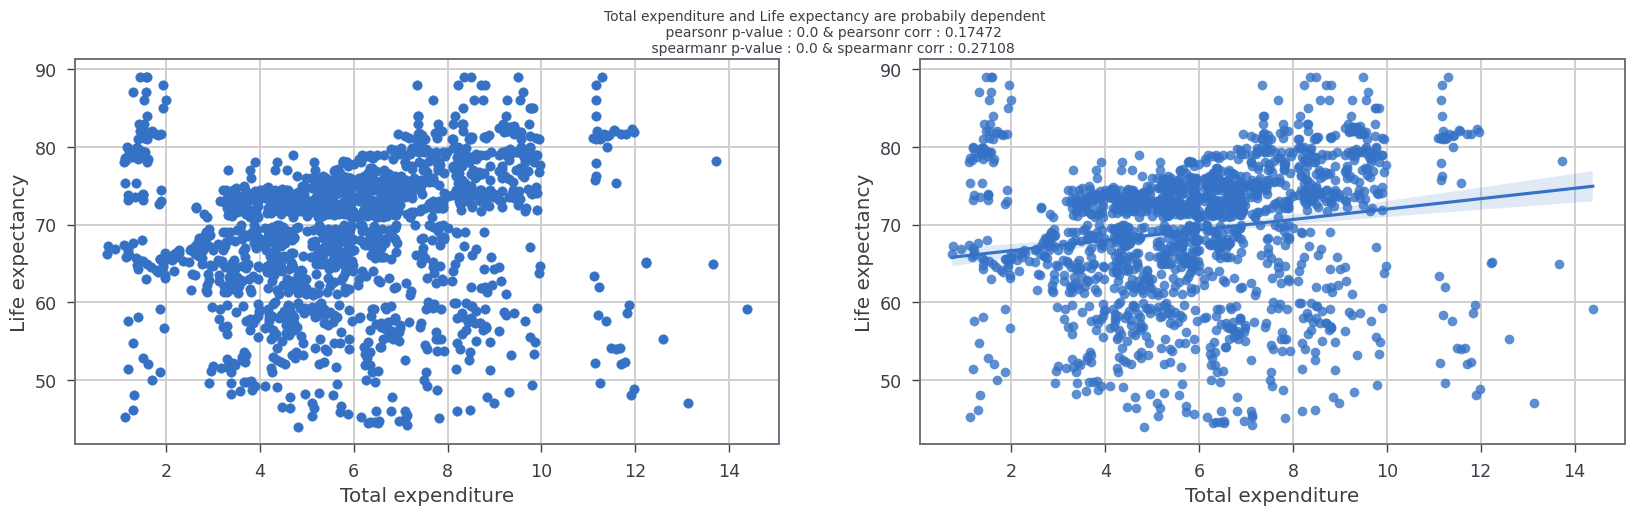

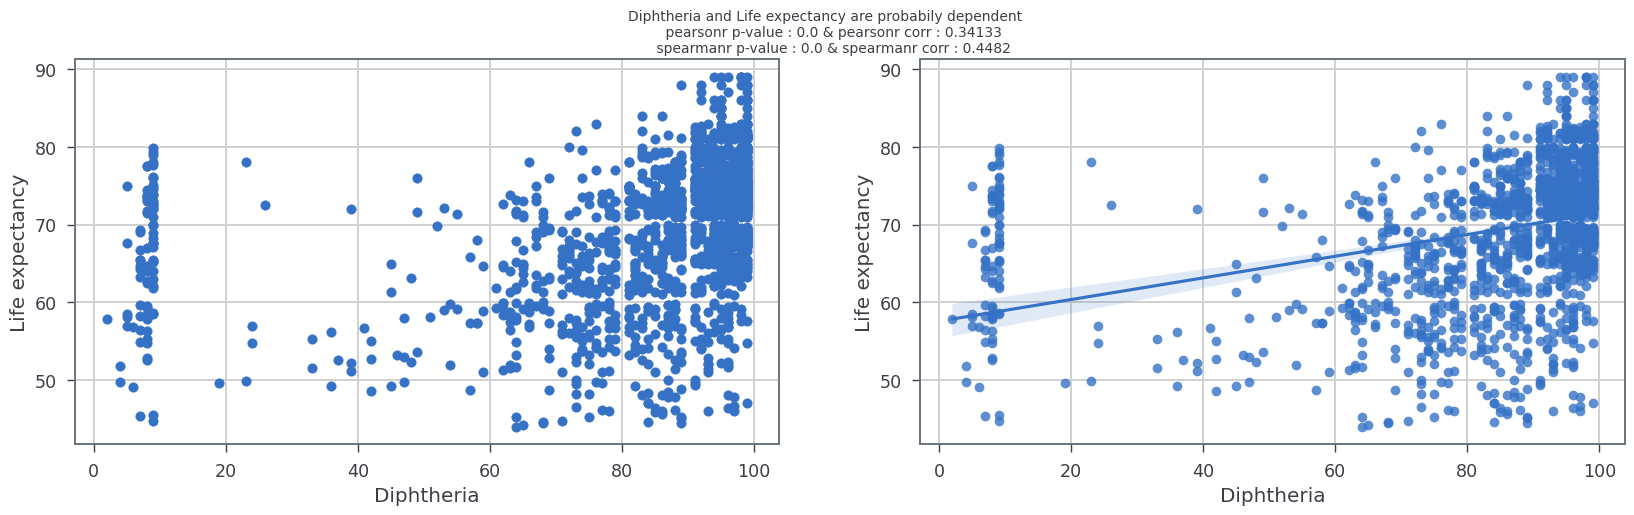

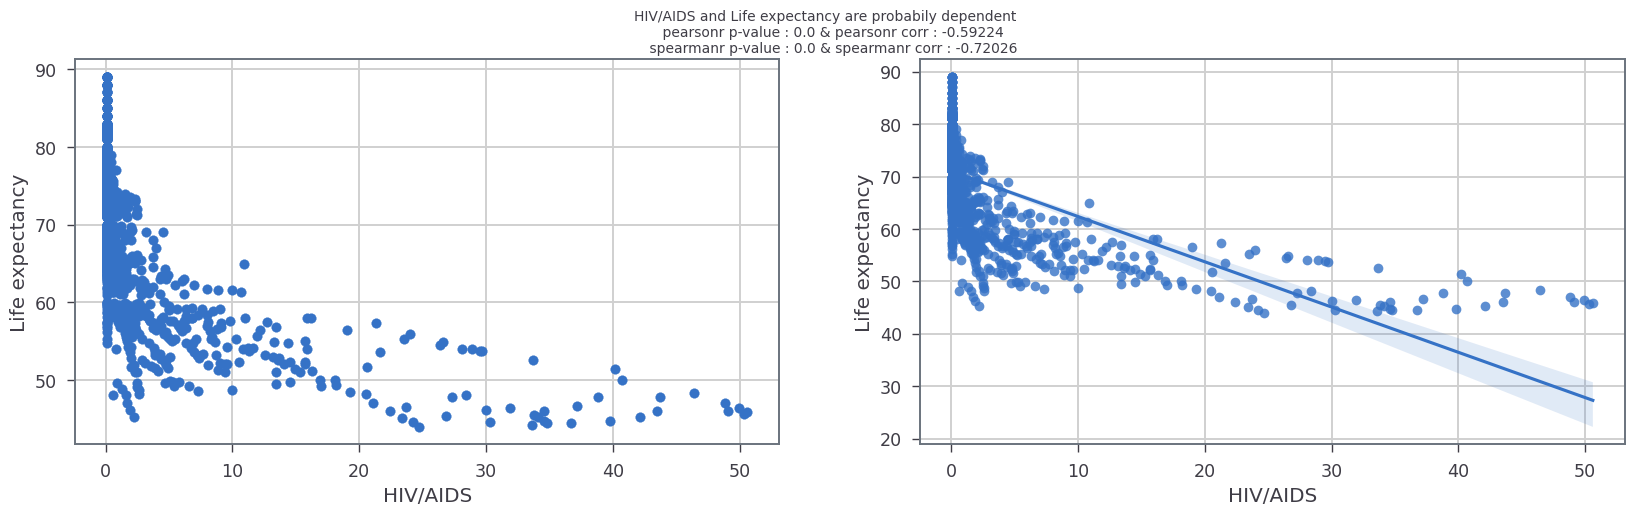

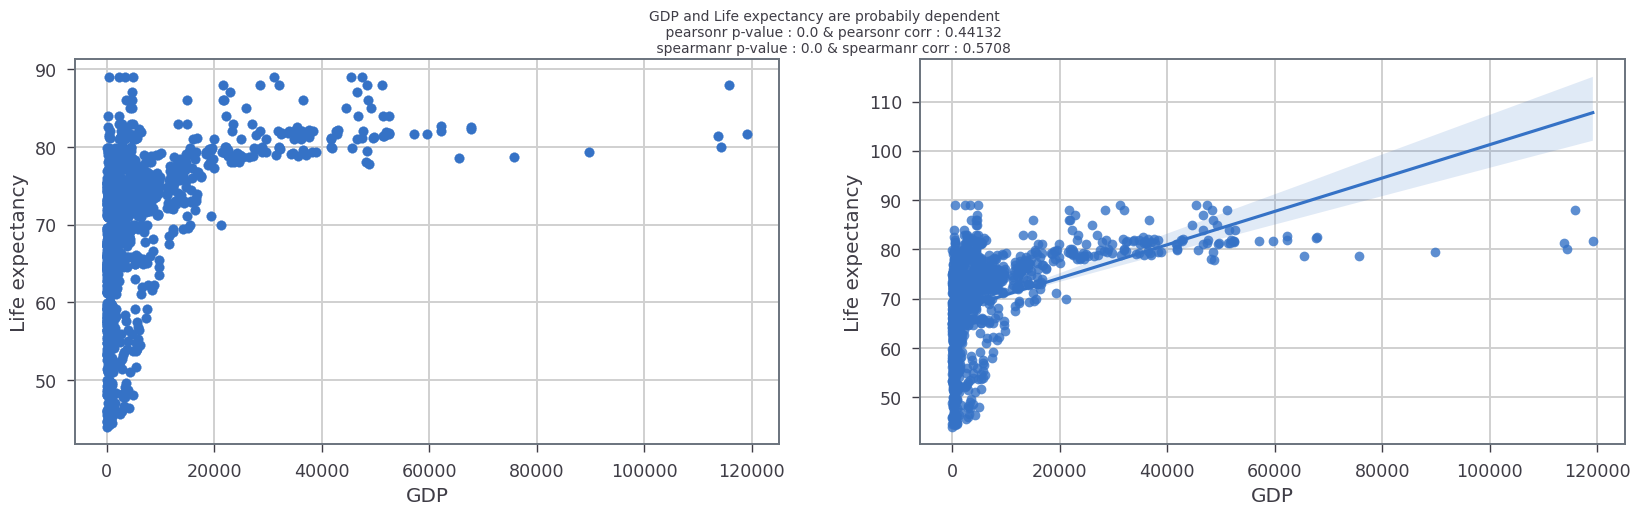

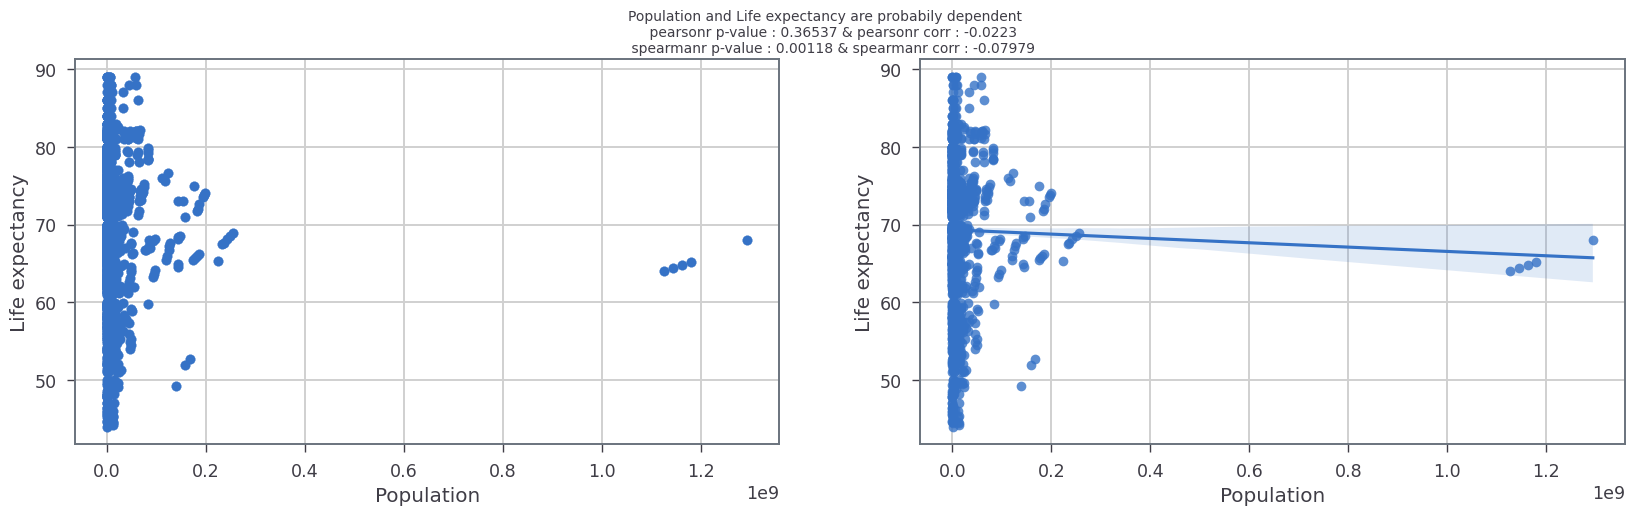

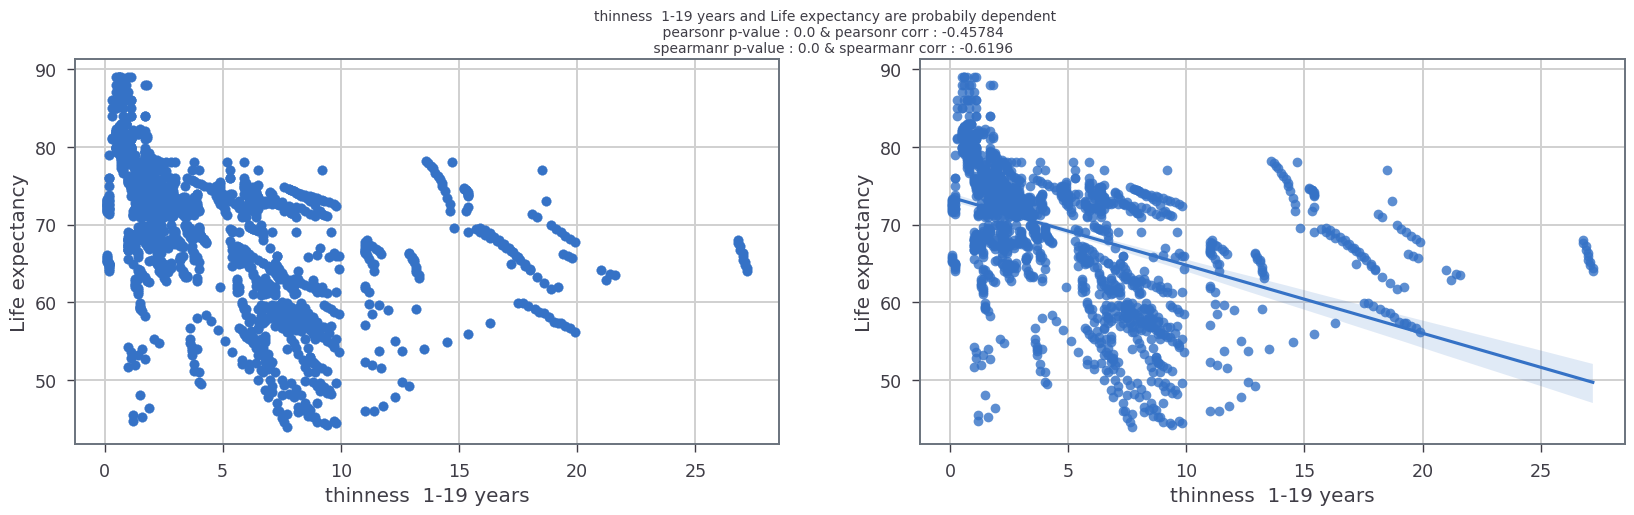

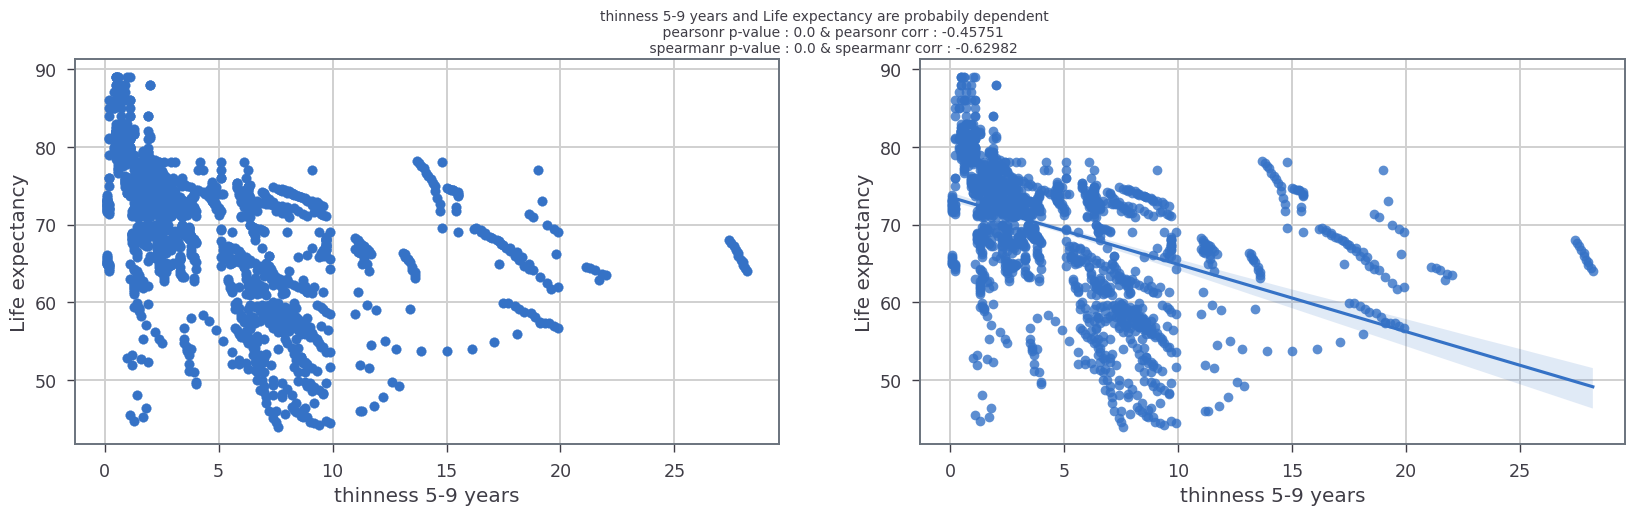

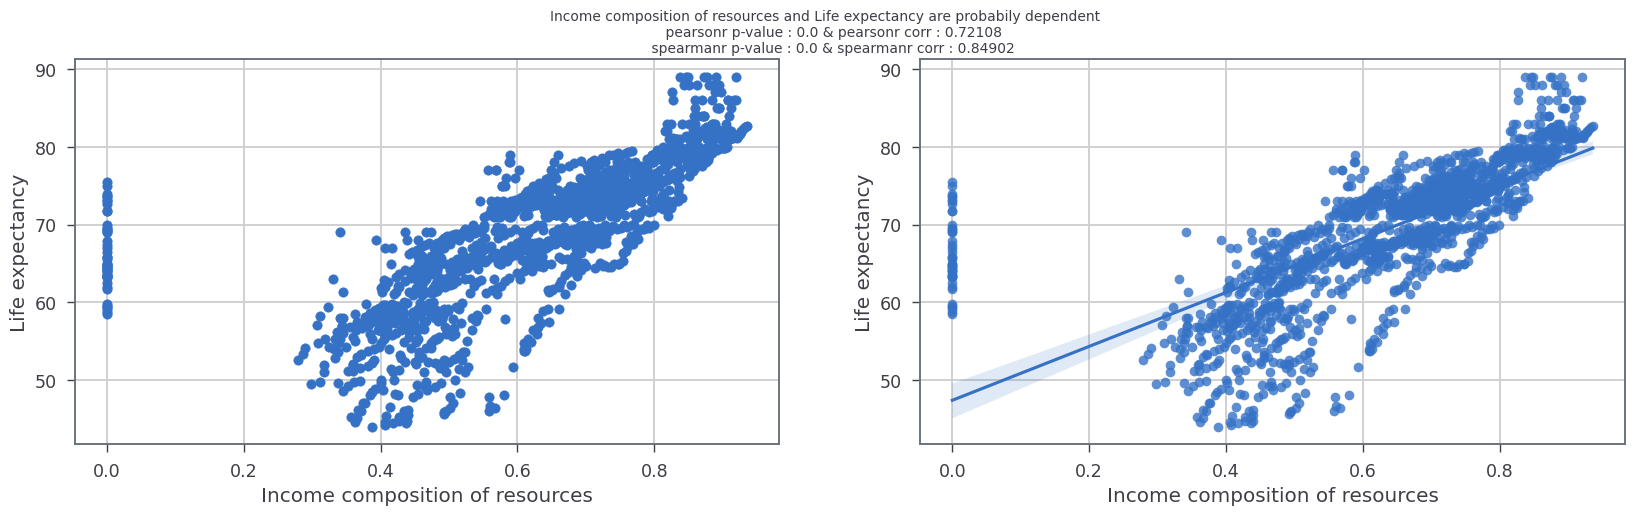

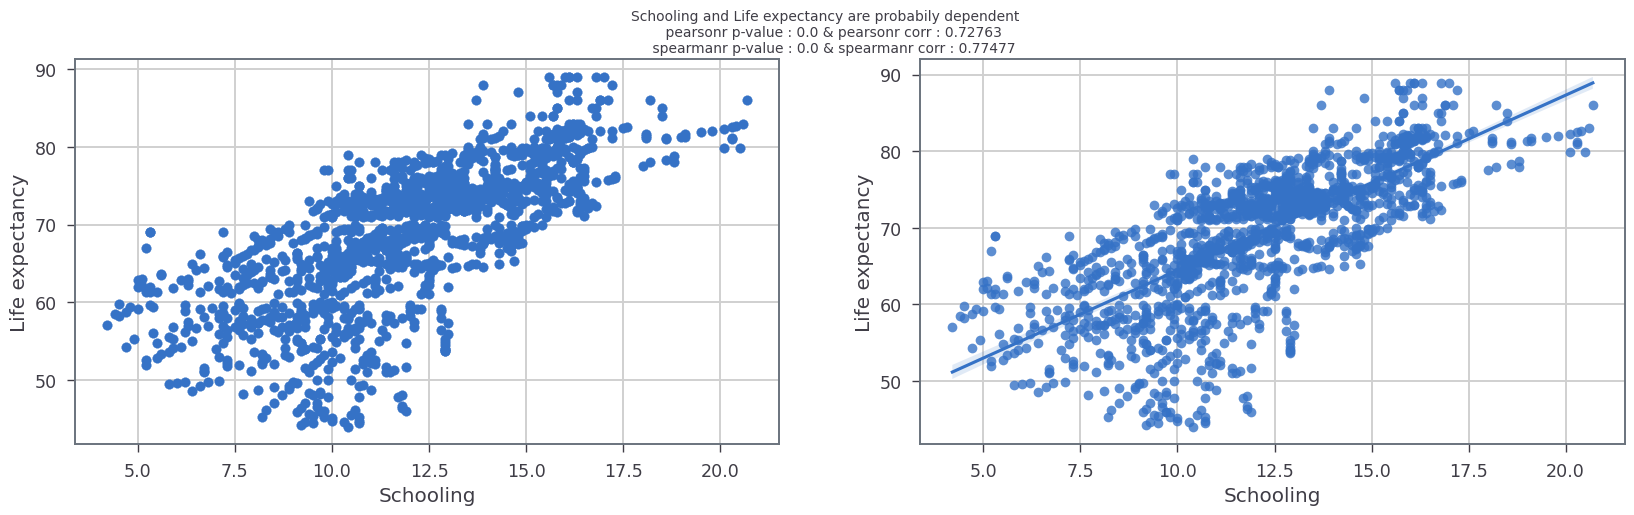

In [161]:
for feature in numericalFeatures:
  if feature != 'Life expectancy':
    pearsonrTestPlot(feature,'Life expectancy',data)

#### Observation

In [162]:
def getLifeExpectancyCountryPerYear(asc=True):
  Years_list = sorted(data['Year'].unique())
  # This part is to find the highest or lowest life expectany country of each year

  listOfLifeExpectancyValues = list()

  for year in Years_list:
    value = data.query(f"Year == {year}") \
    .groupby(['Country','Year']).agg({'Life expectancy':'min'}) \
    .reset_index() \
    .sort_values(by='Life expectancy',ascending=asc) \
    .iloc[0]

    listOfLifeExpectancyValues.append(value)
    lifeExpectancyCountryPerYear = pd.concat(listOfLifeExpectancyValues,axis=1).T

    # This part will plot the graph that shows the life expectancy

  fig, ax = plt.subplots(figsize=(20, 8))
  if asc:
    fig.suptitle('Countries with least life expectancy ("Life Expectancy Over Years")' )
  else:
    fig.suptitle('Countries with highest life expectancy ("Life Expectancy Over Years")')

  # Plot the life expectancy over years
  ax.plot(lifeExpectancyCountryPerYear['Year'],
            lifeExpectancyCountryPerYear['Life expectancy'],
            marker='o',
            linestyle='-')

  for i, txt in enumerate(lifeExpectancyCountryPerYear['Country']):
        plt.annotate(txt,
        (lifeExpectancyCountryPerYear['Year'].iloc[i],
          lifeExpectancyCountryPerYear['Life expectancy'].iloc[i]),
                    textcoords="offset points", xytext=(0,10),
                    ha='center',rotation=15)  # Add text annotation

  ax.set_xlabel('Year')
  ax.set_ylabel('Life Expectancy')
  ax.grid(True)

  plt.show()

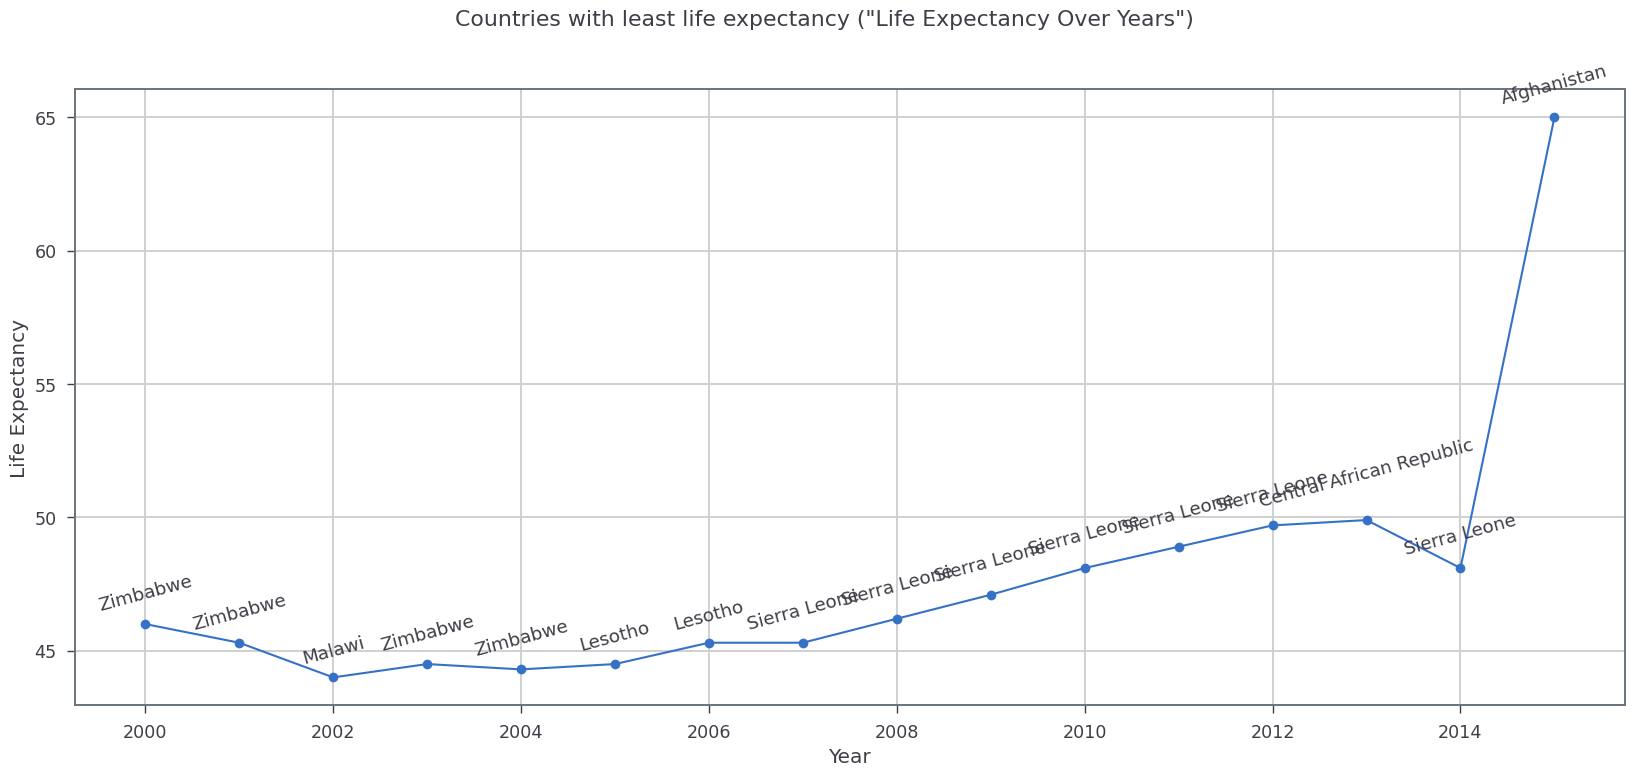

In [163]:
getLifeExpectancyCountryPerYear(True)

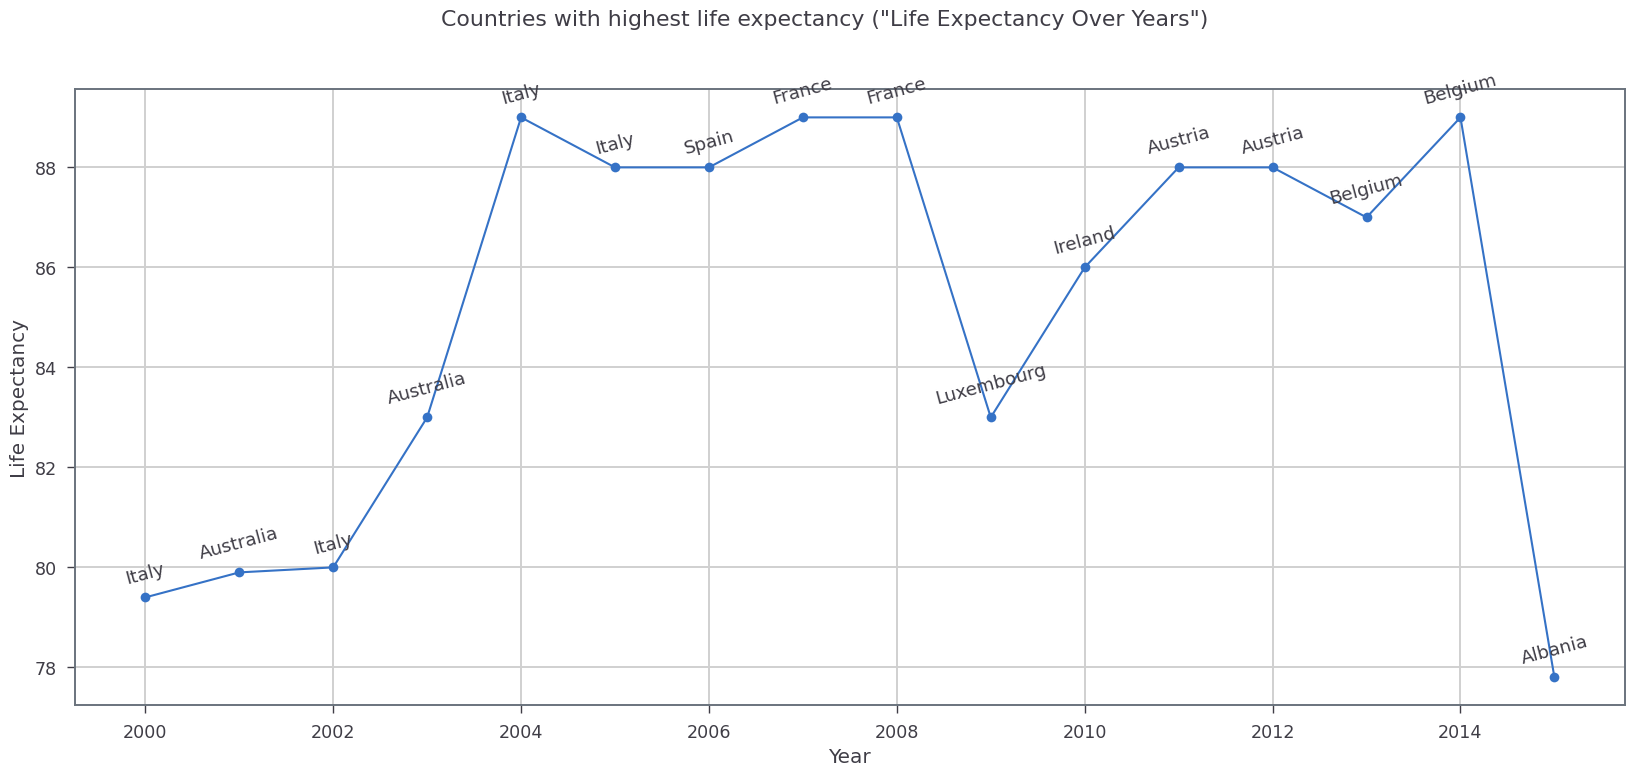

In [164]:
getLifeExpectancyCountryPerYear(False)

### Hypotheses for Anova

**Null Hypothesis (H0):** The null hypothesis states that there is no association between the categorical variables being studied. In other words, it assumes that the variables are independent.

**Alternative Hypothesis (H1):** The alternative hypothesis contradicts the null hypothesis and suggests that there is a statistically significant association between the categorical variables. It implies that the variables are dependent on each other.

For example, if you are conducting a chi-square test to analyze the relationship between two categorical variables such as gender and voting preference (e.g., Democrat, Republican, Independent), the null and alternative hypotheses would be:



In [172]:
def anova(feature):
  # Assuming 'categorical_feature' is your categorical feature and 'life_expectancy' is your target column
  groups = [data[data[feature] == group]['Life expectancy'] for group in data[feature].unique()]
  f_statistic, p_value = f_oneway(*groups)
  if p_value < 0.05:
      print(f"The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : {p_value}")
  else:
      print(f"The categorical feature is not significant in predicting life expectancy (p-value >= 0.05),P-value : {p_value}")

In [ ]:
# def chi2_contingency_test(feature1):
#   # Assuming 'categorical_feature' is your categorical feature and 'life_expectancy' is your target column
#   crosstab = pd.crosstab(data[feature1], data['Life expectancy'])
#   chi2, p, dof, expected = chi2_contingency(crosstab)
#   if p < 0.05:
#       print(f"The categorical {feature} is significant in predicting life expectancy (p-value < 0.05)")
#   else:
#       print(f"The categorical {feature} is not significant in predicting life expectancy (p-value >= 0.05)")
#   num_obs = crosstab.sum().sum()
#   cramers_v = np.sqrt(chi2 / (num_obs * (min(crosstab.shape) - 1)))

#   print(f'cramers_v : {cramers_v}, P-value : {p}')


# Kruskal-Wallis Test

In [173]:
anova('Year')

The categorical feature is not significant in predicting life expectancy (p-value >= 0.05),P-value : 0.5527148285584812


In [174]:
anova('Country')

The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : 0.0


In [175]:
anova('Status')

The categorical feature is significant in predicting life expectancy (p-value < 0.05),P-value : 3.922853419427268e-80


#### Observation
 - Status shows prominant significance in predicting Life expectancy
 - Where as Country(High Cardinality) and Year shows less significance in predecting life expectancy.

### Multicolinearity

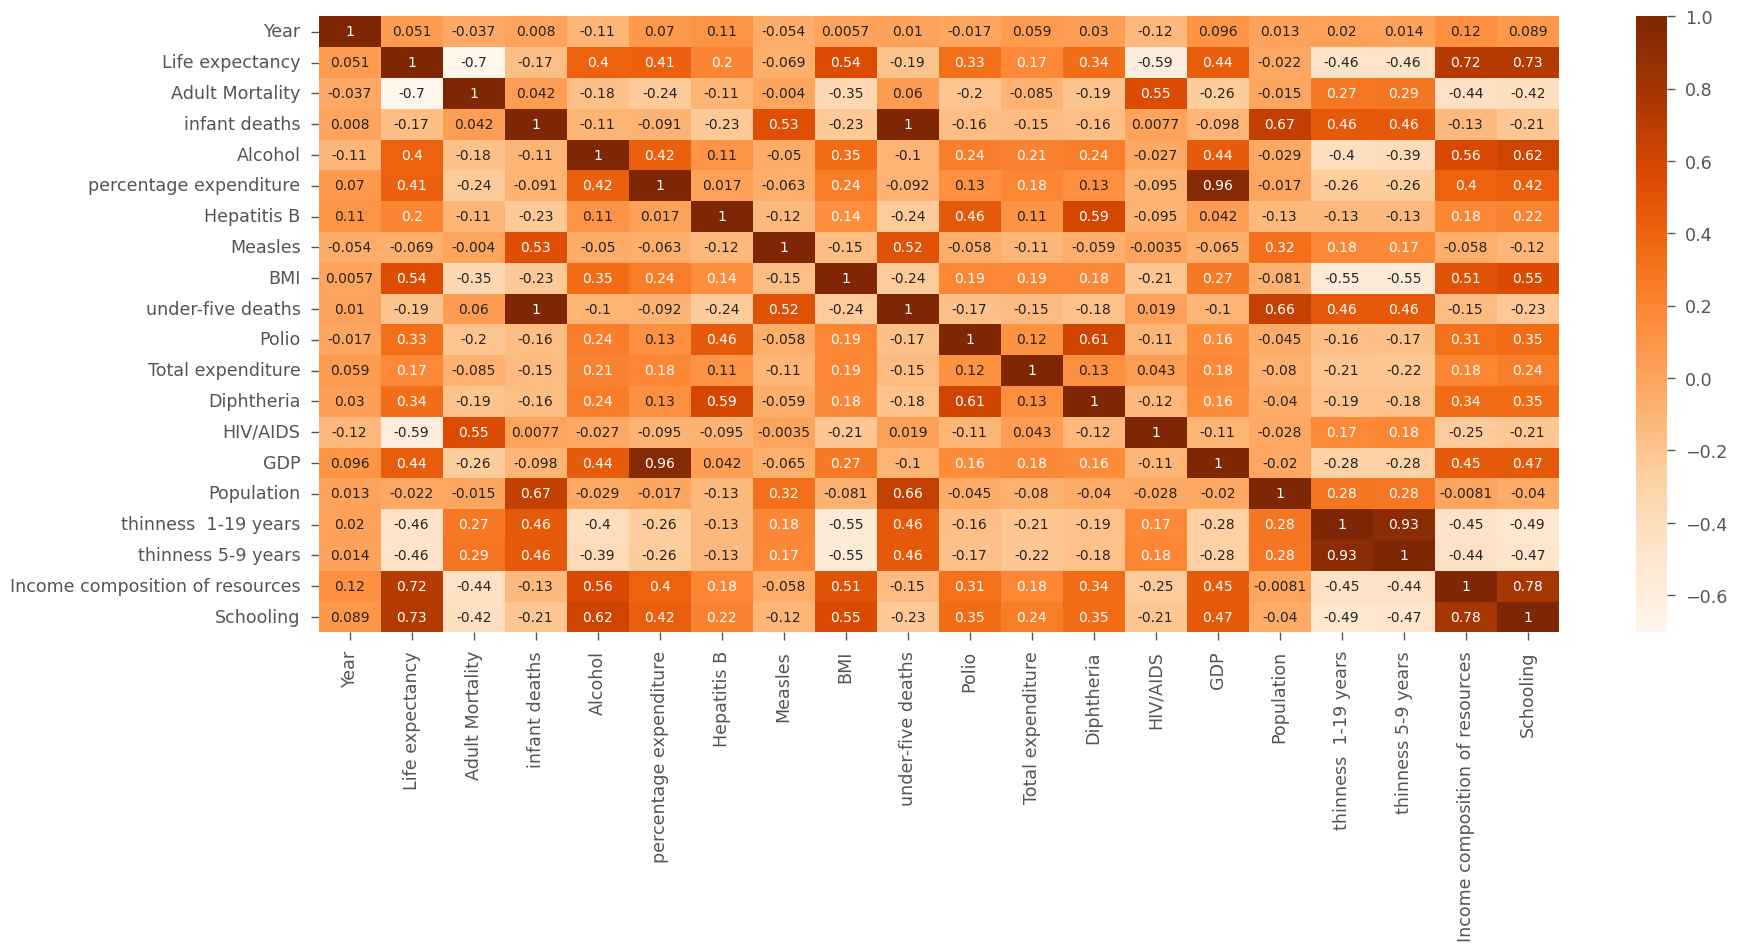

In [176]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(numeric_only=True,method='pearson'),annot=True,cmap='Oranges')
plt.show()

https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

https://www.datasklr.com/ols-least-squares-regression/multicollinearity

In [178]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Pearsonr_corr"] = [np.round(pearsonr(X[column],data.dropna().sample(X.shape[0])[numericalFeatures[0]])[0],4) for column in X.columns]
    vif["Spearman_corr"] = [np.round(spearmanr(X[column],data.dropna().sample(X.shape[0])[numericalFeatures[0]])[0],4) for column in X.columns]
    return vif

In [179]:
vif_data = calc_vif(data[numericalFeatures[1:]])

In [180]:
vif_data \
.style \
.background_gradient(cmap='Oranges', axis=0)

In [181]:
vif_data.loc[vif_data['VIF'] < 5] \
.style \
.background_gradient(cmap='Oranges', axis=0)

In [182]:
vif_data.loc[vif_data['VIF'] > 5] \
.style \
.background_gradient(cmap='Oranges', axis=0)

In [ ]:
features_to_drop = ['Income composition of resources','infant deaths','under-five deaths','thinness  1-19 years','thinness 5-9 years','Year','Country','percentage expenditure']

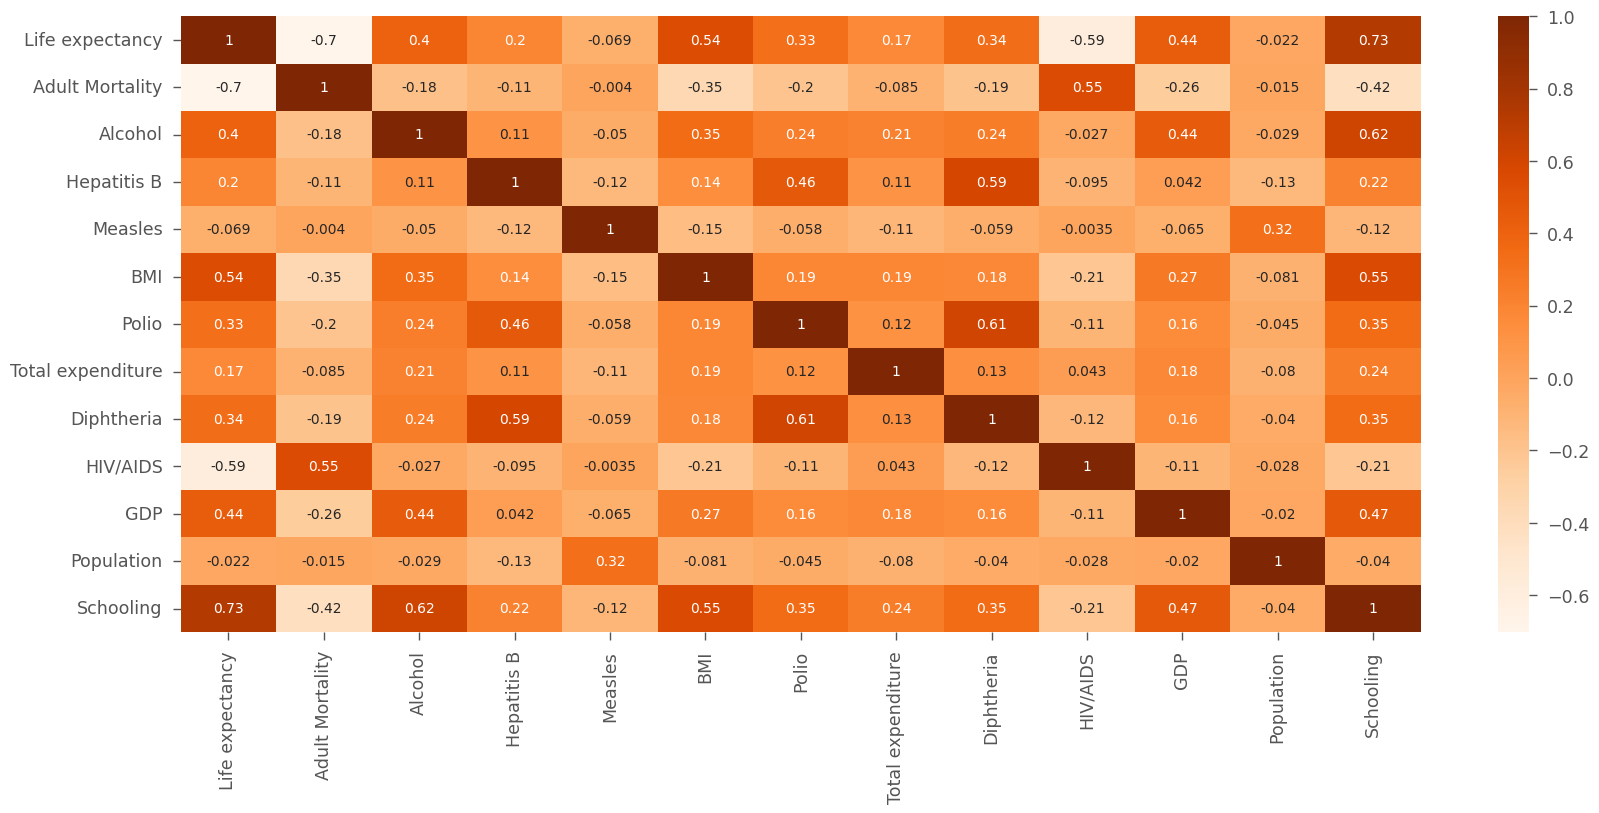

In [193]:
non_multicorrelation_data = data.drop(columns=features_to_drop,axis=1).select_dtypes(exclude='object')

plt.figure(figsize=(20,8))
sns.heatmap(non_multicorrelation_data.corr(method='pearson'),annot=True,cmap='Oranges')
plt.show()

non_multicorrelation_data = list(non_multicorrelation_data.columns)

In [184]:
vif_data = calc_vif(data[non_multicorrelation_data].dropna().drop('Life expectancy',axis=1))

In [185]:
vif_data.loc[vif_data['VIF'] < 5] \
.style \
.background_gradient(cmap='Oranges', axis=0)

In [207]:
new_data = data.drop(features_to_drop,axis=1)

In [ ]:
# numeric_features = data.select_dtypes(exclude=['object']).columns

# fig,ax = plt.subplots(5,4,figsize=(20,25))

# for col,ax in zip(numeric_features,ax.flatten()):
#   sns.histplot(data[col], bins=30, kde=True, ax=ax, edgecolor='black', linewidth=1)

#     # Title for each subplot
#   ax.set_title(col, fontsize=14, fontweight='bold')

#     # Set axis labels
#   ax.set_xlabel('')
#   ax.set_ylabel('')

#     # Add vertical line at mean if desired
#   mean_value = data[col].mean()
#   ax.axvline(mean_value, linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
#   ax.legend()


